# Data Gathering

In [3007]:
# # memory check
# import sys
# def sizeof_fmt(num, suffix='B'):
#     ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
#     for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
#         if abs(num) < 1024.0:
#             return "%3.1f %s%s" % (num, unit, suffix)
#         num /= 1024.0
#     return "%.1f %s%s" % (num, 'Yi', suffix)

# for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
#                          key= lambda x: -x[1])[:100]:
#     print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

In [ ]:
# !pip install -U sentence-transformers

In [450]:
import steamreviews

# Basic libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sd
import numpy as np

# For text cleaning 
import nltk
from nltk import pos_tag, clean_html, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import json
import pandas as pd

In [3241]:
import plotly as py
import cufflinks as cf 
import plotly.express as px
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [1128]:
import string

In [2821]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import flair

In [333]:
from textstat import flesch_reading_ease

In [703]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [836]:
from sklearn.decomposition import LatentDirichletAllocation

In [2500]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [955]:
import gensim

In [1187]:
import numpy as np

In [1864]:
from fuzzysearch import find_near_matches

In [2016]:
from scipy.cluster.hierarchy import dendrogram

In [2046]:
from summarizer import Summarizer

In [2069]:
import matplotlib.pyplot as plt

In [2139]:
# import pytextrank
from summa.summarizer import summarize

In [3242]:
import plotly.express as px

In [3243]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2301]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import hdbscan

In [3088]:
from pyclustering.cluster import cluster_visualizer, cluster_visualizer_multidim
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

In [1989]:
# imports for sentence clustering
from sentence_transformers import SentenceTransformer, util
import os
import csv
import time

In [ ]:
# x-means clustering 
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES

In [ ]:
from bs4 import BeautifulSoup
import re

In [112]:
# from contractions import contractions
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [5]:
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [704]:
# load a list of selected games
games_list_filename = 'games_list.csv'  
games = pd.read_csv(games_list_filename, delimiter=';')

In [707]:
games.sort_values(['Quantity'])

Steam ID                                   Name  Quantity  \
0     428550  Momodora: Reverie Under The Moonlight      3812   
10    210970                            The Witness      7121   
1     736260                            Baba Is You      7645   
11    501300            What Remains of Edith Finch      8553   
2     504230                                Celeste     17396   
13    601150                        Devil May Cry 5     18108   
9     403640                           Dishonored 2     19033   
12    812140              Assassin's Creed® Odyssey     34527   
3     287700   METAL GEAR SOLID V: THE PHANTOM PAIN     38293   
4     367520                          Hollow Knight     62368   
5    1145360                                  Hades     79534   
6     275850                           No Man's Sky    123345   
7     292030              The Witcher® 3: Wild Hunt    161014   
8    1091500                         Cyberpunk 2077    176952   

                 All Reviews           Recent Reviews  \
0              Very Positive            Very Positive   
10             Very Positive            Very Positive   
1    Overwhelmingly Positive  Overwhelmingly Positive   
11   Overwhelmingly Positive  Overwhelmingly Positive   
2    Overwhelmingly Positive  Overwhelmingly Positive   
13             Very Positive  Overwhelmingly Positive   
9              Very Positive            Very Positive   
12             Very Positive            Very Positive   
3              Very Positive            Very Positive   
4    Overwhelmingly Positive  Overwhelmingly Positive   
5   Overwhelmingly Positive   Overwhelmingly Positive   
6                      Mixed            Very Positive   
7    Overwhelmingly Positive  Overwhelmingly Positive   
8            Mostly Positive                    Mixed   

                                                Genre  
0   Metroidvania, Side Scroller, Exploration, Spec...  
10  Puzzle, Exploration, First-Person, Open World,...  
1   Puzzle, Indie, Difficult, Singleplayer, Pixel ...  
11  Story Rich, Atmospheric, Walking Simulator, Fi...  
2   Precision Platformer, Pixel Graphics, Difficul...  
13  Action, Hack and Slash, Great Soundtrack, Char...  
9   Stealth, First-Person, Action, Assassin, Singl...  
12    Open World, RPG, Assassin, Singleplayer, Action  
3   Stealth, Open World, Action, Story Rich, Tactical  
4   Metroidvania, Souls-like, Platformer, Great So...  
5     Action Roguelike, Indie, Action, Roguelite, RPG  
6   Open World, Open World Survival Craft, Space, ...  
7    Open World, RPG, Story Rich, Atmospheric, Mature  
8      Cyberpunk, Open World, RPG, Sci-fi, Futuristic

In [2624]:
# update the stopwords list with name of the game
game_names = games['Name']

In [2647]:
def get_extra_stopwords(game_name): 
    stopwords = set(['game'])
    doc = nlp(game_name.lower(), disable=['parser', 'ner'])
    for token in doc: 
        if token.pos_ not in {'PUNCT', 'NUM'}:
            stopwords.add(token.text)
    return stopwords

In [2648]:
for game_name in game_names:
    print(get_extra_stopwords(game_name))

{'momodora', 'the', 'under', 'moonlight', 'reverie', 'game'}
{'you', 'is', 'baba', 'game'}
{'game', 'celeste'}
{'pain', 'metal', 'the', 'gear', 'v', 'phantom', 'solid', 'game'}
{'hollow', 'game', 'knight'}
{'game', 'hades'}
{'sky', 'man', "'s", 'game', 'no'}
{'witcher', '®', 'wild', 'hunt', 'the', 'game'}
{'cyberpunk', 'game'}
{'dishonored', 'game'}
{'the', 'game', 'witness'}
{'edith', 'remains', 'what', 'of', 'game', 'finch'}
{'®', 'odyssey', "'s", 'creed', 'assassin', 'game'}
{'may', 'cry', 'game', 'devil'}


In [2618]:
#

Steam ID                                   Name  Quantity  \
0     428550  Momodora: Reverie Under The Moonlight      3812   
1     736260                            Baba Is You      7645   
2     504230                                Celeste     17396   
3     287700   METAL GEAR SOLID V: THE PHANTOM PAIN     38293   
4     367520                          Hollow Knight     62368   
5    1145360                                  Hades     79534   
6     275850                           No Man's Sky    123345   
7     292030              The Witcher® 3: Wild Hunt    161014   
8    1091500                         Cyberpunk 2077    176952   
9     403640                           Dishonored 2     19033   
10    210970                            The Witness      7121   
11    501300            What Remains of Edith Finch      8553   
12    812140              Assassin's Creed® Odyssey     34527   
13    601150                        Devil May Cry 5     18108   

                 All Reviews           Recent Reviews  \
0              Very Positive            Very Positive   
1    Overwhelmingly Positive  Overwhelmingly Positive   
2    Overwhelmingly Positive  Overwhelmingly Positive   
3              Very Positive            Very Positive   
4    Overwhelmingly Positive  Overwhelmingly Positive   
5   Overwhelmingly Positive   Overwhelmingly Positive   
6                      Mixed            Very Positive   
7    Overwhelmingly Positive  Overwhelmingly Positive   
8            Mostly Positive                    Mixed   
9              Very Positive            Very Positive   
10             Very Positive            Very Positive   
11   Overwhelmingly Positive  Overwhelmingly Positive   
12             Very Positive            Very Positive   
13             Very Positive  Overwhelmingly Positive   

                                                Genre  
0   Metroidvania, Side Scroller, Exploration, Spec...  
1   Puzzle, Indie, Difficult, Singleplayer, Pixel ...  
2   Precision Platformer, Pixel Graphics, Difficul...  
3   Stealth, Open World, Action, Story Rich, Tactical  
4   Metroidvania, Souls-like, Platformer, Great So...  
5     Action Roguelike, Indie, Action, Roguelite, RPG  
6   Open World, Open World Survival Craft, Space, ...  
7    Open World, RPG, Story Rich, Atmospheric, Mature  
8      Cyberpunk, Open World, RPG, Sci-fi, Futuristic  
9   Stealth, First-Person, Action, Assassin, Singl...  
10  Puzzle, Exploration, First-Person, Open World,...  
11  Story Rich, Atmospheric, Walking Simulator, Fi...  
12    Open World, RPG, Assassin, Singleplayer, Action  
13  Action, Hack and Slash, Great Soundtrack, Char...

In [712]:
app_ids = [428550]

# set request parameters 
request_params = {}
request_params['language'] = 'english'

for app_id in app_ids: 
    review_dict, query_count = steamreviews.download_reviews_for_app_id(app_id, chosen_request_params=request_params)
    # review_dict = steamreviews.load_review_dict(app_id)

[appID = 428550] expected #reviews = 3813


In [713]:
review_dict['query_summary']

{'num_reviews': 100,
 'review_score': 8,
 'review_score_desc': 'Very Positive',
 'total_positive': 3545,
 'total_negative': 268,
 'total_reviews': 3813}

In [714]:
query_count

1

Example of a review scraped in json format.

In [234]:
steamreviews.load_review_dict(app_id)

{'reviews': {'93336107': {'recommendationid': '93336107',
   'author': {'steamid': '76561197998824356',
    'num_games_owned': 149,
    'num_reviews': 95,
    'playtime_forever': 402,
    'playtime_last_two_weeks': 402,
    'playtime_at_review': 402,
    'last_played': 1623037817},
   'language': 'english',
   'review': 'Metroidvania with some influences from Dark Souls. I enjoyed it. I had to check some guide to see the true ending.',
   'timestamp_created': 1623040717,
   'timestamp_updated': 1623040849,
   'voted_up': True,
   'votes_up': 0,
   'votes_funny': 0,
   'weighted_vote_score': 0,
   'comment_count': 0,
   'steam_purchase': True,
   'received_for_free': False,
   'written_during_early_access': False},
  '93281322': {'recommendationid': '93281322',
   'author': {'steamid': '76561198113242036',
    'num_games_owned': 83,
    'num_reviews': 12,
    'playtime_forever': 97,
    'playtime_last_two_weeks': 0,
    'playtime_at_review': 97,
    'last_played': 1621147815},
   'langu

In [252]:
data = steamreviews.load_review_dict(app_id)
data = data['reviews']
review_dataset = []

for id_num, info in data.items():
    review = {'id_num': id_num,
              'review':info['review'],
              'voted_up':info['voted_up']}
    
    review_dataset.append(review)

In [2470]:
df = pd.DataFrame(review_dataset)

In [254]:
df.sample(10)

id_num                                             review  voted_up
1946  36004056  Great game, although it is rather short. I cam...      True
2395  30894495  This fantasy game is awesome. And for those wh...      True
237   77258601  Cute. Nice music. Great pixel art. New Game +....      True
232   77571255  A nice cutesy platform adventure. Sleek contro...      True
490   68101095  Great game and kinda hard metroidvania, at lea...      True
1065  48288624  Momodora: Reverie Under the Moonlight has an a...      True
3516  22732827  Level 1: A nice breezy forest with cute little...      True
583   62688720  It was great. Play it. Very responsive control...      True
3271  24030419  I'm only writing this review because this game...     False
1540  42316888  It's cool. I enjoyed trying to perfect kill ev...      True

In [231]:
# languages
# df_lan = df['language']
# df_lan_value_counts = df_lan.value_counts()
# df_lan_value_counts.iplot(kind='bar', 
#                           xTitle='Language', 
#                           yTitle='Number of Reviews', 
#                           title='Languages in Steam Reviews')

- English is the prominent language as expected, accounts for nearly 50% of the reviews. In our study, we will only work with English reviews as they offer a reasonable amount of positive and negative reviews for our analysis.

# Basic Text Data Preprocessing

In [255]:
# keep only the english reviews 
df = df.drop(['id_num'], axis=1)
# change 'voted_up' to 'recommended'
df = df.rename(columns={"voted_up": "recommended"})

In [257]:
# check for null values 
df.isnull().sum()

review         0
recommended    0
dtype: int64

In [258]:
# reset index
df = df.reset_index(drop=True)

# Basic Data Analysis

We look at the number of reviews that have recommended the game or not. 

In [259]:
px.histogram(df, x='recommended', color='recommended').update_yaxes(title='Number of Reviews')

We see that the number of users who have recommended the game overshadows those who don’t recommend it. Now keep this one in mind, the amount of reviews recommending the game does indicate something about the game itself and how we’re going to see the reasons behind the recommendation.

### Text Cleaning

Some important cleaning to do with the reviews:
- Uncontract any words to their full form: This usually makes it easier to clean text data and is an optional step. Examples are words like ain’t or we’ll, which is converted into ‘is not’ or ‘we will’.
- Remove any stopwords: These are words that do not provide any sort of information to what we’re trying to find or just appear way too frequently. Articles and prepositions are examples of stopwords.
- Punctuations, emojis and emoticons, numbers: They’re not words, so it’s best to remove them.
- Parts-of-speech: These are tags that indicate the position of the word in the sentence, whether they’re a noun, verb, preposition, etc.
- Lemmatization: It’s a technique or method where the words are converted back into their root or base form, such as converting the word ‘confusing’ to the base form ‘confused’. Makes it easier to understand the words for analysis. The POS tag is also used to lemmatize the words based on their position.

In [260]:
x = df['review'][:50]

In [261]:
# raw
' '.join(x)

'Metroidvania with some influences from Dark Souls. I enjoyed it. I had to check some guide to see the true ending. It\'s ok. Frustrating mechanics turned me off of the game. Definitely feels slow and clunky when fighting. Not a bad game just a m e h it\'s alright game. Ultimately there\'s better games to play. Cat Has problems but overall pretty good. I\'d suggest you don\'t play on easy even if you\'re REALLY bad like me as it\'s... Well, too easy This is a very good and very short game. If you have ever wanted a 2d platformer with some soulslike mechanics such as rolling, save points and refillable items, then there is a decent chance you will enjoy your time on it. It combines that with an interesting story with fun (and relatively easy) bosses all wrapped up in a metroidvania package. I did have some minor issues with the game such as the way spawn points were set and the warp mechanic. The warp system only takes you to a specific bell in an area and you have to work your way thro

In [262]:
print(' '.join(x))

Metroidvania with some influences from Dark Souls. I enjoyed it. I had to check some guide to see the true ending. It's ok. Frustrating mechanics turned me off of the game. Definitely feels slow and clunky when fighting. Not a bad game just a m e h it's alright game. Ultimately there's better games to play. Cat Has problems but overall pretty good. I'd suggest you don't play on easy even if you're REALLY bad like me as it's... Well, too easy This is a very good and very short game. If you have ever wanted a 2d platformer with some soulslike mechanics such as rolling, save points and refillable items, then there is a decent chance you will enjoy your time on it. It combines that with an interesting story with fun (and relatively easy) bosses all wrapped up in a metroidvania package. I did have some minor issues with the game such as the way spawn points were set and the warp mechanic. The warp system only takes you to a specific bell in an area and you have to work your way through enem

In [1340]:
# remove non english characters effectively
def remove_non_ascii(text): 
    return text.encode("ascii", errors="ignore").decode()

In [263]:
def lowercase(text):
    return text.lower()

In [409]:
# replace ’ with ' 
def normalize_single_quote(text):
    return re.sub('[’‘]', '\'', text)

In [265]:
# remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "lxml")
    text = soup.get_text()
    # remove square brackets and characters inside
    text = re.sub('\[(.*?)\]', ' ', text)
    return text

In [266]:
# remove url from text
def remove_url(text):
    return re.sub(r"http\S+", ' ', text)

In [267]:
# expand contractions
def expand_contractions(text):
    for key in contractions:
        value = contractions[key]
        text = text.replace(key, value)
    return text

In [445]:
# remove ANSI escape sequences
def remove_ansi_escape_sequences(text):
    ansi_escape = re.compile(r'(?:\x1B[@-_]|[\x80-\x9F])[0-?]*[ -/]*[@-~]')
    return ansi_escape.sub('', text)

In [269]:
# remove multiple whitespaces with single whitespace
def remove_multi_whitespaces(text): 
    return re.sub('\s+', ' ', text.strip())

In [3352]:
# remove stop words 
def remove_stopwords(text, word_list=[]):
    stop_words = stopwords.words("english")
    stop_words.extend(word_list)
    stop_words = set(stop_words)
    return ' '.join(e.lower() for e in text.split() if e.lower() not in stop_words)

In [3351]:
 stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [604]:
# remove digits 
def remove_digits(text): 
    return re.sub('\d+', ' ', text)

# remove symbols 
def remove_symbols(text):
    return re.sub('[^A-Za-z,.\s\d]+', ' ', text)

In [539]:
# remove everything except alphabet and digits
def remove_special_characters(text):
    return re.sub('[^A-Za-z0-9]+', ' ', text)

In [3348]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# lemmatization with spacy 
def lemmatize_text(text): 
    doc = nlp(text, disable=['parser','ner'])
    lemma = [token.lemma_ for token in doc if token.pos_ != 'PUNCT']
    return ' '.join(lemma)

In [3959]:
# remove leading symbols in a sentence
def remove_leading_symbols(sent):
    return re.sub('^[^A-Za-z\"\'\d]+', '', sent)

### Feature Engineering

In [426]:
df['polarity'] = df['review'].map(lambda x: TextBlob(x).sentiment.polarity)
df['polarity_2'] = df['review'].map(lambda x : SentimentIntensityAnalyzer().polarity_scores(x)['compound'])

In [421]:
df['length'] = df['review'].map(len)

In [422]:
df['word_count'] = df['review'].map(lambda x: len(x.split()))

In [278]:
def get_avg_word_len(review):
    words = review.split()
    review_len = len(words)
    
    if review_len == 0: 
        return 0

    return len(''.join(words))/len(words)

In [424]:
df['avg_word_len'] = df['review'].map(get_avg_word_len)

In [427]:
df

review  recommended  \
0     Metroidvania with some influences from Dark So...         True   
1     It's ok. Frustrating mechanics turned me off o...        False   
2                                                   Cat         True   
3     Has problems but overall pretty good. I'd sugg...         True   
4     This is a very good and very short game. If yo...         True   
...                                                 ...          ...   
3807    F*ck it! Time to die endlessly again and again.         True   
3808                                     So far so cute         True   
3809        Quite a masterpiece of an indie platformer.         True   
3810  A beautiful, smooth flowing platformer with a ...         True   
3811  Dark Souls + Castlevania SOTN + Kawaii = Momod...         True   

      polarity  length  word_count  avg_word_len  reading_ease  polarity_2  
0     0.233333     114          21      4.476190         89.75      0.7269  
1    -0.055000     193          35      4.542857         79.46      0.7543  
2     0.000000       3           1      3.000000        121.22      0.0000  
3     0.186111     132          25      4.320000         96.89      0.7622  
4     0.076916     971         182      4.340659         73.71      0.9701  
...        ...     ...         ...           ...           ...         ...  
3807 -0.125000      47           9      4.333333         96.18     -0.6360  
3808  0.300000      14           4      2.750000        118.18      0.6365  
3809  0.000000      43           7      5.285714         64.37      0.6573  
3810  0.675000      63          10      5.400000         69.79      0.6696  
3811  0.050000      67          12      4.666667         36.96      0.6588  

[3812 rows x 8 columns]

### Distrubution of Sentiment Polarity

In [408]:
df['polarity'].iplot(kind='hist', bins = 50, 
                     xTitle='Polarity', 
                     yTitle='Number of Reviews',
                    title='Sentiment Polarity Distribution (TextBlob)')

In [382]:
df['polarity_2'].iplot(kind='hist', bins = 50, 
                     xTitle='Polarity', 
                     yTitle='Number of Reviews',
                    title='Sentiment Polarity Distribution (Vader)')

### Distribution of Review Text Length and Word Length

In [383]:
df['length'].iplot(kind='hist', bins=50,
                  xTitle='Review Length',
                  yTitle='Number of Reviews', 
                  title='Review Length Distribution')

In [285]:
df['word_count'].iplot(kind='hist', bins=50,
                  xTitle='Word Count',
                  yTitle='Number of Reviews', 
                  title='Word Count Distribution')

In [384]:
# reviews with average word length more than 10 is likely to be in other languages like chinese or thai, mostly funny or meaningless 
df['avg_word_len'].iplot(kind='hist', bins=50,
                  xTitle='Average Word Length',
                  yTitle='Number of Reviews', 
                  title='Average Word Length Distribution')

df['avg_word_len'][df['avg_word_len'] < 10].iplot(kind='hist', bins=50,
                  xTitle='Average Word Length',
                  yTitle='Number of Reviews', 
                  title='Average Word Length Distribution')

### Distribution of Unigram, Bigram and Trigram

In [386]:
x = 'this is a test example'

# unigram = this, is, a, test, example
# bigram = this is, is a, a test, test example
# trigram = this is a, is a test, a test example

#### Unigram

In [387]:
x = ['this is the list list this this this']

In [388]:
vec = CountVectorizer().fit(x)
bow = vec.transform(x)
sum_words = bow.sum(axis = 0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
words_freq[:2]

[('this', 4), ('list', 2)]

In [663]:
def get_n_gram(x, n_gram):
    vec = CountVectorizer(ngram_range=[n_gram, n_gram]).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq

In [664]:
get_n_gram(x, 1)

[('this', 4), ('list', 2), ('is', 1), ('the', 1)]

In [2700]:
words = get_n_gram(df['review'], 1)[:20]

In [2701]:
words

[('the', 15978),
 ('and', 9735),
 ('to', 7800),
 ('game', 6991),
 ('it', 6823),
 ('of', 6233),
 ('you', 6084),
 ('is', 6070),
 ('this', 4208),
 ('that', 3660),
 ('in', 3474),
 ('but', 3296),
 ('with', 2759),
 ('for', 2692),
 ('are', 2341),
 ('on', 1891),
 ('like', 1839),
 ('as', 1678),
 ('if', 1634),
 ('not', 1613)]

In [2702]:
df_1 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df_1 = df_1.set_index('Unigram')
df_1.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Count', title = 'Top 20 unigram words')

#### Bigram

In [2703]:
words = get_n_gram(df['review'], 2)[:20]

In [2704]:
words

[('the game', 2277),
 ('this game', 2036),
 ('of the', 1721),
 ('if you', 1133),
 ('game is', 996),
 ('in the', 861),
 ('and the', 840),
 ('dark souls', 616),
 ('to the', 612),
 ('you can', 611),
 ('this is', 602),
 ('it is', 458),
 ('you re', 448),
 ('to be', 409),
 ('for the', 404),
 ('with the', 391),
 ('one of', 365),
 ('but it', 360),
 ('on the', 355),
 ('there are', 344)]

In [677]:
df_2 = pd.DataFrame(words, columns = ['Bigram', 'Frequency'])
df_2 = df_2.set_index('Bigram')
df_2.iplot(kind = 'bar', xTitle = 'Bigram', yTitle = 'Frequency', title = ' Top 20 Bigram words')

#### Trigram

In [678]:
words = get_n_gram(df['review'], 3)[:20]

In [679]:
words

[('this game is', 517),
 ('the game is', 399),
 ('of the game', 380),
 ('reverie under the', 236),
 ('under the moonlight', 236),
 ('if you re', 216),
 ('one of the', 216),
 ('momodora reverie under', 197),
 ('in the game', 181),
 ('if you like', 166),
 ('the moonlight is', 137),
 ('some of the', 124),
 ('recommend this game', 115),
 ('in this game', 113),
 ('the story is', 111),
 ('most of the', 111),
 ('you have to', 101),
 ('of the best', 99),
 ('the combat is', 94),
 ('the gameplay is', 93)]

In [680]:
df_3 = pd.DataFrame(words, columns = ['Trigram', 'Frequency'])
df_3 = df_3.set_index('Trigram')
df_3.sort_values(by='Frequency', axis=0, ascending=True).iplot(kind = 'bar', 
                                                              xTitle = 'Trigram', 
                                                              yTitle = 'Count', 
                                                              title = 'Top 20 Trigram words', 
                                                              orientation='h')

In [407]:
df

review  recommended  \
0     Metroidvania with some influences from Dark So...         True   
1     It's ok. Frustrating mechanics turned me off o...        False   
2                                                   Cat         True   
3     Has problems but overall pretty good. I'd sugg...         True   
4     This is a very good and very short game. If yo...         True   
...                                                 ...          ...   
3807    F*ck it! Time to die endlessly again and again.         True   
3808                                     So far so cute         True   
3809        Quite a masterpiece of an indie platformer.         True   
3810  A beautiful, smooth flowing platformer with a ...         True   
3811  Dark Souls + Castlevania SOTN + Kawaii = Momod...         True   

      polarity  length  word_count  avg_word_len  reading_ease  polarity_2  
0     0.233333     114          21      4.476190         89.75      0.7269  
1    -0.055000     193          35      4.542857         79.46      0.7543  
2     0.000000       3           1      3.000000        121.22      0.0000  
3     0.186111     132          25      4.320000         96.89      0.7622  
4     0.076916     971         182      4.340659         73.71      0.9701  
...        ...     ...         ...           ...           ...         ...  
3807 -0.125000      47           9      4.333333         96.18     -0.6360  
3808  0.300000      14           4      2.750000        118.18      0.6365  
3809  0.000000      43           7      5.285714         64.37      0.6573  
3810  0.675000      63          10      5.400000         69.79      0.6696  
3811  0.050000      67          12      4.666667         36.96      0.6588  

[3812 rows x 8 columns]

In [428]:
df

review  recommended  \
0     Metroidvania with some influences from Dark So...         True   
1     It's ok. Frustrating mechanics turned me off o...        False   
2                                                   Cat         True   
3     Has problems but overall pretty good. I'd sugg...         True   
4     This is a very good and very short game. If yo...         True   
...                                                 ...          ...   
3807    F*ck it! Time to die endlessly again and again.         True   
3808                                     So far so cute         True   
3809        Quite a masterpiece of an indie platformer.         True   
3810  A beautiful, smooth flowing platformer with a ...         True   
3811  Dark Souls + Castlevania SOTN + Kawaii = Momod...         True   

      polarity  length  word_count  avg_word_len  reading_ease  polarity_2  
0     0.233333     114          21      4.476190         89.75      0.7269  
1    -0.055000     193          35      4.542857         79.46      0.7543  
2     0.000000       3           1      3.000000        121.22      0.0000  
3     0.186111     132          25      4.320000         96.89      0.7622  
4     0.076916     971         182      4.340659         73.71      0.9701  
...        ...     ...         ...           ...           ...         ...  
3807 -0.125000      47           9      4.333333         96.18     -0.6360  
3808  0.300000      14           4      2.750000        118.18      0.6365  
3809  0.000000      43           7      5.285714         64.37      0.6573  
3810  0.675000      63          10      5.400000         69.79      0.6696  
3811  0.050000      67          12      4.666667         36.96      0.6588  

[3812 rows x 8 columns]

In [435]:
for review in df['review'].sample(n=20,random_state=69): 
    print(review)

Only mediocre at best, and it really fails to deliver on its promise.

Even on Hard (the only difficulty I've tried - if I'm right and the Insane difficulty means you always die in one hit then it's no better, as it's very easy to avoid getting hit by absolutely anything) it's much too easy and much too short, and the relative inexperience of those behind the game is easy to see, with many mechanics only serving to pointlessly prolong the game in a way that doesn't feel at all natural. The combo system is badly done - it features good animations but they greatly harm the fluidity of the character's movement potential, and the cheap Dark Souls-style roll only harms that further given that, much like in DaS, it's exceptionally overpowered. The world itself, if it can even be called a  world, is poor at best too: the area transitions are very badly done and give the feeling of a severely disjointed world, many places have cheap tricks that are easily figured out after just a single death 

In [3239]:
# for review in df['review'].sample(n=20,random_state=69)\
#                     .map(lowercase)\
#                     .map(remove_html_tags)\
#                     .map(remove_url)\
#                     .map(normalize_single_quote)\
#                     .map(expand_contractions)\
#                     .map(remove_ansi_escape_sequences)\
#                     .map(lemmatize_text)\
#                     .map(remove_special_characters)\
#                     .map(remove_digits): 
#     print('=> {}'.format(review))

In [681]:
df1 = df.copy()

In [828]:
df1['review'] = df['review'].map(lowercase)\
                    .map(remove_html_tags)\
                    .map(remove_url)\
                    .map(normalize_single_quote)\
                    .map(expand_contractions)\
                    .map(remove_ansi_escape_sequences)\
                    .map(lemmatize_text)\
                    .map(lambda x: remove_stopwords(x, ['game']))\
                    .map(remove_special_characters)\
                    .map(remove_digits)

D:\Anaconda3\envs\steam_insider\lib\site-packages\bs4\__init__.py:336: MarkupResemblesLocatorWarning:

"." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.

D:\Anaconda3\envs\steam_insider\lib\site-packages\bs4\__init__.py:424: MarkupResemblesLocatorWarning:

"https://store.steampowered.com/app/367520/hollow_knight/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

D:\Anaconda3\envs\steam_insider\lib\site-packages\bs4\__init__.py:336: MarkupResemblesLocatorWarning:

" ." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.



In [683]:
df1

review  recommended  \
0     metroidvania influence dark soul enjoy check g...         True   
1     ok frustrate mechanic turn definitely feels sl...        False   
2                                                   cat         True   
3     problem overall pretty good would suggest play...         True   
4     good short ever want platformer soulslike mech...         True   
...                                                 ...          ...   
3807                           f ck time die endlessly          True   
3808                                           far cute         True   
3809                quite masterpiece indie platformer          True   
3810    beautiful smooth flow platformer lot challenge          True   
3811  dark soul castlevania sotn kawaii momodora rut...         True   

      polarity  length  word_count  avg_word_len  reading_ease  polarity_2  
0     0.233333     114          21      4.476190         89.75      0.7269  
1    -0.055000     193          35      4.542857         79.46      0.7543  
2     0.000000       3           1      3.000000        121.22      0.0000  
3     0.186111     132          25      4.320000         96.89      0.7622  
4     0.076916     971         182      4.340659         73.71      0.9701  
...        ...     ...         ...           ...           ...         ...  
3807 -0.125000      47           9      4.333333         96.18     -0.6360  
3808  0.300000      14           4      2.750000        118.18      0.6365  
3809  0.000000      43           7      5.285714         64.37      0.6573  
3810  0.675000      63          10      5.400000         69.79      0.6696  
3811  0.050000      67          12      4.666667         36.96      0.6588  

[3812 rows x 8 columns]

In [684]:
df1['polarity'] = df1['review'].map(lambda x: TextBlob(x).sentiment.polarity)
df1['polarity_2'] = df1['review'].map(lambda x : SentimentIntensityAnalyzer().polarity_scores(x)['compound'])
df1['length'] = df1['review'].map(len)
df1['word_count'] = df1['review'].map(lambda x: len(x.split()))
df1['avg_word_len'] = df1['review'].map(get_avg_word_len)

In [685]:
df1

review  recommended  \
0     metroidvania influence dark soul enjoy check g...         True   
1     ok frustrate mechanic turn definitely feels sl...        False   
2                                                   cat         True   
3     problem overall pretty good would suggest play...         True   
4     good short ever want platformer soulslike mech...         True   
...                                                 ...          ...   
3807                           f ck time die endlessly          True   
3808                                           far cute         True   
3809                quite masterpiece indie platformer          True   
3810    beautiful smooth flow platformer lot challenge          True   
3811  dark soul castlevania sotn kawaii momodora rut...         True   

      polarity  length  word_count  avg_word_len  reading_ease  polarity_2  
0     0.200000      64          10      5.400000         89.75      0.7184  
1     0.040000     102          16      5.375000         79.46      0.2960  
2     0.000000       3           1      3.000000        121.22      0.0000  
3     0.186111      82          14      4.928571         96.89      0.8990  
4     0.149665     499          77      5.480519         73.71      0.9690  
...        ...     ...         ...           ...           ...         ...  
3807 -0.125000      24           5      3.800000         96.18     -0.5994  
3808  0.300000       8           2      3.500000        118.18      0.4588  
3809  0.000000      35           4      7.750000         64.37      0.6590  
3810  0.625000      47           6      6.833333         69.79      0.6369  
3811  0.325000      54           8      5.750000         36.96      0.6249  

[3812 rows x 8 columns]

In [686]:
df1['polarity'].iplot(kind='hist', bins = 50, 
                     xTitle='Polarity', 
                     yTitle='Number of Reviews',
                    title='Sentiment Polarity Distribution (TextBlob)')

In [687]:
df1['polarity_2'].iplot(kind='hist', bins = 50, 
                     xTitle='Polarity', 
                     yTitle='Number of Reviews',
                    title='Sentiment Polarity Distribution (Vader)')

In [688]:
df1['length'].iplot(kind='hist', bins=50,
                  xTitle='Review Length',
                  yTitle='Number of Reviews', 
                  title='Review Length Distribution')

In [689]:
df1['word_count'].iplot(kind='hist', bins=50,
                  xTitle='Word Count',
                  yTitle='Number of Reviews', 
                  title='Word Count Distribution')

In [690]:
# reviews with average word length more than 10 is likely to be in other languages like chinese or thai, mostly funny or meaningless 
df1['avg_word_len'].iplot(kind='hist', bins=50,
                  xTitle='Average Word Length',
                  yTitle='Number of Reviews', 
                  title='Average Word Length Distribution')

df1['avg_word_len'][df['avg_word_len'] < 10].iplot(kind='hist', bins=50,
                  xTitle='Average Word Length',
                  yTitle='Number of Reviews', 
                  title='Average Word Length Distribution')

### Distribution of Unigram, Bigram and Trigram

In [697]:
words = get_n_gram(df1['review'], 1)[:20]
words
df_1 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df_1 = df_1.set_index('Unigram')
df_1.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Count', title = 'Top 20 unigram words')

In [698]:
words = get_n_gram(df1['review'], 2)[:20]
words
df_2 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df_2 = df_2.set_index('Unigram')
df_2.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Count', title = 'Top 20 bigram words')

In [702]:
words = get_n_gram(df1['review'], 3)[:20]
words
df_3 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df_3 = df_3.set_index('Unigram')
df_3.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Count', title = 'Top 20 trigram words')

In [717]:
df1

review  recommended  \
0     metroidvania influence dark soul enjoy check g...         True   
1     ok frustrate mechanic turn definitely feels sl...        False   
2                                                   cat         True   
3     problem overall pretty good would suggest play...         True   
4     good short ever want platformer soulslike mech...         True   
...                                                 ...          ...   
3807                           f ck time die endlessly          True   
3808                                           far cute         True   
3809                quite masterpiece indie platformer          True   
3810    beautiful smooth flow platformer lot challenge          True   
3811  dark soul castlevania sotn kawaii momodora rut...         True   

      polarity  length  word_count  avg_word_len  reading_ease  polarity_2  
0     0.200000      64          10      5.400000         89.75      0.7184  
1     0.040000     102          16      5.375000         79.46      0.2960  
2     0.000000       3           1      3.000000        121.22      0.0000  
3     0.186111      82          14      4.928571         96.89      0.8990  
4     0.149665     499          77      5.480519         73.71      0.9690  
...        ...     ...         ...           ...           ...         ...  
3807 -0.125000      24           5      3.800000         96.18     -0.5994  
3808  0.300000       8           2      3.500000        118.18      0.4588  
3809  0.000000      35           4      7.750000         64.37      0.6590  
3810  0.625000      47           6      6.833333         69.79      0.6369  
3811  0.325000      54           8      5.750000         36.96      0.6249  

[3812 rows x 8 columns]

In [829]:
df1_recommended = df1[df1['recommended'] == True]
df1_not_recommended = df1[df1['recommended'] == False]

# Tf-Idf modeling

Simply put, TF-IDF or Term Frequency–Inverse Document Frequency, tells us how important a word or pair of words are more important than others, from all the reviews. The more frequent the word is in every document, the lesser the TF-IDF score. Higher the score, the more important is the word.

In [814]:
df1['review']

0       metroidvania influence dark soul enjoy check g...
1       ok frustrate mechanic turn definitely feels sl...
2                                                     cat
3       problem overall pretty good would suggest play...
4       good short ever want platformer soulslike mech...
                              ...                        
3807                             f ck time die endlessly 
3808                                             far cute
3809                  quite masterpiece indie platformer 
3810      beautiful smooth flow platformer lot challenge 
3811    dark soul castlevania sotn kawaii momodora rut...
Name: review, Length: 3812, dtype: object

In [840]:
tfvec = TfidfVectorizer(ngram_range=(2,2),stop_words=['game'],max_df=0.9)
tfvec.fit(df1['review'])

TfidfVectorizer(max_df=0.9, ngram_range=(2, 2), stop_words=['game'])

In [841]:
mx = tfvec.transform(df1['review'])
fv_tfidf = mx[0]
pdf = pd.DataFrame(fv_tfidf.T.todense(),index=tfvec.get_feature_names(),columns=['tfidf'])
pdf.sort_values(by=["tfidf"],ascending=False)[:15]

tfidf
see true                0.376999
guide see               0.376999
enjoy check             0.376999
check guide             0.376999
metroidvania influence  0.376999
soul enjoy              0.346447
influence dark          0.321780
true end                0.214401
dark soul               0.140788
platformer gamers       0.000000
platformer gameplay     0.000000
platformer fun          0.000000
platformer full         0.000000
platformer fourth       0.000000
platformer focus        0.000000

In [842]:
# recommended reviews
mx = tfvec.transform(df1_recommended['review'])
fv_tfidf = mx[0]
pdf = pd.DataFrame(fv_tfidf.T.todense(),index=tfvec.get_feature_names(),columns=['tfidf'])
pdf.sort_values(by=["tfidf"],ascending=False)[:15]

tfidf
see true                0.376999
guide see               0.376999
enjoy check             0.376999
check guide             0.376999
metroidvania influence  0.376999
soul enjoy              0.346447
influence dark          0.321780
true end                0.214401
dark soul               0.140788
platformer gamers       0.000000
platformer gameplay     0.000000
platformer fun          0.000000
platformer full         0.000000
platformer fourth       0.000000
platformer focus        0.000000

In [843]:
# not recommended reviews 
mx = tfvec.transform(df1_not_recommended['review'])
fv_tfidf = mx[0]
pdf = pd.DataFrame(fv_tfidf.T.todense(),index=tfvec.get_feature_names(),columns=['tfidf'])
pdf.sort_values(by=["tfidf"],ascending=False)[:15]

tfidf
clunky fighting     0.282458
mechanic turn       0.282458
turn definitely     0.282458
frustrate mechanic  0.282458
feels slow          0.282458
slow clunky         0.282458
alright ultimately  0.282458
fighting bad        0.282458
ok frustrate        0.282458
definitely feels    0.282458
bad alright         0.282458
ultimately good     0.282458
good play           0.206417
platformer fourth   0.000000
platformer full     0.000000

In [839]:
# not recommended reviews 
mx = tfvec.transform(df1_not_recommended['review'])
fv_tfidf = mx[0]
pdf = pd.DataFrame(fv_tfidf.T.todense(),index=tfvec.get_feature_names(),columns=['tfidf'])
pdf.sort_values(by=["tfidf"],ascending=False)[:15]

tfidf
bad alright         0.279739
turn definitely     0.279739
mechanic turn       0.279739
feels slow          0.279739
slow clunky         0.279739
ultimately good     0.279739
frustrate mechanic  0.279739
fighting bad        0.279739
ok frustrate        0.279739
definitely feels    0.279739
clunky fighting     0.279739
alright ultimately  0.279739
good play           0.246883
piece none          0.000000
piece promotional   0.000000

# Topic Modeling with Sklearn

In [881]:
count_vect = CountVectorizer(ngram_range=(2,2),stop_words=['game']).fit(df1['review'])

In [882]:
lda = LatentDirichletAllocation(n_components=10)
lda_count = count_vect.fit_transform(df1_recommended['review'])

lda.fit_transform(lda_count)

array([[0.01000087, 0.01000106, 0.01000029, ..., 0.01000034, 0.01000077,
        0.01000094],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.00714358, 0.00714318, 0.00714351, ..., 0.00714386, 0.00714297,
        0.0071432 ],
       ...,
       [0.77499645, 0.02500354, 0.025     , ..., 0.025     , 0.025     ,
        0.025     ],
       [0.01666667, 0.8499958 , 0.01666667, ..., 0.01666709, 0.01666776,
        0.01666667],
       [0.01250231, 0.88748311, 0.0125025 , ..., 0.01250078, 0.01250101,
        0.01250219]])

In [883]:
topic_arr = []

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        temps = []
        for i in topic.argsort()[:-top_n-1:-1]:    
            temps.append((vectorizer.get_feature_names()[i]))
        topic_arr.append(temps)
    
print_topics(lda, count_vect)

In [884]:
rows = [f'Topic {i}' for i in range(0,10)]
tpi = pd.DataFrame(topic_arr)
tpi.index = rows
tpi.T

Topic 0            Topic 1            Topic 2            Topic 3  \
0          dark soul          dark soul          dark soul          dark soul   
1          bos fight          pixel art          pixel art          bos fight   
2        really good  reverie moonlight          bos fight  reverie moonlight   
3  reverie moonlight   momodora reverie  reverie moonlight          feel like   
4          feel like   highly recommend   momodora reverie   momodora reverie   
5          pixel art          feel like          art style          pixel art   
6         save point          art style          feel like           one best   
7   momodora reverie          bos fight      momodora rutm       level design   
8        take damage   recommend anyone          play hard          art style   
9         souls like         save point         maple leaf          hard mode   

             Topic 4            Topic 5            Topic 6  \
0          dark soul          dark soul          dark soul   
1          art style          feel like  reverie moonlight   
2  reverie moonlight          bos fight          feel like   
3   highly recommend          pixel art   momodora reverie   
4   momodora reverie  reverie moonlight          pixel art   
5          bos fight   momodora reverie   highly recommend   
6          pixel art          art style          bit short   
7          feel like         save point      momodora rutm   
8           love art        short sweet      play momodora   
9      tight control  first playthrough          bos fight   

              Topic 7            Topic 8            Topic 9  
0           bos fight          dark soul          dark soul  
1           dark soul          pixel art          bos fight  
2   reverie moonlight          bos fight          pixel art  
3    momodora reverie        short sweet  reverie moonlight  
4           pixel art  reverie moonlight          feel like  
5           feel like       level design      tight control  
6           art style        really good   momodora reverie  
7           final bos            go back      hollow knight  
8  great metroidvania          feel like          final bos  
9           play hard   momodora reverie          like dark

In [885]:
lda = LatentDirichletAllocation(n_components=10)
rfd = count_vect.fit_transform(df1_not_recommended['review'])

dlad = lda.fit_transform(rfd)

In [886]:
topa = []

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        topi = []
        for i in topic.argsort()[:-top_n-1:-1]:    
            topi.append((vectorizer.get_feature_names()[i]))
        topa.append(topi)
    
print_topics(lda,count_vect)

In [888]:
rows = [f'Topic {i}' for i in range(0,10)]
tpi = pd.DataFrame(topa)
tpi.index = rows
tpi.T

Topic 0         Topic 1            Topic 2         Topic 3  \
0          look good    level design          dark soul      save point   
1  good metroidvania      dark souls      hollow knight         go back   
2          dark soul  main character          feel like       dark soul   
3      hollow knight       pixel art         kill spike       pixel art   
4     look elsewhere      save point     nothing happen    level design   
5           way much         get hit          felt like      waste time   
6      design choice        get good          look like       art style   
7            get use     boss attack  reverie moonlight      bos battle   
8        take damage      off screen         save point  kill instantly   
9      regular enemy   instant death   momodora reverie      dodge roll   

          Topic 4        Topic 5            Topic 6        Topic 7  \
0       feel like   level design      hollow knight      bos fight   
1   hollow knight      feel like         save point     save point   
2       bos fight        get hit          dark soul  instant death   
3  contact damage  instant death           one shot   melee attack   
4           tl dr      bos fight  reverie moonlight   good control   
5       much good      art style          feel like        get hit   
6     really want      look like          bos fight      feel like   
7     really like      hard mode   momodora reverie      dark soul   
8      dark souls       good bad           roll hit    pretty good   
9      every time  shrine maiden           hit roll      last save   

           Topic 8         Topic 9  
0    hollow knight       bos fight  
1       save point   pixel graphic  
2       health bar  contact damage  
3        art style     retro pixel  
4       easy avoid       feel like  
5  would recommend      bad design  
6   attack pattern       final bos  
7     avoid attack    take contact  
8        nope nope      save point  
9        bos fight    melee attack

# Topic Modeling with Gensim

### Create the Dictionary and Corpus needed for Topic Modeling

In [935]:
for review in df1['review'].head(10): 
    print('=> {}'.format(review))

=> metroidvania influence dark soul enjoy check guide see true end 
=> ok frustrate mechanic turn definitely feels slow clunky fighting bad e h alright ultimately good play 
=> cat
=> problem overall pretty good would suggest play easy even really bad like well easy
=> good short ever want platformer soulslike mechanic rolling save point refillable item decent chance enjoy time combine interesting story fun relatively easy boss wrap metroidvania package minor issue way spawn point set warp mechanic warp system take specific bell area work way enemy get whichever bell need progress somewhat frustrating time consider promote backtrack order find special item collectible couple fact warp set spawn point bell warp mean also make sure set spawn case die fun short 
=> short sweet metroidvania worth time especially like get difficult achievement 
=> awooooo
=> fun bit easy imo
=> momodora rutm series easily best action platformer simple yet reward combat system difficulty option aplenty prett

In [936]:
reviews = [review.split() for review in df1['review']]

In [938]:
# Create Dictionary
id2word = corpora.Dictionary(reviews)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in reviews]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


In [939]:
id2word[0]

'check'

In [941]:
corpus[:1][0][:10]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

In [942]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('check', 1),
  ('dark', 1),
  ('end', 1),
  ('enjoy', 1),
  ('guide', 1),
  ('influence', 1),
  ('metroidvania', 1),
  ('see', 1),
  ('soul', 1),
  ('true', 1)]]

### Building the Topic Model

In [943]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [944]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.074*"item" + 0.060*"roll" + 0.052*"use" + 0.047*"attack" + 0.044*"melee" '
  '+ 0.039*"bow" + 0.031*"fast" + 0.030*"button" + 0.028*"upgrade" + '
  '0.028*"combo"'),
 (1,
  '0.109*"con" + 0.094*"pro" + 0.074*"entirely" + 0.073*"unfair" + '
  '0.069*"theme" + 0.046*"dont" + 0.039*"wow" + 0.028*"boring" + '
  '0.009*"theres" + 0.008*"ninja"'),
 (2,
  '0.078*"leaf" + 0.062*"rutm" + 0.038*"however" + 0.029*"priestess" + '
  '0.027*"curse" + 0.026*"arrow" + 0.022*"home" + 0.022*"kaho" + 0.022*"along" '
  '+ 0.021*"stop"'),
 (3,
  '0.181*"momodora" + 0.063*"series" + 0.049*"s" + 0.043*"reverie" + '
  '0.038*"moonlight" + 0.036*"previous" + 0.027*"battle" + 0.027*"title" + '
  '0.024*"developer" + 0.021*"large"'),
 (4,
  '0.339*"platformer" + 0.074*"sweet" + 0.049*"the" + 0.041*"upon" + '
  '0.034*"pace" + 0.027*"charming" + 0.019*"a" + 0.018*"enjoyment" + '
  '0.018*"it" + 0.011*"accessible"'),
 (5,
  '0.236*"smooth" + 0.081*"girl" + 0.073*"smack" + 0.053*"punish" + '
  '0.021*"swo

### Compute Model Perplexity and Coherence Score

In [946]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=reviews, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -11.694638549874854

Coherence Score:  0.4051879638958476


### Visualize the topics-keywords

In [947]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.374055  0.168207       1        1  52.748085
19     0.367512  0.164795       2        1  19.298514
16     0.294412  0.002789       3        1   8.904165
3      0.156767 -0.348735       4        1   4.727041
2      0.081657 -0.192905       5        1   3.280475
0      0.119429 -0.044616       6        1   3.074002
14     0.032926 -0.098453       7        1   1.558348
15    -0.037611 -0.016650       8        1   1.408424
6     -0.063793 -0.010581       9        1   0.973324
17    -0.103769  0.027679      10        1   0.687848
4     -0.090477  0.020790      11        1   0.624676
12    -0.104839  0.028274      12        1   0.555998
1     -0.113236  0.032092      13        1   0.485019
5     -0.114109  0.032462      14        1   0.397619
10    -0.118889  0.034425      15        1   0.375644
7     -0.114605  0.032703      16        1   0.367047
18    -0.138112  0.041076      17        1   0.185327
11    -0.140429  0.041701      18        1   0.156877
9     -0.141438  0.041938      19        1   0.122087
13    -0.145451  0.043008      20        1   0.069479, topic_info=            Term         Freq        Total Category  logprob  loglift
115     momodora  1327.000000  1327.000000  Default  30.0000  30.0000
1           dark   906.000000   906.000000  Default  29.0000  29.0000
8           soul   735.000000   735.000000  Default  28.0000  28.0000
160        great  1886.000000  1886.000000  Default  27.0000  27.0000
50         enemy  1061.000000  1061.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1952  controller     0.010208     0.794770  Topic20  -9.2658   2.9170
1557      charge     0.010208     0.794760  Topic20  -9.2658   2.9171
1325   fantastic     0.010208     0.794873  Topic20  -9.2658   2.9169
1587       maple     0.010208     0.794826  Topic20  -9.2658   2.9170
1431      remind     0.010208     0.794729  Topic20  -9.2658   2.9171

[965 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
744      11  0.956604           a
521       2  0.998825  absolutely
745      11  0.911332  accessible
192       5  0.991320      active
529       6  0.933587      actual
...     ...       ...         ...
36        1  0.997115       would
36        2  0.002370       would
653      13  0.989226         wow
548       9  0.962902     writing
132       2  0.998333         yet

[495 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 20, 17, 4, 3, 1, 15, 16, 7, 18, 5, 13, 2, 6, 11, 8, 19, 12, 10, 14])

### Building LDA Mallet Model

In [948]:
import os
os.environ.update({'MALLET_HOME':r'D:/Computer Science Stuff/steam_insider/mallet-2.0.8'})

In [961]:
mallet_path = 'D:/Computer Science Stuff/steam_insider/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

AttributeError: module 'gensim.models' has no attribute 'wrappers'

In [949]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

NameError: name 'ldamallet' is not defined

### How to find the optimal number of topics for LDA?

In [965]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [966]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=reviews, start=2, limit=40, step=6)

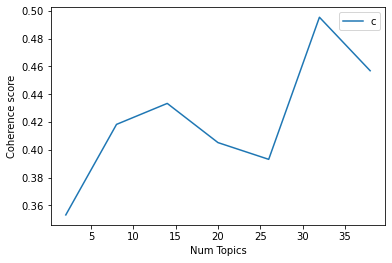

In [968]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [969]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3531
Num Topics = 8  has Coherence Value of 0.4183
Num Topics = 14  has Coherence Value of 0.4334
Num Topics = 20  has Coherence Value of 0.4052
Num Topics = 26  has Coherence Value of 0.3931
Num Topics = 32  has Coherence Value of 0.4955
Num Topics = 38  has Coherence Value of 0.4569


In [972]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.033*"enemy" + 0.026*"attack" + 0.023*"bos" + 0.023*"use" + 0.022*"item" + '
  '0.020*"get" + 0.017*"hit" + 0.014*"boss" + 0.014*"point" + 0.013*"die"'),
 (1,
  '0.158*"visuals" + 0.042*"curve" + 0.025*"shit" + 0.021*"slap" + '
  '0.019*"learning" + 0.019*"holy" + 0.018*"uncover" + 0.014*"clean" + '
  '0.009*"steep" + 0.009*"tightly"'),
 (2,
  '0.278*"dark" + 0.225*"soul" + 0.085*"souls" + 0.025*"satisfy" + 0.025*"mix" '
  '+ 0.024*"home" + 0.021*"feeling" + 0.018*"adorable" + 0.015*"remind" + '
  '0.013*"anime"'),
 (3,
  '0.070*"momodora" + 0.032*"s" + 0.024*"series" + 0.018*"new" + 0.018*"find" '
  '+ 0.018*"item" + 0.016*"reverie" + 0.015*"two" + 0.015*"dodge" + '
  '0.015*"moonlight"'),
 (4,
  '0.125*"fantastic" + 0.078*"perfect" + 0.078*"gorgeous" + 0.054*"length" + '
  '0.053*"least" + 0.037*"truly" + 0.036*"artwork" + 0.030*"please" + '
  '0.030*"offer" + 0.028*"the"'),
 (5,
  '0.083*"replay" + 0.083*"maple" + 0.066*"value" + 0.061*"may" + 0.052*"leaf" '
  '+ 0.048*"boo

In [973]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.389655 -0.197440       1        1  58.324031
0      0.364106 -0.105109       2        1  19.887091
3      0.285122  0.327933       3        1  13.003556
2      0.005995  0.152188       4        1   2.161008
10    -0.059878 -0.013966       5        1   1.433295
4     -0.075823 -0.011034       6        1   1.223630
6     -0.096974 -0.020403       7        1   0.991215
5     -0.080265  0.023141       8        1   0.885327
13    -0.106491 -0.023274       9        1   0.754519
9     -0.120067 -0.025996      10        1   0.459740
1     -0.125251 -0.026487      11        1   0.288830
11    -0.126007 -0.026518      12        1   0.239771
7     -0.125957 -0.026516      13        1   0.196062
12    -0.128166 -0.026517      14        1   0.151925, topic_info=           Term         Freq        Total Category  logprob  loglift
1          dark   932.000000   932.000000  Default  30.0000  30.0000
8          soul   757.000000   757.000000  Default  29.0000  29.0000
115    momodora  1410.000000  1410.000000  Default  28.0000  28.0000
50        enemy  1027.000000  1027.000000  Default  27.0000  27.0000
305           s   636.000000   636.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3163       hide     0.020185     0.737441  Topic14  -9.3664   2.8913
4360       tend     0.020175     0.733539  Topic14  -9.3669   2.8961
1400  encourage     0.020178     0.740492  Topic14  -9.3667   2.8868
1329     follow     0.020178     0.750395  Topic14  -9.3667   2.8736
1380     castle     0.020173     0.737240  Topic14  -9.3670   2.8910

[625 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
744       6  0.990535           a
343       9  0.973684    absolute
745       6  0.977558  accessible
192       5  0.989464      active
1276      7  0.967897   addictive
...     ...       ...         ...
190       3  0.399936       world
96        1  0.999734       worth
36        1  0.999255       would
653       5  0.984685         wow
548       7  0.909670     writing

[377 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 4, 3, 11, 5, 7, 6, 14, 10, 2, 12, 8, 13])

# Keyword Extraction

In [977]:
lemmatizer = WordNetLemmatizer()
  
print("Children :", lemmatizer.lemmatize("Children"))

Children : Children


In [988]:
text = "The doctors here are really nice and friendly."

In [989]:
from nltk.util import skipgrams
sent = text.split()
list(skipgrams(sent, 2, 6))

[('The', 'doctors'),
 ('The', 'here'),
 ('The', 'are'),
 ('The', 'really'),
 ('The', 'nice'),
 ('The', 'and'),
 ('The', 'friendly.'),
 ('doctors', 'here'),
 ('doctors', 'are'),
 ('doctors', 'really'),
 ('doctors', 'nice'),
 ('doctors', 'and'),
 ('doctors', 'friendly.'),
 ('here', 'are'),
 ('here', 'really'),
 ('here', 'nice'),
 ('here', 'and'),
 ('here', 'friendly.'),
 ('are', 'really'),
 ('are', 'nice'),
 ('are', 'and'),
 ('are', 'friendly.'),
 ('really', 'nice'),
 ('really', 'and'),
 ('really', 'friendly.'),
 ('nice', 'and'),
 ('nice', 'friendly.'),
 ('and', 'friendly.')]

In [1057]:
from spacy import displacy
from spacy.symbols import nsubj, VERB

In [1067]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("The doctors here are nice and friendly.")
data = []
for chunk in doc.noun_chunks:
    data.append([chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text])

In [1068]:
pd.DataFrame(data, columns=['text', 'root_text', 'root_dep', 'root_head_text'])

text root_text root_dep root_head_text
0  The doctors   doctors    nsubj            are

In [1069]:
for token in doc: 
    print(token.dep_)

det
nsubj
advmod
ROOT
acomp
cc
conj
punct


In [1072]:
displacy.render(doc, style='dep')

In [1059]:
# Finding a verb with a subject from below — good
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)

{shift}


In [1066]:
verbs

[shift]

# Use special Bigrams, Trigrams with collocations

### Vanilla Bigram

In [3322]:
words = get_n_gram(df1['review'], 2)[:20]
words
df_2 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df_2 = df_2.set_index('Unigram')
df_2.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Count', title = 'Top 20 bigram words')

In [1075]:
get_n_gram(df1['review'], 2)

[('dark soul', 534),
 ('bos fight', 285),
 ('feel like', 249),
 ('pixel art', 247),
 ('reverie moonlight', 234),
 ('momodora reverie', 200),
 ('art style', 161),
 ('save point', 145),
 ('level design', 128),
 ('highly recommend', 117),
 ('would recommend', 112),
 ('really good', 107),
 ('short sweet', 97),
 ('metroidvania style', 97),
 ('hollow knight', 93),
 ('dark souls', 93),
 ('final bos', 92),
 ('bit short', 90),
 ('one best', 88),
 ('hard mode', 86),
 ('momodora rutm', 85),
 ('play hard', 85),
 ('like dark', 85),
 ('cave story', 84),
 ('true end', 83),
 ('take damage', 83),
 ('first playthrough', 81),
 ('bos battle', 80),
 ('like metroidvania', 76),
 ('get hit', 75),
 ('pretty good', 74),
 ('take hour', 74),
 ('replay value', 70),
 ('would say', 70),
 ('felt like', 68),
 ('maple leaf', 68),
 ('tight control', 68),
 ('really fun', 67),
 ('recommend anyone', 66),
 ('first time', 63),
 ('pixel graphic', 63),
 ('well worth', 63),
 ('fun play', 62),
 ('definitely worth', 62),
 ('momod

### Vanilla Trigram

In [1285]:
words = get_n_gram(df1['review'], 3)[:20]
words
df_3 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df_3 = df_3.set_index('Unigram')
df_3.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Count', title = 'Top 20 trigram words')

In [1286]:
get_n_gram(df1['review'], 3)

[('momodora reverie moonlight', 196),
 ('like dark soul', 77),
 ('without take damage', 39),
 ('get true end', 36),
 ('beautiful pixel art', 31),
 ('without get hit', 28),
 ('play hard mode', 27),
 ('like hollow knight', 24),
 ('would recommend anyone', 23),
 ('short sweet metroidvania', 20),
 ('would highly recommend', 20),
 ('castlevania symphony night', 20),
 ('make feel like', 19),
 ('boss without take', 19),
 ('take hour beat', 17),
 ('beat boss without', 16),
 ('pixel art animation', 16),
 ('bit short side', 16),
 ('recommend anyone like', 16),
 ('dark soul castlevania', 16),
 ('compare dark soul', 15),
 ('well worth price', 15),
 ('never felt like', 14),
 ('hour first playthrough', 14),
 ('highly recommend anyone', 14),
 ('like cave story', 14),
 ('would definitely recommend', 13),
 ('worth full price', 13),
 ('fun bos fight', 13),
 ('get good end', 13),
 ('boss without get', 13),
 ('would like see', 13),
 ('dark soul feel', 13),
 ('great pixel art', 13),
 ('recommend anyone loo

In [1342]:
df2 = df.copy()

In [1343]:
df2

review  recommended  \
0     Metroidvania with some influences from Dark So...         True   
1     It's ok. Frustrating mechanics turned me off o...        False   
2                                                   Cat         True   
3     Has problems but overall pretty good. I'd sugg...         True   
4     This is a very good and very short game. If yo...         True   
...                                                 ...          ...   
3807    F*ck it! Time to die endlessly again and again.         True   
3808                                     So far so cute         True   
3809        Quite a masterpiece of an indie platformer.         True   
3810  A beautiful, smooth flowing platformer with a ...         True   
3811  Dark Souls + Castlevania SOTN + Kawaii = Momod...         True   

      polarity  length  word_count  avg_word_len  reading_ease  polarity_2  
0     0.233333     114          21      4.476190         89.75      0.7269  
1    -0.055000     193          35      4.542857         79.46      0.7543  
2     0.000000       3           1      3.000000        121.22      0.0000  
3     0.186111     132          25      4.320000         96.89      0.7622  
4     0.076916     971         182      4.340659         73.71      0.9701  
...        ...     ...         ...           ...           ...         ...  
3807 -0.125000      47           9      4.333333         96.18     -0.6360  
3808  0.300000      14           4      2.750000        118.18      0.6365  
3809  0.000000      43           7      5.285714         64.37      0.6573  
3810  0.675000      63          10      5.400000         69.79      0.6696  
3811  0.050000      67          12      4.666667         36.96      0.6588  

[3812 rows x 8 columns]

In [3325]:
# for review in df['review'].sample(n=20,random_state=69)\
#                     .map(lowercase)\
#                     .map(remove_html_tags)\
#                     .map(remove_url)\
#                     .map(normalize_single_quote)\
#                     .map(expand_contractions)\
#                     .map(remove_ansi_escape_sequences)\
#                     .map(remove_multi_whitespaces):
#     print('=> {}'.format(review))

In [3640]:
df['review']

review  recommended  \
0     Metroidvania with some influences from Dark So...         True   
1     It's ok. Frustrating mechanics turned me off o...        False   
2                                                   Cat         True   
3     Has problems but overall pretty good. I'd sugg...         True   
4     This is a very good and very short game. If yo...         True   
...                                                 ...          ...   
3807    F*ck it! Time to die endlessly again and again.         True   
3808                                     So far so cute         True   
3809        Quite a masterpiece of an indie platformer.         True   
3810  A beautiful, smooth flowing platformer with a ...         True   
3811  Dark Souls + Castlevania SOTN + Kawaii = Momod...         True   

      polarity  polarity_2  
0     0.233333      0.7269  
1    -0.055000      0.7543  
2     0.000000      0.0000  
3     0.186111      0.7622  
4     0.076916      0.9701  
...        ...         ...  
3807 -0.125000     -0.6360  
3808  0.300000      0.6365  
3809  0.000000      0.6573  
3810  0.675000      0.6696  
3811  0.050000      0.6588  

[3812 rows x 4 columns]

In [3666]:
tokenize_sent("Wow, was not expecting anything this good. I have been looking for a game like this for some time, it reminds me of bloodborne with creepy creature design, tough as nails combat, and controls that are tighter than a drum. I have to give a shout out to the devs for making a game that is predominately populated by females. This is even more impressive given that they have managed to eschew the typical oversexualization common in the genre, (Yes, there is a battle with a giant woman's breasts, but it isn't fetishized the way that many developers would play it.) it's a fun game with unique combat hat I won't spoil further. Enjoy!")

['Wow, was not expecting anything this good.',
 'I have been looking for a game like this for some time, it reminds me of bloodborne with creepy creature design, tough as nails combat, and controls that are tighter than a drum.',
 'I have to give a shout out to the devs for making a game that is predominately populated by females.',
 "This is even more impressive given that they have managed to eschew the typical oversexualization common in the genre, (Yes, there is a battle with a giant woman's breasts, but it isn't fetishized the way that many developers would play it.)",
 "it's a fun game with unique combat hat I won't spoil further.",
 'Enjoy!']

In [3742]:
ex = "Quick Description:\n-Momodora Reverie Under the Moonlight is the 4th entry in the Momodora series and is hands down the most polished version of the series.  This is a cute, mini metroidvania that metroidvania fans are likely going to enjoy.  It's a one man team and is quite rough around the edges, but makes up for it w/ charm and engaging combat.\n\nWhat's Good:\n-This game has a ton of charm.  There are a lot of cute characters and npcs all over the map.  Even some of the larger than life bosses are adorable looking characters.  I like the contrast between the brutal combat and the cute characters.  There are enemies that kill in 2-3 hits and spikes that instantly kill you.  You would never expect that from such an adorable looking game.\n-I'm a big fan of the pixel art.  I like the way the bosses look, the impact when you hit enemies w/ your weapons, and when small star-like currency flies out of dead enemies.  The environment itself is serviceable, although not as polished as top tier games.\n-The boss fights are hands down the most fun and challenging part of this game.  There are a quite few bosses in this 5 hourish game.  Some of small and agile, while others are very imposing and towering above you.  These bosses hit hard and are tough.   Memorizing their patterns and equipping the right powerups are key to victory.\n-Lots of secrets to find.  I really loved exploring the world.  This is not that big of a metroidvania and the map isn't great, but traversing the world is still really fun.  You will be heavily rewarded for checking every square inch the map.  Some secrets are really obvious, while others are more obtuse.  Being able to equip more health potions, finding powerful relics, or simply gaining health can all be found if you search hard enough.\n-You have a basic short ranged four leaf clover and a long range bow.  I loved that they chose a four leaf clover to be used as a weapon.  It's small things like this that make Momodora stand out.  You can unlock powerups that make your arrows poisonous or add flames to your attacks.\n\nCould Use a Few Changes:\n-Very difficult during the first 2 hrs.  You are way under-powered and thrown into the deep in.  During the first 30 minutes, there are several enemies that can 2-hit you.  Even after the first hr, there are a ton of enemies that can 3 hit you.  There are also lots of instant death spikes to avoid while platforming.  This is going to cause a lot of players to give up before really enjoying the meat of this game.\n-Pacing could use a lot of work.  I think this game would have benefit from adding one to two more areas and making this closer to a 8 hr experience.  Basically, as of right now, you spend your first two hrs dying left and right, then by the 4 hr mark, you become an incredibly overpowered tank that can brute force its way through almost everything.  If this game were a little longer, then they could have made the beginning a bit easier, and had a longer build up until you become extremely powerful.\n-Most people do not enjoy one hit death spikes.  They are used quite a bit here, especially in the second half of the game.  There has to be more creative ways to add new challenges to the end of the game.\n-Some areas of the map are kind of bizarre, and you can tell that this game lacks the polish that the best in the genre have.  You will also see quite a bit of duplicate enemies throughout the game.  Some enemies from the very beginning will also be at the very end in the same form.  This is not ideal imo.\n\nThoughts:\n-I'm glad that I finally got around to playing Momodora.  I haven't played any of the other games in the series, but I've been told that this one is the best and most well rounded of the 4.  There is a final 5th game in the works which I'm excited to check out.  This isn't a perfect game but it's a competent metroidvania that fans of the genre should check out.  The dev was clearly inspired by Dark Souls and the challenging, methodical combat is one of the highlights of the game.\n\nConsensus:\n-Middle of the Road Game (Tier 4 and makes up 25% of my reviews).  It's only $10 new but is an absolute steal right now while it's on sale for $4.  If you are scrambling to binge another metroidvania, than Momodora Reverie of the Moonlight is a fun one worthy of your time."
ex1 = "TL;DR: The game has nice graphics but it is awful to play. If you love pixel graphics and don't really care about how the game plays because its indie or whatever, you will love this game.\n\nYou can claim I got filtered or whatever but Castlevainia SOTN or any of its derivatives control and play much better than this. Honestly I'd rather play Super Castlevainia IV than this. I'm very disappointed.\n\n\n---The Good---\n- Nice Sprite animation and graphics.\n- Music is ok.\n- I got this in a bundle.\n\n\n\n---The Bad---\n- 4:3 aspect ratio and I can't seem to change it.\n- Enemies regularly shoot projectiles/run into you from off screen in the first few areas.\n- Enemies in the early areas seem to do more than half my health in damage on normal difficulty, Why even have a health bar if I can die in two hits? I would prefer a mushroom or fireflower for all the protection it would give me. \n- Animations look nice, but feel awful to control\n\t- Swing animation is stiff and pushes you so far forward that it often puts you inside enemies or potentially into hazards/ off cliffs.\n\t- Doing any action after a roll is delayed. You need to roll perfectly to make sure you don't receive any damage, which is annoying when there is more than one enemy on (or off) the screen.\n\n- Many death pits/spikes that make this game a chore to play, some less obvious than others. Why would I know that jumping into the water after the boss would kill me instantly? Very fun.\n"

In [3743]:
print(ex1)

TL;DR: The game has nice graphics but it is awful to play. If you love pixel graphics and don't really care about how the game plays because its indie or whatever, you will love this game.

You can claim I got filtered or whatever but Castlevainia SOTN or any of its derivatives control and play much better than this. Honestly I'd rather play Super Castlevainia IV than this. I'm very disappointed.


---The Good---
- Nice Sprite animation and graphics.
- Music is ok.
- I got this in a bundle.



---The Bad---
- 4:3 aspect ratio and I can't seem to change it.
- Enemies regularly shoot projectiles/run into you from off screen in the first few areas.
- Enemies in the early areas seem to do more than half my health in damage on normal difficulty, Why even have a health bar if I can die in two hits? I would prefer a mushroom or fireflower for all the protection it would give me. 
- Animations look nice, but feel awful to control
	- Swing animation is stiff and pushes you so far forward that i

In [3723]:
def add_missing_punct(text): 
    return re.sub('([A-Za-z0-9])\s*$', '\g<1>. ', text)

In [3798]:
def replace_bullets(text): 
    text = re.sub('([A-Za-z0-9])\s*\n+\s*[+-]?\s*', '\g<1>. ', text)
    text = re.sub('\s*([:+-]+)\s*\n+\s*[+-]?\s*', '. ', text) 
    return text

In [3641]:
df2['review'] = df['review'].map(lowercase)\
                    .map(remove_url)\
                    .map(remove_html_tags)\
                    .map(normalize_single_quote)\
                    .map(expand_contractions)\
                    .map(remove_non_ascii)\
                    .map(remove_ansi_escape_sequences)\
                    .map(remove_digits)\
                    .map(remove_symbols)\
                    .map(remove_multi_whitespaces)\
                    .map(lemmatize_text)\
                    .map(lambda x: remove_stopwords(x, get_extra_stopwords(game_name)))

D:\Anaconda3\envs\steam_insider\lib\site-packages\bs4\__init__.py:336: MarkupResemblesLocatorWarning:

"." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.

D:\Anaconda3\envs\steam_insider\lib\site-packages\bs4\__init__.py:336: MarkupResemblesLocatorWarning:

" ." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.



In [1345]:
nlp = spacy.load('en_core_web_sm')

In [3642]:
reviews = df2['review']

In [3643]:
reviews

0       metroidvania influence dark soul enjoy check g...
1       ok frustrating mechanic turn definitely feel s...
2                                                     cat
3       problem overall pretty good would suggest play...
4       good short ever want platformer soulslike mech...
                              ...                        
3807                              f ck time die endlessly
3808                                             far cute
3809                   quite masterpiece indie platformer
3810       beautiful smooth flow platformer lot challenge
3811         dark soul castlevania sotn kawaii rutm great
Name: review, Length: 3812, dtype: object

In [ ]:
# def tokenize_text(text):
#     doc = nlp(text, disable=['parser','ner'])
#     lemma = [token.lemma_ for token in doc if token.pos_ != 'PUNCT']
#     return lemma

In [2675]:
# reviews_word_list = [word for words in reviews for word in words if word not in en_stopwords]

In [2676]:
# len(reviews_word_list)

160420

### Test out normal bigram frequency counter

In [3454]:
def get_n_gram(x, ngram, min_df=1):
    vec = CountVectorizer(ngram_range=[ngram, ngram], min_df=min_df).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq

In [3455]:
bigram = get_n_gram(reviews, 2, 2)

In [3456]:
bigram_df = pd.DataFrame(bigram, columns=['bigram', 'freq'])

In [3457]:
def bigramRules(bigram): 
    first_pos = set(['ADJ', 'NOUN'])
    second_pos = set(['NOUN'])
    
    tags = [token.pos_ for token in nlp(bigram, disable=['parser','ner'])]
    
    return tags[0] in first_pos and tags[1] in second_pos

In [3477]:
bigram_df

bigram  freq
0                 dark soul   626
1                 feel like   318
2                boss fight   312
3                 pixel art   247
4                 art style   161
...                     ...   ...
16919            time maybe     2
16920  gorgeous atmospheric     2
16921         pleasing look     2
16922      difficult people     2
16923               fan iii     2

[16924 rows x 2 columns]

In [3487]:
bigram_df_100 = bigram_df[:100][bigram_df['bigram'][:100].map(bigramRules)]

In [3488]:
keywords = bigram_df_100['bigram']

### Initialize bigram/trigram collocations finder

In [3392]:
bigrams = nltk.collocations.BigramAssocMeasures()
trigrams = nltk.collocations.TrigramAssocMeasures()

In [3393]:
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(reviews_word_list)
# trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(reviews_word_list)

### 1. Counting Frequencies of Adjacent Words
- Main idea: simply order by frequency
- Issues: too sensitive to very frequent pairs and pronouns/articles/prepositions come up often
- Solution: filter for only adjectives and nouns

In [3399]:
bigram_freq = bigramFinder.ngram_fd.items()

In [3400]:
bigramFreqTable = pd.DataFrame(bigram_freq, columns=['bigram','freq']).sort_values(by='freq', ascending=False)

In [3401]:
bigramFreqTable.head().reset_index(drop=True)

bigram  freq
0   (dark, soul)   626
1     (I, would)   482
2      (I, play)   347
3   (feel, like)   317
4  (boss, fight)   310

In [2708]:
bigramFreqTable[:10]

bigram  freq
2      (dark, soul)   626
34       (I, would)   482
428       (I, play)   347
2004   (feel, like)   317
249   (boss, fight)   310
747      (I, think)   259
593    (pixel, art)   247
643     (I, really)   231
1376       (I, get)   229
3086      (I, feel)   219

In [2709]:
game_name = 'Momodora: Reverie Under The Moonlight'

In [2710]:
#get english stopwords
en_stopwords = stopwords.words('english')
en_stopwords.extend(get_extra_stopwords(game_name))
en_stopwords = set(en_stopwords)

In [2711]:
# check if bigram is acceptable
# acceptable bigram (Noun/Adjective, Noun)
def rightTypes(ngram, stopwords):
    first_type = set(['ADJ', 'NOUN'])
    second_type = set(['NOUN'])
    
    tags = [token.pos_ for token in nlp(' '.join(ngram), disable=['parser','ner'])]
    
    return tags[0] in first_type and tags[1] in second_type

In [2712]:
#filter bigrams
filtered_bi = bigramFreqTable[bigramFreqTable.bigram.map(lambda x: rightTypes(x, en_stopwords))]

In [2713]:
filtered_bi

bigram  freq
2             (dark, soul)   626
249          (boss, fight)   310
593           (pixel, art)   247
910           (art, style)   161
3920       (level, design)   128
...                    ...   ...
38813   (darksouls, style)     1
38812  (knight, darksouls)     1
38807       (hate, puzzle)     1
38805     (great, becasue)     1
94645       (kawaii, rutm)     1

[30154 rows x 2 columns]

In [2714]:
filtered_bi[:10]

bigram  freq
2              (dark, soul)   626
249           (boss, fight)   310
593            (pixel, art)   247
910            (art, style)   161
3920        (level, design)   128
2899  (metroidvania, style)    98
1313          (final, boss)    94
3465       (hollow, knight)    93
225            (hard, mode)    88
1522   (good, metroidvania)    85

In [1762]:
trigram_freq = trigramFinder.ngram_fd.items()

In [1763]:
trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)

In [1764]:
trigramFreqTable.head().reset_index(drop=True)

trigram  freq
0  (this, game, be)   611
1   (the, game, be)   488
2       (it, be, a)   429
3   (of, the, game)   393
4     (if, you, be)   330

In [1765]:
trigramFreqTable[:10]

trigram  freq
449          (this, game, be)   611
326           (the, game, be)   488
264               (it, be, a)   429
29            (of, the, game)   393
76              (if, you, be)   330
497              (I, do, not)   321
1121             (a, lot, of)   299
119            (there, be, a)   236
607     (reverie, under, the)   234
608   (under, the, moonlight)   234

In [2667]:
# check if trigram is acceptable
# acceptable trigram (Adjective/Noun, Anything, Adjective/Noun)
def rightTypesTri(ngram, stopwords):
    if ngram[0] in stopwords or ngram[1] in stopwords or ngram[2] in stopwords:
        return False
    
    first_type = set(['ADJ', 'NOUN'])
    third_type = set(['ADJ', 'NOUN'])
    
    tags = [token.pos_ for token in nlp(' '.join(ngram), disable=['parser','ner'])]
    
    return tags[0] in first_type and tags[2] in third_type

In [2668]:
filtered_tri = trigramFreqTable[trigramFreqTable.trigram.map(lambda x: rightTypesTri(x, en_stopwords))]

In [1769]:
filtered_tri[:10]

trigram  freq
9893           (beautiful, pixel, art)    30
16256              (great, pixel, art)    13
43139             (dark, soul, series)    12
81145         (dark, soul, bloodborne)    12
17252              (pixel, art, style)    12
8818                (fun, boss, fight)    12
122600  (momoyawn, momoyawn, momoyawn)    12
37934            (worth, every, penny)    11
1458           (instant, death, spike)    11
35476           (gorgeous, pixel, art)    11

In [1770]:
freq_bi = filtered_bi[:20].bigram.values

In [1771]:
freq_tri = filtered_tri[:20].trigram.values

### 2. PMI
The Pointwise Mutual Information: The main intuition is that it measures how much more likely the words co-occur than if they were independent. However, it is very sensitive to rare combination of words. For example, if a random bigram ‘abc xyz’ appears, and neither ‘abc’ nor ‘xyz’ appeared anywhere else in the text, ‘abc xyz’ will be identified as highly significant bigram when it could just be a random misspelling or a phrase too rare to generalize as a bigram. Therefore, this method is often used with a frequency filter.

In [1772]:
bigramFinder.apply_freq_filter(20)

In [1773]:
bigramPMITable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.pmi)), columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)

In [1774]:
bigramPMITable[:10]

bigram        PMI
0           (gon, na)  13.488454
1            (tl, dr)  12.681099
2         (mega, man)  12.450319
3        (top, notch)  11.999876
4  (pardoner, fennel)  11.887725
5            (etc, .)  11.852866
6       (old, school)  11.468202
7    (hollow, knight)  11.364691
8       (non, linear)  11.114528
9            (ca, nt)  10.929487

In [1775]:
trigramFinder.apply_freq_filter(20)

In [1776]:
trigramPMITable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.pmi)), columns=['trigram','PMI']).sort_values(by='PMI', ascending=False)

In [1777]:
trigramPMITable[:10]

trigram        PMI
0   (momodora, reverie, under)  17.979614
1       (like, hollow, knight)  16.563103
2      (without, take, damage)  15.378441
3     (my, first, playthrough)  15.187532
4        (my, only, complaint)  15.033890
5            (can, turn, into)  14.744903
6             (a, maple, leaf)  14.534580
7  (castlevania, symphony, of)  14.424360
8      (beautiful, pixel, art)  14.408124
9      (under, the, moonlight)  14.348780

In [1778]:
pmi_bi = bigramPMITable[:20].bigram.values

In [1779]:
pmi_tri = trigramPMITable[:20].trigram.values

### 3. t-test
- Consider if we have a corpus with N words, and social and media have word counts C(social) and C(media) respectively. Assuming null hypothesis with social and media being independent
- However, the same problem occurs where pairs with prepositions, pronouns, articles etc. come up as most significant. Therefore, we need to apply the same filters from 1.

In [1780]:
bigramTtable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.student_t)), columns=['bigram','t']).sort_values(by='t', ascending=False)

In [1781]:
bigramTtable.head()

bigram          t
0      (it, be)  44.021473
1  (this, game)  42.832465
2   (the, game)  39.705526
3     (do, not)  34.130466
4     (of, the)  34.057157

In [1782]:
filteredT_bi = bigramTtable[bigramTtable.bigram.map(lambda x: rightTypes(x))]

In [1783]:
filteredT_bi[:10]

bigram          t
10            (dark, soul)  24.936993
25           (boss, fight)  17.160161
35            (pixel, art)  15.651579
51     (momodora, reverie)  14.050493
72            (art, style)  12.554702
106        (level, design)  11.077934
170       (hollow, knight)   9.639994
171  (metroidvania, style)   9.633334
175          (final, boss)   9.617148
189           (hard, mode)   9.315798

In [1784]:
trigramTtable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.student_t)), columns=['trigram','t']).sort_values(by='t', ascending=False)

In [1785]:
trigramTtable.head()

trigram          t
0  (this, game, be)  24.504842
1   (the, game, be)  21.183349
2       (it, be, a)  20.237553
3   (of, the, game)  19.431409
4     (if, you, be)  18.081037

In [1786]:
filteredT_tri = trigramTtable[trigramTtable.trigram.map(lambda x: rightTypesTri(x))]

In [1787]:
filteredT_tri.head(10)

trigram         t
373  (beautiful, pixel, art)  5.476974

In [1788]:
t_bi = filteredT_bi[:20].bigram.values

In [1789]:
t_tri = filteredT_tri[:20].trigram.values

### 4. Chi-Square
- The chi-square test assumes in the null hypothesis that words are independent, just like in t-test.

In [1790]:
bigramChiTable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.chi_sq)), columns=['bigram','chi-sq']).sort_values(by='chi-sq', ascending=False)

In [1791]:
bigramChiTable.head(20)

bigram         chi-sq
0              (tl, dr)  321801.000000
1             (gon, na)  298813.356993
2      (hollow, knight)  245219.556197
3      (reverie, under)  221396.286093
4          (dark, soul)  188415.754432
5       (replay, value)  120039.484292
6           (mega, man)  111916.172930
7    (pardoner, fennel)   98499.184572
8          (top, notch)   85992.555275
9              (etc, .)   85053.734088
10        (maple, leaf)   78451.964041
11        (old, school)   67974.090711
12        (non, linear)   64267.008458
13        (save, point)   62662.951045
14         (pixel, art)   59768.701544
15  (highly, recommend)   54026.669495
16  (momodora, reverie)   49706.945320
17       (double, jump)   49446.329230
18            (do, not)   49402.438362
19     (side, scroller)   48253.416122

In [1792]:
trigramChiTable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.chi_sq)), columns=['trigram','chi-sq']).sort_values(by='chi-sq', ascending=False)

In [1793]:
trigramChiTable.head(20)

trigram        chi-sq
0    (momodora, reverie, under)  5.040699e+07
1       (under, the, moonlight)  4.882303e+06
2         (reverie, under, the)  4.469161e+06
3        (like, hollow, knight)  2.181220e+06
4      (my, first, playthrough)  1.796127e+06
5             (in, my, opinion)  1.221070e+06
6       (without, take, damage)  1.067527e+06
7              (a, maple, leaf)  8.930941e+05
8         (my, only, complaint)  7.398909e+05
9       (beautiful, pixel, art)  6.984601e+05
10              (d, dark, soul)  6.626719e+05
11            (can, turn, into)  6.056918e+05
12             (on, hard, mode)  5.228958e+05
13          (the, true, ending)  4.955061e+05
14           (of, my, favorite)  4.906923e+05
15  (castlevania, symphony, of)  4.407521e+05
16            (for, those, who)  4.272490e+05
17    (highly, recommend, this)  4.040805e+05
18           (like, dark, soul)  4.027291e+05
19          (look, forward, to)  3.368021e+05

In [1794]:
chi_bi = bigramChiTable[:20].bigram.values

In [1795]:
chi_tri = trigramChiTable[:20].trigram.values

### 5. Likelihood

In [1796]:
bigramLikTable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.likelihood_ratio)), columns=['bigram','likelihood ratio']).sort_values(by='likelihood ratio', ascending=False)

In [1797]:
bigramLikTable.head()

bigram  likelihood ratio
0  (this, game)       9835.288549
1     (do, not)       7863.396730
2  (dark, soul)       7297.747949
3     (if, you)       7250.318199
4      (it, be)       7180.375672

In [1798]:
filteredLik_bi = bigramLikTable[bigramLikTable.bigram.map(lambda x: rightTypes(x))]

In [1799]:
filteredLik_bi.head(10)

bigram  likelihood ratio
2          (dark, soul)       7297.747949
13         (pixel, art)       2492.776265
14        (boss, fight)       2359.086549
19  (momodora, reverie)       2065.502363
24     (hollow, knight)       1549.625615
31         (art, style)       1341.961958
37      (level, design)       1135.616591
44      (replay, value)       1016.637330
47        (cave, story)        967.853974
52        (maple, leaf)        918.265406

In [1800]:
trigramLikTable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.likelihood_ratio)), columns=['trigram','likelihood ratio']).sort_values(by='likelihood ratio', ascending=False)

In [1801]:
trigramLikTable.head()

trigram  likelihood ratio
0         (this, game, be)      17229.663631
1         (of, this, game)      16010.923654
2  (recommend, this, game)      15978.884737
3         (in, this, game)      15627.605899
4           (if, you, can)      15536.967237

In [1802]:
filteredLik_tri = trigramLikTable[trigramLikTable.trigram.map(lambda x: rightTypesTri(x))]

In [1803]:
filteredLik_tri.head(20)

trigram  likelihood ratio
292  (beautiful, pixel, art)       4133.133489

In [1804]:
lik_bi = filteredLik_bi[:20].bigram.values

In [1805]:
lik_tri = filteredLik_tri[:20].trigram.values

### Bigram Comparison

In [1806]:
bigramsCompare = pd.DataFrame([freq_bi, pmi_bi, t_bi, chi_bi, lik_bi]).T

In [1807]:
bigramsCompare.columns = ['Frequency With Filter', 'PMI', 'T-test With Filter', 'Chi-Sq Test', 'Likeihood Ratio Test With Filter']

In [1809]:
bigramsCompare

Frequency With Filter                 PMI     T-test With Filter  \
0            (dark, soul)           (gon, na)           (dark, soul)   
1           (boss, fight)            (tl, dr)          (boss, fight)   
2            (pixel, art)         (mega, man)           (pixel, art)   
3     (momodora, reverie)        (top, notch)    (momodora, reverie)   
4            (art, style)  (pardoner, fennel)           (art, style)   
5         (level, design)            (etc, .)        (level, design)   
6   (metroidvania, style)       (old, school)       (hollow, knight)   
7           (final, boss)    (hollow, knight)  (metroidvania, style)   
8        (hollow, knight)       (non, linear)          (final, boss)   
9            (hard, mode)            (ca, nt)           (hard, mode)   
10       (momodora, rutm)     (replay, value)       (momodora, rutm)   
11          (cave, story)    (pay, attention)          (cave, story)   
12         (boss, battle)      (side, scroll)         (boss, battle)   
13   (good, metroidvania)    (side, scroller)   (action, platformer)   
14     (hard, difficulty)      (double, jump)     (hard, difficulty)   
15   (action, platformer)       (maple, leaf)        (replay, value)   
16        (replay, value)    (metroid, vania)         (true, ending)   
17       (tight, control)    (instant, death)       (tight, control)   
18         (true, ending)       (health, bar)   (good, metroidvania)   
19          (maple, leaf)       (anime, girl)          (maple, leaf)   

            Chi-Sq Test Likeihood Ratio Test With Filter  
0              (tl, dr)                     (dark, soul)  
1             (gon, na)                     (pixel, art)  
2      (hollow, knight)                    (boss, fight)  
3      (reverie, under)              (momodora, reverie)  
4          (dark, soul)                 (hollow, knight)  
5       (replay, value)                     (art, style)  
6           (mega, man)                  (level, design)  
7    (pardoner, fennel)                  (replay, value)  
8          (top, notch)                    (cave, story)  
9              (etc, .)                    (maple, leaf)  
10        (maple, leaf)                 (momodora, rutm)  
11        (old, school)                    (final, boss)  
12        (non, linear)                   (true, ending)  
13        (save, point)                     (hard, mode)  
14         (pixel, art)             (action, platformer)  
15  (highly, recommend)                   (boss, battle)  
16  (momodora, reverie)            (metroidvania, style)  
17       (double, jump)                 (tight, control)  
18            (do, not)                    (dodge, roll)  
19     (side, scroller)                    (full, price)

### Trigram Comparison

In [1810]:
trigramsCompare = pd.DataFrame([freq_tri, pmi_tri, t_tri, chi_tri, lik_tri]).T

In [1811]:
trigramsCompare.columns = ['Frequency With Filter', 'PMI', 'T-test With Filter', 'Chi-Sq Test', 'Likeihood Ratio Test With Filter']

In [1812]:
trigramsCompare

Frequency With Filter                          PMI  \
0          (beautiful, pixel, art)   (momodora, reverie, under)   
1              (great, pixel, art)       (like, hollow, knight)   
2             (dark, soul, series)      (without, take, damage)   
3         (dark, soul, bloodborne)     (my, first, playthrough)   
4              (pixel, art, style)        (my, only, complaint)   
5               (fun, boss, fight)            (can, turn, into)   
6   (momoyawn, momoyawn, momoyawn)             (a, maple, leaf)   
7            (worth, every, penny)  (castlevania, symphony, of)   
8          (instant, death, spike)      (beautiful, pixel, art)   
9           (gorgeous, pixel, art)      (under, the, moonlight)   
10            (insta, kill, spike)            (in, my, opinion)   
11         (priestess, name, kaho)        (reverie, under, the)   
12             (dark, soul, style)              (d, dark, soul)   
13         (beautiful, art, style)            (for, those, who)   
14              (good, pixel, art)             (on, hard, mode)   
15           (good, replay, value)          (without, get, hit)   
16   (great, little, metroidvania)        (boss, without, take)   
17             (great, art, style)          (the, true, ending)   
18           (pixel, art, graphic)    (highly, recommend, this)   
19             (last, save, point)          (look, forward, to)   

         T-test With Filter                  Chi-Sq Test  \
0   (beautiful, pixel, art)   (momodora, reverie, under)   
1                      None      (under, the, moonlight)   
2                      None        (reverie, under, the)   
3                      None       (like, hollow, knight)   
4                      None     (my, first, playthrough)   
5                      None            (in, my, opinion)   
6                      None      (without, take, damage)   
7                      None             (a, maple, leaf)   
8                      None        (my, only, complaint)   
9                      None      (beautiful, pixel, art)   
10                     None              (d, dark, soul)   
11                     None            (can, turn, into)   
12                     None             (on, hard, mode)   
13                     None          (the, true, ending)   
14                     None           (of, my, favorite)   
15                     None  (castlevania, symphony, of)   
16                     None            (for, those, who)   
17                     None    (highly, recommend, this)   
18                     None           (like, dark, soul)   
19                     None          (look, forward, to)   

   Likeihood Ratio Test With Filter  
0           (beautiful, pixel, art)  
1                              None  
2                              None  
3                              None  
4                              None  
5                              None  
6                              None  
7                              None  
8                              None  
9                              None  
10                             None  
11                             None  
12                             None  
13                             None  
14                             None  
15                             None  
16                             None  
17                             None  
18                             None  
19                             None

In [1813]:
filtered_bi_copy = filtered_bi.copy()

In [1814]:
filtered_bi_copy['bigram'] = filtered_bi_copy['bigram'].map(lambda x: ' '.join(x))

In [1815]:
filtered_bi_copy = filtered_bi_copy.set_index('bigram')

In [1816]:
filtered_bi_copy[:20].iplot(kind='bar', xTitle = 'Bigram', yTitle = 'Frequency', title = 'Top 20 Bigrams')

In [1817]:
df2

review  recommended  \
0     metroidvania with some influences from dark so...         True   
1     it is ok. frustrating mechanics turned me off ...        False   
2                                                   cat         True   
3     has problems but overall pretty good. i would ...         True   
4     this is a very good and very short game. if yo...         True   
...                                                 ...          ...   
3807     f ck it time to die endlessly again and again.         True   
3808                                     so far so cute         True   
3809        quite a masterpiece of an indie platformer.         True   
3810  a beautiful, smooth flowing platformer with a ...         True   
3811  dark souls castlevania sotn kawaii momodora ru...         True   

                                       review_tokenized  \
0     [metroidvania, with, some, influence, from, da...   
1     [it, be, ok, frustrating, mechanic, turn, I, o...   
2                                                 [cat]   
3     [have, problem, but, overall, pretty, good, I,...   
4     [this, be, a, very, good, and, very, short, ga...   
...                                                 ...   
3807  [f*ck, it, time, to, die, endlessly, again, an...   
3808                                [so, far, so, cute]   
3809  [quite, a, masterpiece, of, an, indie, platfor...   
3810  [a, beautiful, smooth, flow, platformer, with,...   
3811  [dark, soul, +, castlevania, sotn, +, kawaii, ...   

                                         review_bigrams  
0     [metroidvania with, with some, some influence,...  
1     [it be, be ok, ok frustrating, frustrating mec...  
2                                                    []  
3     [have problem, problem but, but overall, overa...  
4     [this be, be a, a very, very good, good and, a...  
...                                                 ...  
3807  [f*ck it, it time, time to, to die, die endles...  
3808                          [so far, far so, so cute]  
3809  [quite a, a masterpiece, masterpiece of, of an...  
3810  [a beautiful, beautiful smooth, smooth flow, f...  
3811  [dark soul, soul +, + castlevania, castlevania...  

[3812 rows x 4 columns]

In [1818]:
def form_bigram(words):
    return [' '.join([first, second]) for first, second in zip(words, words[1:])]

In [1819]:
df2['review_tokenized'] = reviews

In [1820]:
df2['review_bigrams'] = df2['review_tokenized'].map(form_bigram)

In [1821]:
df2_positive = df2[df2['recommended'] == True]
df2_negative = df2[df2['recommended'] == False]

In [1822]:
df2_positive['review_bigrams']

0       [metroidvania with, with some, some influence,...
2                                                      []
3       [have problem, problem but, but overall, overa...
4       [this be, be a, a very, very good, good and, a...
5       [a short, short but, but sweet, sweet metroidv...
                              ...                        
3807    [f ck, ck it, it time, time to, to die, die en...
3808                            [so far, far so, so cute]
3809    [quite a, a masterpiece, masterpiece of, of an...
3810    [a beautiful, beautiful smooth, smooth flow, f...
3811    [dark soul, soul castlevania, castlevania sotn...
Name: review_bigrams, Length: 3544, dtype: object

In [1823]:
def count_ngram_occurences(ngram, review_ngrams): 
    count = 0
    for review_ngram in review_ngrams: 
        for phrases in review_ngram: 
            if phrases == ngram:
                count += 1
        
    return count

In [1824]:
count_ngram_occurences('dark soul', df2_positive['review_bigrams'])

587

In [1825]:
count_ngram_occurences('dark soul', df2_negative['review_bigrams'])

39

In [1826]:
filtered_bi_copy['bigram'] = filtered_bi_copy.index

In [1827]:
filtered_bi_copy['positive'] = filtered_bi_copy['bigram'].map(lambda x: count_ngram_occurences(x, df2_positive['review_bigrams']))  

In [1828]:
filtered_bi_copy['negative'] = filtered_bi_copy['bigram'].map(lambda x: count_ngram_occurences(x, df2_negative['review_bigrams'])) 

In [1829]:
filtered_bi_copy[:20]

freq              bigram  positive  negative
bigram                                                          
dark soul            626           dark soul       587        39
boss fight           301          boss fight       255        46
pixel art            247           pixel art       230        17
momodora reverie     199    momodora reverie       188        11
art style            160           art style       146        14
level design         124        level design       103        21
metroidvania style    97  metroidvania style        94         3
final boss            94          final boss        77        17
hollow knight         93       hollow knight        63        30
hard mode             88           hard mode        79         9
momodora rutm         84       momodora rutm        82         2
cave story            83          cave story        81         2
boss battle           81         boss battle        76         5
good metroidvania     80   good metroidvania        72         8
hard difficulty       77     hard difficulty        75         2
action platformer     75   action platformer        70         5
replay value          70        replay value        69         1
tight control         67       tight control        65         2
true ending           67         true ending        62         5
maple leaf            65          maple leaf        63         2

In [1679]:
df2.drop(['polarity', 'length', 'word_count', 'avg_word_len', 'reading_ease', 'polarity_2'], axis=1, inplace=True)

In [1830]:
df2

review  recommended  \
0     metroidvania with some influences from dark so...         True   
1     it is ok. frustrating mechanics turned me off ...        False   
2                                                   cat         True   
3     has problems but overall pretty good. i would ...         True   
4     this is a very good and very short game. if yo...         True   
...                                                 ...          ...   
3807     f ck it time to die endlessly again and again.         True   
3808                                     so far so cute         True   
3809        quite a masterpiece of an indie platformer.         True   
3810  a beautiful, smooth flowing platformer with a ...         True   
3811  dark souls castlevania sotn kawaii momodora ru...         True   

                                       review_tokenized  \
0     [metroidvania, with, some, influence, from, da...   
1     [it, be, ok, frustrating, mechanic, turn, I, o...   
2                                                 [cat]   
3     [have, problem, but, overall, pretty, good, I,...   
4     [this, be, a, very, good, and, very, short, ga...   
...                                                 ...   
3807  [f, ck, it, time, to, die, endlessly, again, a...   
3808                                [so, far, so, cute]   
3809  [quite, a, masterpiece, of, an, indie, platfor...   
3810  [a, beautiful, smooth, flow, platformer, with,...   
3811  [dark, soul, castlevania, sotn, kawaii, momodo...   

                                         review_bigrams  
0     [metroidvania with, with some, some influence,...  
1     [it be, be ok, ok frustrating, frustrating mec...  
2                                                    []  
3     [have problem, problem but, but overall, overa...  
4     [this be, be a, a very, very good, good and, a...  
...                                                 ...  
3807  [f ck, ck it, it time, time to, to die, die en...  
3808                          [so far, far so, so cute]  
3809  [quite a, a masterpiece, masterpiece of, of an...  
3810  [a beautiful, beautiful smooth, smooth flow, f...  
3811  [dark soul, soul castlevania, castlevania sotn...  

[3812 rows x 4 columns]

### Grouping Keywords Together

In [3890]:
len(keywords)

50

In [3492]:
keywords_embeddings = embedder.encode(list(keywords))

# Normalize the embeddings to unit length
keywords_embeddings = keywords_embeddings /  np.linalg.norm(keywords_embeddings, axis=1, keepdims=True)

In [3866]:
# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='average', distance_threshold=0.6)
clustering_model.fit(keywords_embeddings)
cluster_assignment = clustering_model.labels_

clustered_keywords = {}
for keyword_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_keywords:
        clustered_keywords[cluster_id] = []

    clustered_keywords[cluster_id].append(keywords[keyword_id])

# clusters = []    
# for i, cluster in clustered_sentences.items():
#     clusters.append({'name': i, 'sentences': cluster, 'size': len(cluster)})

In [3867]:
clustered_keywords 

{20: ['dark soul'],
 3: ['boss fight', 'final boss', 'boss battle', 'enemy boss'],
 0: ['pixel art',
  'art style',
  'art animation',
  'art music',
  'beautiful pixel'],
 15: ['level design'],
 7: ['metroidvania style',
  'good metroidvania',
  'great metroidvania',
  'little metroidvania',
  'metroidvania genre',
  'fun metroidvania'],
 1: ['hollow knight', 'cave story'],
 19: ['hard mode'],
 8: ['hard difficulty',
  'insane difficulty',
  'normal difficulty',
  'high difficulty'],
 17: ['action platformer'],
 21: ['replay value'],
 13: ['tight control'],
 12: ['true ending'],
 23: ['maple leaf'],
 5: ['fun play', 'lot fun', 'good play'],
 9: ['first time'],
 2: ['worth price', 'full price', 'worth time', 'worth money'],
 16: ['dodge roll'],
 6: ['great soundtrack', 'symphony night', 'great music'],
 14: ['little bit'],
 4: ['range attack', 'melee attack', 'combat system'],
 18: ['passive item'],
 11: ['sound effect', 'sound design'],
 22: ['main character'],
 10: ['long time']}

In [3590]:
keywords_merged = []

for cluster in clustered_keywords.values(): 
    freq_sum = 0
    
    for keyword in cluster: 
        freq_sum += bigram_df_100[bigram_df_100['bigram'] == keyword]['freq'].values[0]
        
    keywords_merged.append((cluster, freq_sum))

In [3593]:
keywords_merged.sort(key=lambda x: x[1], reverse=True)

In [3596]:
keywords_merged_df = pd.DataFrame(keywords_merged, columns=['bigrams', 'freq'])

In [3597]:
keywords_merged_df

bigrams  freq
0                                         [dark soul]   626
1   [boss fight, final boss, boss battle, enemy boss]   540
2   [pixel art, art style, art animation, art musi...   524
3   [metroidvania style, good metroidvania, great ...   366
4   [hard difficulty, insane difficulty, normal di...   214
5   [worth price, full price, worth time, worth mo...   180
6                         [hollow knight, cave story]   176
7     [great soundtrack, symphony night, great music]   147
8                      [fun play, lot fun, good play]   140
9         [range attack, melee attack, combat system]   130
10                                     [level design]   128
11                                        [hard mode]    88
12                       [sound effect, sound design]    79
13                                [action platformer]    75
14                                     [replay value]    70
15                                    [tight control]    68
16                                      [true ending]    67
17                                       [maple leaf]    65
18                                       [first time]    63
19                                       [dodge roll]    56
20                                       [little bit]    52
21                                     [passive item]    42
22                                   [main character]    39
23                                        [long time]    37

### Finding Reviews or Sentences Relevant to Keyword 
- We need to find a way to associate reviews and sentences to the most important keywords. As they are necessary for the sentiment analysis and summarization which will be performed later.

In [1735]:
df2

review  recommended  \
0     metroidvania with some influences from dark so...         True   
1     it is ok. frustrating mechanics turned me off ...        False   
2                                                   cat         True   
3     has problems but overall pretty good. i would ...         True   
4     this is a very good and very short game. if yo...         True   
...                                                 ...          ...   
3807    f*ck it! time to die endlessly again and again.         True   
3808                                     so far so cute         True   
3809        quite a masterpiece of an indie platformer.         True   
3810  a beautiful, smooth flowing platformer with a ...         True   
3811  dark souls + castlevania sotn + kawaii = momod...         True   

                                       review_tokenized  \
0     [metroidvania, with, some, influence, from, da...   
1     [it, be, ok, frustrating, mechanic, turn, I, o...   
2                                                 [cat]   
3     [have, problem, but, overall, pretty, good, I,...   
4     [this, be, a, very, good, and, very, short, ga...   
...                                                 ...   
3807  [f*ck, it, time, to, die, endlessly, again, an...   
3808                                [so, far, so, cute]   
3809  [quite, a, masterpiece, of, an, indie, platfor...   
3810  [a, beautiful, smooth, flow, platformer, with,...   
3811  [dark, soul, +, castlevania, sotn, +, kawaii, ...   

                                         review_bigrams  
0     [metroidvania with, with some, some influence,...  
1     [it be, be ok, ok frustrating, frustrating mec...  
2                                                    []  
3     [have problem, problem but, but overall, overa...  
4     [this be, be a, a very, very good, good and, a...  
...                                                 ...  
3807  [f*ck it, it time, time to, to die, die endles...  
3808                          [so far, far so, so cute]  
3809  [quite a, a masterpiece, masterpiece of, of an...  
3810  [a beautiful, beautiful smooth, smooth flow, f...  
3811  [dark soul, soul +, + castlevania, castlevania...  

[3812 rows x 4 columns]

In [3602]:
from fuzzysearch import find_near_matches

ex = find_near_matches('PATTERN', '---PATERN---', max_l_dist=1)

In [1968]:
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer', 'sentencizer']


In [1972]:
def tokenize_sent(text):
    doc = nlp(text, disable=['ner', 'attribute_ruler', 'lemmatizer', 'sentencizer'])
    sents = [str(sent).strip() for sent in doc.sents]
    return sents

In [3638]:
df['review']

0       Metroidvania with some influences from Dark So...
1       It's ok. Frustrating mechanics turned me off o...
2                                                     Cat
3       Has problems but overall pretty good. I'd sugg...
4       This is a very good and very short game. If yo...
                              ...                        
3807      F*ck it! Time to die endlessly again and again.
3808                                       So far so cute
3809          Quite a masterpiece of an indie platformer.
3810    A beautiful, smooth flowing platformer with a ...
3811    Dark Souls + Castlevania SOTN + Kawaii = Momod...
Name: review, Length: 3812, dtype: object

In [3633]:
# counting the number of reviews that have the keyword 'dark soul'
count = 0
keyword_sents = []

search_phrases = ['metroidvania style',
     'good metroidvania',
     'great metroidvania',
     'little metroidvania',
     'metroidvania genre',
     'fun metroidvania']

for review in df['review']: 
    sents = tokenize_sent(review)
    for sent in sents: 
        for search_phrase in search_phrases:
            # sentence needs to be preprocessed exactly the same as the review before applying bigram  
            # so that the keywords (bigrams) can be found again
            # append the original sentence
            matches = find_near_matches(search_phrase, sent.lower(), max_l_dist=1)
        
            if len(matches) != 0: 
                keyword_sents.append(sent)

            break
            
        count += len(matches)

In [3634]:
len(keyword_sents)

104

In [2961]:
# split bullet points to sentences
count = 0
keyword_sents = []
keyword_reviews = []
keyword_recc = []

for review, recommendation in zip(df['review'].map(replace_bullets), df['recommended']): 
    sents = tokenize_sent(review)
    for sent in sents: 
        matches = find_near_matches(search_phrase, sent.lower(), max_l_dist=1)
        if len(matches) != 0:
            keyword_sents.append(sent)
            keyword_reviews.append(review)
            keyword_recc.append(recommendation)
            print(f'=> {sent}')
        count += len(matches)

=> Metroidvania with some influences from Dark Souls.
=> This game is awesome, it has great art design and an insane diffculty, when played on hard mode, it become a personal fave for its la dark souls but
=> The dev was clearly inspired by Dark Souls and the challenging, methodical combat is one of the highlights of the game.
=> [*]the game is clearly inspired by dark souls game mechanics, yet it only takes the worst of them.
=> The Bad: low monster variety, combat is simplistic [dodge, stunlock, kill], the minimalist story that would make Dark Souls seem overly detailed, characters were forgettable.
=> The story reminds me of Dark Souls (doesn't everything?).
=> Like Dark Souls, much of the lore is stored in item descriptions, for those who are interested.
=> If you want a cute 2D Dark Souls platformer and you're tired of Hollow Knight, go for Momodora: RUTM.
=> The difficulty is a bit extreme for me, the combat almost feels a bit Dark Souls-ish which I am personally not a fan of due

=> I call it "The Cuphead Effect" but many could argue it started with the cancer sometimes known as Dark Souls.
=> In Dark Souls, Salt&Sanctuary, and Dead Cells, you are not damaged from colliding with enemies except for certain specific cases.
=> [*]Some frustrating aspects because they wanted to make it the "Dark Souls" of pixel platformers for some reason
=> The story is a bit of a mystery, really gives you a dark souls but in 2d feel.
=> Speaking of dying the saving is basically dark souls bonfires except terribly implamented.
=> Like Dark Souls, once you obtain a certain item you can warp to a save point from another save point.
=> But more like Dark Souls 1, there are only a few you can choose to warp too and almost all of them are in very inconvinient locations..
=> Does the Dark Souls bonfire mechanic all wrong.
=> It has some game mechanics [i]just like Dark Souls[/i].
=> [*] The world and levels are very well made as even backtracking does not feel like a chore, the way the 

=> A lot of people are likening it to Dark Souls, but outside of some moderate difficulty and a roll mechanic, I don't see it.
=> influence from SoTN, Cave Story and Dark Souls.
=> I think the comparisons I've seen to Darksouls are unwarranted, but otherwise an excellent game for an indie action platformer with metroidvania aspects to it.
=> This is also probably the biggest letdown for people seeing all the Dark Souls comparisons and wanting to play the game for the challenge.
=> Again, seeing it compared to Dark Souls, Castlevania or Metroid - in all of those your weapons change [i]a lot[/i] - this is quite the letdown.
=> A sprite based game that wants to be Dark Souls / Metroidvania but comes up short due to mechanical issues.
=> Yeah, I may be not very original with this point, but this game reminds me a lot of Bloodborne and Dark Souls background stories.
=> I think my biggest gripe is that you can tell this game wants to be Dark Souls but fails to come close capturing the essenc

=> 2D metroidvania with a darksouls feel.
=> In a couple ways it's almost Dark Souls's cute little sister.
=> I feel it puts Dark Souls' bonfires to shame.
=> You also get a dodge roll forwards and backwards with I-frames that allow you to avoid attacks and collision with enemies (rather like the one in Dark Souls or Salt and Sanctuary only more consistent), along with a double jump from the get go.
=> All these, while in today's age of hamfisted variety *coughdarksoulsweaponscoughcallofdutygunscough*, might not seem like much.
=> These items come in two categories; the consumables that get replenished on the save points (like Estus Flasks and Bonfires in Dark Souls), and the equippables that change you or your attacks' properties in some fashion.
=> Refillable usable items at the savepoint like in darksouls.
=> For some reason I see people compare it to Dark Souls.
=> I've never played Dark Souls.
=> A relatively high production value, pixelated anime platformer version of Dark Souls.

=> To try and make my point, I'll draw a comparison to Dark Souls (pls forgive me).
=> Fighting Gwyn in Dark Souls was an especially effective moment because of the contrast between the build-up and the actual fight.
=> Do you like Dark Souls, but 2d and with platforming that doesn't make you want to tear your fingernails off with a rusty nail?
=> Enemies hit hard and your health is low at the start, so get used to dodging like it's Dark Souls, but when you get into the swing of it there are some fantastic bosses, wonderfully designed areas and a morbid but beautiful soundtrack.
=> Playing it in hard made it feel like a "casual" dark souls, really fun, nice challenge, bunch of stuff hidden...
=> Short and sweet, a little dark souls and a little metroidvania.
=> Love it, kinda reminds me of dark souls.
=> This game gave me more of a Dark Souls vibe than both Salt and Sanctuary and Lords of the Fallen combined.
=> It's not because this game tires to copy Dark Souls but make it 2D.
=> It'

=> It definately brings me vibes of Dark Souls nearly throught out the whole game!
=> The gameplay itself is a Metroidvaina type game with the combat and narrative aspects of the dark souls games.
=> While reverie under the moonlight is great, the only, ONLY, thing that bothered me about it is how much it copies from the Dark Souls/Bloodborne series.
=> fun metroidvania with a good atmosphere, but some of the music is too sad, and the setting is overwhelmingly desolate, even if you take into account the Dark Souls influence.
=> The OST is also pretty good, leaving you some vibes to the dark souls OST tho most of the people like to call this "The blodborne of the cave storys".
=> As it is, it's still a phenomenal appetizer for the genre with shades of Dark Souls, Bloodborne and Shovel Knight.
=> I would recommend this game to anyone that is likes the combat in Dark Souls and don't mind dying too much.
=> This game does have some of your typical Dark Souls mechanics like invincibility fr

=> Pixelated Dark Souls.
=> this quenched my dark souls thirst ... 

has awesome bosses
has i-frames
has replenishable heals
has triggerable checkpoints
has decent enemy design
is kinda gritty

run it on normal its like running with 25+ vigour
run it on hard or harder its like running with "5" or less vigour

go hard for your much needed dex fag challenge :D
=> It kind of reminds me of dark souls a bit.
=> Underlooked gem, feels like if Super Metroid and Dark Souls had a love child and made it kind of creepy-cute.
=> You'll also get incredibly pretty pixel artsy 2d sprites and backgrounds, a neat soundtrack and Dark Souls'esque UI aesthetics.
=> Some people have compared this to Dark Souls but the similarities are few.
=> They Bleed Pixels meets Dark Souls style gameplay in Momodora.
=> The gameplay is like that of a metroidvania, combined with elements of dark souls.
=> Clearly heavily influenced by Dark Souls.
=> So many things remind me of Dark Souls and Castlevania: mainly the atmo

=> Got pixelated Dark Souls instead.
=> Beautiful spritework and a setting that people may have compared to Dark Souls, but that's not really a bad thing.
=> You discover secrets, learn about the world you're in, and you really get scared like in dark souls when you don't know if you are gonna make it to the next checkpoint (which are bells AND THAT IS AWESOME because you literally hit checkpoints to save).
=> It's about as Dark Souls like as a 2D platformer can be, in a good way.
=> Metroidvania + "Cute/Kawaii" anime girls art style + a slight influence from Dark Souls = this game.
=> It's like a Cave Story/Dark Souls blend that doesn't make me want to set the world ablaze.
=> Like 2D Dark Souls with cute waifu material.
=> It's like Dark Souls with little girls or Metroid with a kitten.
=> Level Design: Very similar to Dark Souls (in good ways).
=> - There are a few, carefully placed looping shortcuts (think Dark Souls 1)
=> It's almost like a 2D Dark Souls, especially when played on

=> It's bog-standard with only a couple of tricks: Lifted from Dark Souls was a silly refillable health potion and other buff items system that really isn't necessary outside of a Souls-style game (Insultingly, the refillable health potions don't refill enough of your health to undo the one hit you can take.
=> And a very polished, visually-stunning 2D metroidvania game with a Dark Souls-like atmosphere.
=> Very much reminded me of Dark Souls, in both the combat and storytelling, which, in my opinion, is a very good thing.
=> It's like if Dark Souls was actually fun to control!
=> It's like if you took Metroid, Castlevania, Dark Souls, Bloodborne and shoved them into a blender and hit puree.
=> A game that wants to be Metroidvania crossed with Dark Souls.
=> And though the game goes for higher than average difficulty, it's no Dark Souls either.
=> Cute 2D Dark Souls
=> It's like a perfect blend of Touhou, Castlevania, and Dark Souls, as far as the atmosphere and art goes.
=> It has gre

0        True
1       False
2        True
3        True
4        True
        ...  
3807     True
3808     True
3809     True
3810     True
3811     True
Name: recommended, Length: 3812, dtype: bool

In [3928]:
first_5 = df['review'][:100]

first_5 = first_5.map(add_missing_punct)\
                    .map(replace_bullets)\
                    .map(remove_url)\
                    .map(remove_html_tags)\
                    .map(normalize_single_quote)\
                    .map(remove_non_ascii)\
                    .map(remove_ansi_escape_sequences)\
                    .map(remove_multi_whitespaces)

In [3955]:
keyword_sents = []
keyword_recc = []
search_phrases = ['pixel art', 'art style', 'art animation', 'art music', 'beautiful pixel']

count = 0

for review, recc in zip(first_5, df['recommended'][:100]): 
    sents = pd.Series(tokenize_sent(review)).map(remove_leading_symbols)
    
    sents_prep = sents.map(lowercase)\
                    .map(expand_contractions)\
                    .map(remove_digits)\
                    .map(remove_symbols)\
                    .map(remove_multi_whitespaces)\
                    .map(lemmatize_text)\
                    .map(lambda x: remove_stopwords(x, get_extra_stopwords(game_name))) 
        
    for sent, sent_prep in zip(sents, sents_prep):
        for search_phrase in search_phrases:
            matches = find_near_matches(search_phrase, sent_prep, max_l_dist=1)
        
            if len(matches) != 0: 
                print(search_phrase)
                keyword_sents.append(sent)
                keyword_reviews.append(review)
                keyword_recc.append(recc)

#                 count += len(matches)
                # check next sentence if there's a match among the keywords
                break

pixel art
art music
pixel art
art style
art music
pixel art
art animation
art style
art music
art music
art style
pixel art


In [3956]:
for keyword_sent in keyword_sents: 
    print(f'=> {keyword_sent}')

=> A charming and difficult pixel action platformer.
=> The boss fights felt so smooth, were rewarding, and had great music to them.
=> I'm a big fan of the pixel art.
=> Really beautiful art style and animations, but slow pacing and lack of some original gameplay features made the game feel pretty monotonous.
=> I've experienced several headakes while I was visiting some areas that had less resonant music than others.
=> A nice ~7 hour metroidvania, good pixel art, good bosses, difficult enough to be challenging without being frustrating, relatively simple combat but in an enjoyable way.
=> And lastly, you get to keep seeing the art and animations.
=> Cute art style and character design.
=> Ok so overall, I'd say the art, music, characters, and world of Momodora are wonderful, but from a mechanics and story standpoint the game falls really flat for me.
=> The art, the music, the world, and the way the story is presented were all deeply enthralling.
=> A beautifully cute artstyle on to

### Embedding Sentences with BERT

In [1977]:
# download a pretrained model 
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

  0%|          | 0.00/83.4M [00:00<?, ?B/s]

In [1978]:
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']
sentence_embeddings = model.encode(sentences)

In [1979]:
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.76214114e-01  1.20601185e-01 -2.93623894e-01 -2.29858130e-01
 -8.22925642e-02  2.37709269e-01  3.39985102e-01 -7.80964494e-01
  1.18127629e-01  1.63374022e-01 -1.37714952e-01  2.40282640e-01
  4.25125301e-01  1.72417730e-01  1.05279773e-01  5.18164158e-01
  6.22214936e-02  3.99286002e-01 -1.81652561e-01 -5.85578561e-01
  4.49718051e-02 -1.72750577e-01 -2.68443495e-01 -1.47386104e-01
 -1.89217702e-01  1.92150757e-01 -3.83842617e-01 -3.96006882e-01
  4.30648983e-01 -3.15319479e-01  3.65949512e-01  6.05158433e-02
  3.57325971e-01  1.59736410e-01 -3.00984025e-01  2.63250232e-01
 -3.94311249e-01  1.84855461e-01 -3.99548978e-01 -2.67889768e-01
 -5.45117259e-01 -3.13405693e-02 -4.30644095e-01  1.33278236e-01
 -1.74793690e-01 -4.35465217e-01 -4.77379024e-01  7.12559745e-02
 -7.36999735e-02  5.69136977e-01 -2.82579690e-01  5.24976030e-02
 -8.20007920e-01  1.98297039e-01  1.69511735e-01  2.71780163e-01
  2.64610

### Clustering Similar Sentences

In [2752]:
corpus_sentences = keyword_sents

In [2002]:
corpus_sentences = list(corpus_sentences)
print("Encode the corpus. This might take a while")
corpus_embeddings = model.encode(corpus_sentences, batch_size=64, show_progress_bar=True, convert_to_tensor=True)

print("Start clustering")
start_time = time.time()

#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 25 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(corpus_embeddings, min_community_size=25, threshold=0.75)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("\t", corpus_sentences[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("\t", corpus_sentences[sentence_id])

Encode the corpus. This might take a while


Batches:   0%|          | 0/11 [00:00<?, ?it/s]

Start clustering


RuntimeError: selected index k out of range

In [2145]:
"""
This is a simple application for sentence embeddings: clustering
Sentences are mapped to sentence embeddings and then agglomerative clustering with a threshold is applied.
"""
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np

embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'A man is eating pasta.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.']

corpus = keyword_sents

corpus_embeddings = embedder.encode(corpus)

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='average', distance_threshold=0.5)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])

clusters = []    
for i, cluster in clustered_sentences.items():
    clusters.append({'name': i, 'sentences': cluster, 'size': len(cluster)})

In [2146]:
clusters.sort(key=lambda x: x.get('size'), reverse=True)

In [2147]:
clusters

[{'name': 9,
  'sentences': ['Metroidvania with some influences from Dark Souls.',
   "However, if you're a fan of both Dark Souls like games and Metroidvania's you'll probably enjoy this.",
   'this game seems to be a combination of Castlevania and Dark Souls, and a good one.',
   'A fairly simple metroidvania with intense boss battles with a bit of a 2D Dark souls vibe, could use a bit more items and new abilities to unlock but the pixel art and animations are amazing :)',
   'Metroidvania, anime, darksouls.',
   'A Dark Souls + Metroidvania mashup.',
   'This one leans more towards the Metroidvania, with the aesthetics and mood of a Dark Souls game.',
   "I can only recommend this game if you're a huge fan of metroidvania/dark souls-esque games and have already played though all the better ones.",
   "Well this is the Dark Souls of Metroidvanias (though truthfully if you want something even closer to a Dark Souls of Metroidvanias, play Salt and Sanctuary; it's like 2D dark souls in 

In [2073]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [2114]:
print(' '.join(keyword_sents))

Metroidvania with some influences from Dark Souls. This game is awesome, it has great art design and an insane diffculty, when played on hard mode, it become a personal fave for its la dark souls but The dev was clearly inspired by Dark Souls and the challenging, methodical combat is one of the highlights of the game. [*]the game is clearly inspired by dark souls game mechanics, yet it only takes the worst of them. The Bad: low monster variety, combat is simplistic [dodge, stunlock, kill], the minimalist story that would make Dark Souls seem overly detailed, characters were forgettable. The story reminds me of Dark Souls (doesn't everything?). Like Dark Souls, much of the lore is stored in item descriptions, for those who are interested. If you want a cute 2D Dark Souls platformer and you're tired of Hollow Knight, go for Momodora: RUTM. The difficulty is a bit extreme for me, the combat almost feels a bit Dark Souls-ish which I am personally not a fan of due to its frustrating nature.

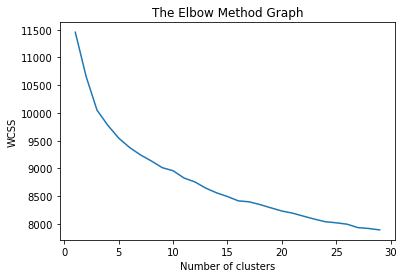

In [2805]:
#3 Using the elbow method to find out the optimal number of #clusters. 
#KMeans class from the sklearn library.
from sklearn.cluster import KMeans

corpus_embeddings = embedder.encode(keyword_sents)
wcss=[]
#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and #appended to our wcss list.
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i,  random_state=0)
    #i above is between 1-10 numbers. init parameter is the random #initialization method  
    #we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
    #find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
    #the next parameter is n_init which is the number of times the #K_means algorithm will be run with
    #different initial centroid.
    kmeans.fit(corpus_embeddings)
    #kmeans algorithm fits to the X dataset
    wcss.append(kmeans.inertia_)
    #kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
    
#4.Plot the elbow graph
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [2781]:
corpus_embeddings = embedder.encode(keyword_sents)
# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

In [2801]:
# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters, random_state=0)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

# for i, cluster in enumerate(clustered_sentences):
#     print("Cluster ", i+1)
#     print(cluster)
#     print("")

In [2274]:
# scatter plot with plotly express 
fig = px.scatter(x=corpus_embeddings[:,0], y=corpus_embeddings[:,1], color=clustering_model.labels_.astype(np.str), 
                labels={"color": "Clusters"})
fig

In [2788]:
# scatter plat with graph object (go)
fig = go.Figure()
scatter_1 = go.Scatter(x=corpus_embeddings[:,0], 
                       y=corpus_embeddings[:,1], 
                       hovertext=corpus,
                       hoverinfo="text",
                       mode='markers', 
                       marker_color=clustering_model.labels_,
                       name='Clusters')

scatter_2 = go.Scatter(x=centroids[:,0], 
                       y=centroids[:,1], 
                       mode='markers', 
                       
                       marker=dict(color='LightSkyBlue',
                                   size=12,
                                   line=dict(
                                       color='Red',
                                       width=2)),
                       marker_symbol='x', 
                       name='Centroids')

fig.add_traces([scatter_1, scatter_2])
fig.show()

In [2754]:
corpus_embeddings.shape

(650, 384)

In [2266]:
# PCA with 2 dimensions
pca = PCA(n_components=2)
components = pca.fit_transform(corpus_embeddings)

fig = px.scatter(components, x=0, y=1, color=clustering_model.labels_.astype(np.str), labels={"color": "Clusters"})
fig

In [2806]:
# PCA with 3 dimensions
pca = PCA(n_components=3)
components = pca.fit_transform(corpus_embeddings)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=clustering_model.labels_.astype(np.str),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [3138]:
# Read sample 'simple3' from file.
sample = corpus_embeddings
# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 5
initial_centers = kmeans_plusplus_initializer(sample, amount_initial_centers).initialize()
# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(sample, initial_centers, 20)
xmeans_instance.process()
# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

In [3139]:
xmeans_labels = [0]* len(corpus_embeddings)

for i, cluster in enumerate(clusters): 
    for label in cluster: 
        xmeans_labels[label] = i 
        
xmeans_labels = np.array(xmeans_labels)

In [3140]:
centroids = centers
closest, distances = vq(centroids, corpus_embeddings)

for index in closest: 
    print(keyword_sents[index])

This game is very much inspired by Dark Souls, featuring a VERY light combo system and a roll that provides a limited amount of invincibility frames, along with a ranged bow attack, and many passive and active items to utilise.
It's like Dark Souls.
A bit of a metroidvania type game with the atmosphere of a dark souls title (stated by others).
It's no exaggeration when I say it's got such a "2D Dark Souls" feel to it.
Cleary visible that this game draws a lot of inspirations from dark souls, so any dark souls player will probably like this game as well.


In [3137]:
# PCA with 3 dimensions
pca = PCA(n_components=3)
components = pca.fit_transform(corpus_embeddings)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=xmeans_labels.astype(np.str),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [3306]:
from pyclustering.cluster.gmeans import gmeans

# Read sample 'Lsun' from file.
sample = corpus_embeddings
# Create instance of G-Means algorithm. By default algorithm start search from single cluster.
gmeans_instance = gmeans(sample).process()
# Extract clustering results: clusters and their centers
clusters = gmeans_instance.get_clusters()
centers = gmeans_instance.get_centers()

In [3307]:
clusters.sort(key=lambda x: len(x), reverse=True)

In [3308]:
clusters_len = np.array([len(cluster) for cluster in clusters])

In [3309]:
clusters_len

array([11,  9,  9,  9,  9,  8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [3310]:
centers = np.array(centers)

In [3311]:
centers = centers[clusters_len.argsort()]

In [3312]:
for i, cluster in enumerate(clusters[0:5]): 
    print(f'Cluster {i} ({len(cluster)}):')
    for index in cluster: 
        print(f'=> {keyword_sents[index]}')

Cluster 0 (11):
=> Dark Souls Lite.
=> Dark Souls
=> Like Dark Souls
=> [*]dark souls vibes.
=> new dark souls
=> It's the dark souls of dark souls jokes
=> Dark Souls style that deserves appreciation!
=> Similarities to Dark Souls:.
=> It's like Dark Souls.
=> A bit like Dark Souls really.
=> Dark Souls pioneered gaming as we know it, all hail Dark Souls.
Cluster 1 (9):
=> It's impossible not to make a comparison to Dark Souls here, as Momodora has borrowed several pages from the book of souls design.
=> I'm sure we all know of the infamous "Dark Souls of ___" comparisons reviewers love to make, but hear me out-
=> For some reason I see people compare it to Dark Souls.
=> To try and make my point, I'll draw a comparison to Dark Souls (pls forgive me).
=> I'd like to compare it akin to Dark Souls, although I'm sure there some that would beg to differ.
=> The comparison to Dark Souls is almost impossible to make, but it really is such a good take on the formula in 2D.
=> Some people hav

In [3313]:
gmeans_labels = [0]* len(corpus_embeddings)

for i, cluster in enumerate(clusters): 
    for label in cluster: 
        gmeans_labels[label] = i 
        
gmeans_labels = np.array(gmeans_labels)

In [3314]:
gmeans_labels_top_5 = np.array(list(map(lambda x: -1 if x not in range(0, 5) else x, gmeans_labels)))

In [3315]:
centroids = centers
closest, distances = vq(centroids, corpus_embeddings)

for index in closest: 
    print(keyword_sents[index])

You like dark souls get it.
The only gripe I had was the lack of any leveling system, but I still recommend it to any metroidvania/dark souls fans!
Its a bit like a metroidvaina mixed with dark souls.
Fun little metroidvania with souls-ish combat, but I think comparisons to Dark Souls are generally overstated.
You can see and feel not just the metroidvania, but all so dark souls and even a little bit of bloodborn too.
This is my first time with a Metroidvania, but I would say that it felt like 2D Dark Souls, which is a great compliment.
If you don't like the idea of a dark souls-esque metroidvania, you may want to get a second opinion.
Normal diffaculty was a bit too easy

Over all if you like metroidvania's and enjoy the world and gameplay design of Darksouls then this is a great pickup
IF you are a fan of metroidvania and difficulty (such as dark souls).
It's like the illegitimate child of Super Metroid and Darksouls/Bloodborne.
It's like Dark Souls with little girls or Metroid with 

In [3316]:
centroids = centers[:5]
closest, distances = vq(centroids, corpus_embeddings)

for index in closest: 
    print(keyword_sents[index])

You like dark souls get it.
The only gripe I had was the lack of any leveling system, but I still recommend it to any metroidvania/dark souls fans!
Its a bit like a metroidvaina mixed with dark souls.
Fun little metroidvania with souls-ish combat, but I think comparisons to Dark Souls are generally overstated.
You can see and feel not just the metroidvania, but all so dark souls and even a little bit of bloodborn too.


In [3317]:
# PCA with 3 dimensions
pca = PCA(n_components=3)
components = pca.fit_transform(corpus_embeddings)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=gmeans_labels_top_5,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [3318]:
# PCA with 3 dimensions
pca = PCA(n_components=3)
components = pca.fit_transform(corpus_embeddings)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=gmeans_labels_top_5.astype(np.str),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [3155]:
# TSNE with 3 dimensions
tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(corpus_embeddings)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=gmeans_labels.astype(np.str), labels={'color': 'Clusters'}
)
fig.show()

In [2282]:
# TSNE with 2 dimensions
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(corpus_embeddings)

In [2283]:
fig = px.scatter(
    projections, x=0, y=1,
    color=clustering_model.labels_.astype(np.str), labels={'color': 'Clusters'}
)
fig.show()

In [2765]:
# TSNE with 3 dimensions
tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(corpus_embeddings)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=clustering_model.labels_.astype(np.str), labels={'color': 'Clusters'}
)
fig.show()

In [2310]:
# UMAP with 2 dimensions 
proj_2d = umap.UMAP(n_components=2).fit_transform(corpus_embeddings)

In [2311]:
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=clustering_model.labels_.astype(np.str), labels={'color': 'Clusters'}
)
fig_2d

In [2313]:
# UMAP with 3 dimensions 
proj_3d = umap.UMAP(n_components=3).fit_transform(corpus_embeddings)

fig_3d = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=clustering_model.labels_.astype(np.str), labels={'color': 'Clusters'}
)
fig_3d.show()

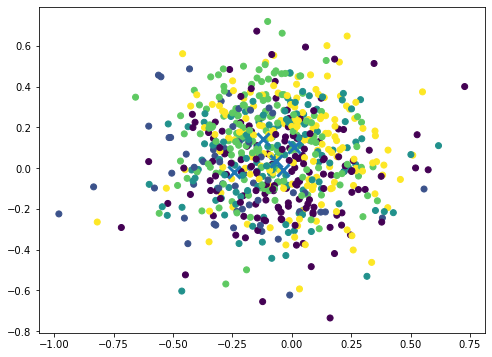

In [2156]:
# centroids = clustering_model.cluster_centers_
# plt.figure(figsize=(8, 6))
# plt.scatter(corpus_embeddings[:,0], corpus_embeddings[:,1], c=clustering_model.labels_.astype(float))
# plt.scatter(centroids[:,0], centroids[:,1], marker = "x", s=150,linewidths = 3, zorder = 10)

In [2158]:
from scipy.cluster.vq import vq

In [2815]:
centroids = clustering_model.cluster_centers_
closest, distances = vq(centroids, corpus_embeddings)

for index in closest: 
    print(keyword_sents[index])

It's like Dark Souls.
A bit of a metroidvania type game with the atmosphere of a dark souls title (stated by others).
It's no exaggeration when I say it's got such a "2D Dark Souls" feel to it.
The Gameplay is amazing, the story/lore that you can find is sad and cool, the dark souls influence works well, and the music is fucking beautiful, as well as the game itself.
This game is very much inspired by Dark Souls, featuring a VERY light combo system and a roll that provides a limited amount of invincibility frames, along with a ranged bow attack, and many passive and active items to utilise.


It's no exaggeration when I say it's got such a "2D Dark Souls" feel to it.
It's like Dark Souls.
The Gameplay is amazing, the story/lore that you can find is sad and cool, the dark souls influence works well, and the music is fucking beautiful, as well as the game itself.
A bit of a metroidvania type game with the atmosphere of a dark souls title (stated by others).
This game is very much inspired by Dark Souls, featuring a VERY light combo system and a roll that provides a limited amount of invincibility frames, along with a ranged bow attack, and many passive and active items to utilise.


In [2329]:
corpus_embeddings = embedder.encode(corpus)

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

# Perform kmean clustering
clustering_model = hdbscan.HDBSCAN()
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])

clusters = []    
for i, cluster in clustered_sentences.items():
    clusters.append({'name': i, 'sentences': cluster, 'size': len(cluster)})

In [2337]:
for cluster in clusters: 
    print('Cluster {}, size {}'.format(cluster['name'], cluster['size']))

Cluster 0, size 265
Cluster -1, size 378
Cluster 1, size 7


In [2341]:
# PCA with 2 dimensions
pca = PCA(n_components=2)
components = pca.fit_transform(corpus_embeddings)

fig = px.scatter(components, x=0, y=1, color=clustering_model.labels_.astype(np.str), labels={"color": "Clusters"})
fig

In [2342]:
# PCA with 3 dimensions
pca = PCA(n_components=3)
components = pca.fit_transform(corpus_embeddings)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=clustering_model.labels_.astype(np.str),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [2377]:
# choose the number of components for PCA 
total_vars = []
pcas = list(range(1, 300))

for i in pcas:
    pca = PCA(n_components=i)
    components = pca.fit_transform(corpus_embeddings)
    total_var = pca.explained_variance_ratio_.sum() * 100
    total_vars.append(total_var)
    
fig = px.line(x=pcas, y=total_vars, title="PCA's Explained Variances")
fig.show()

In [2453]:
corpus_embeddings_pca = corpus_embeddings

In [2463]:
# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters, random_state=0)
clustering_model.fit(corpus_embeddings_pca)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
["The story reminds me of Dark Souls (doesn't everything?).", "If you want a cute 2D Dark Souls platformer and you're tired of Hollow Knight, go for Momodora: RUTM.", "It's not Dark Souls hard.", 'A tribute to dark souls I found very enjoyable.', 'If you\'re looking for "dark souls", look elsewhere.', 'If you\'re looking for "dark souls, no questions answered" kinda lore, look elsewhere.', 'The story and look is like if Touhou took place in Lordran (or Dark Souls took place in Gensokyo...).', 'Also, one of the very very few cases where you can unironically say "its the dark souls of <genre>".', 'Dark Souls animates their bosses and adds sound ques so you KNOW something big is about to happen.', 'I think the amount of "dark-soulsness" on it is on point, not exagerated and overly punishing just for the sake of it.', 'A few nitpicks aside, it tries too hard to be like Dark Souls', 'And last, but not least – heavily inspired by some elements from Dark Souls.', 'Beside that, the 

In [2464]:
for cluster in clustered_sentences: 
    print(len(cluster))

149
57
127
155
162


In [2465]:
pca = PCA(n_components=3)
components = pca.fit_transform(corpus_embeddings_pca)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=clustering_model.labels_.astype(np.str),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [2466]:
centroids = clustering_model.cluster_centers_
closest, distances = vq(centroids, corpus_embeddings_pca)

for index in closest: 
    print(corpus[index])

It's no exaggeration when I say it's got such a "2D Dark Souls" feel to it.
It's like Dark Souls.
The Gameplay is amazing, the story/lore that you can find is sad and cool, the dark souls influence works well, and the music is fucking beautiful, as well as the game itself.
A bit of a metroidvania type game with the atmosphere of a dark souls title (stated by others).
This game is very much inspired by Dark Souls, featuring a VERY light combo system and a roll that provides a limited amount of invincibility frames, along with a ranged bow attack, and many passive and active items to utilise.


In [2399]:
# Perform hdbscan clustering 
clustering_model = hdbscan.HDBSCAN(leaf_size=10, min_samples=20)
clustering_model.fit(corpus_embeddings_pca)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])

clusters = []    
for i, cluster in clustered_sentences.items():
    clusters.append({'name': i, 'sentences': cluster, 'size': len(cluster)})

In [2405]:
for cluster in clusters: 
    if cluster['name'] != -1:
        print('Cluster {}, size {}: {}'.format(cluster['name'], cluster['size'], cluster['sentences']))

Cluster 0, size 38: ['Metroidvania with some influences from Dark Souls.', 'this game seems to be a combination of Castlevania and Dark Souls, and a good one.', 'A Dark Souls + Metroidvania mashup.', 'This one leans more towards the Metroidvania, with the aesthetics and mood of a Dark Souls game.', "Well this is the Dark Souls of Metroidvanias (though truthfully if you want something even closer to a Dark Souls of Metroidvanias, play Salt and Sanctuary; it's like 2D dark souls in every sense of the word, all the way down to not having a map you can look at).", 'Metroidvania Dark souls esk title.', "It's a metroidvania with some Dark Souls elements (mostly the Souls part).", '+ The gameplay standard Metroidvania, but with a dash of Dark Souls.', 'Somewhere between dark souls castlevania metroid', 'So if you want a metroidvania meets dark souls like game this is so for you.', 'A Dark Souls influenced Metroidvania.', 'a great metrovania that takes inspiration from dark souls and castlevan

In [2401]:
# PCA with 3 dimensions
pca = PCA(n_components=3)
components = pca.fit_transform(corpus_embeddings_pca)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=clustering_model.labels_.astype(np.str),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [2826]:
# use TextRank to pick out the most important sentences
text = ' '.join(keyword_sents)

In [2829]:
summa_text = summarize(text, words=80)

In [2830]:
print(summa_text)

It has some game mechanics [i]just like Dark Souls[/i].
So if you want a metroidvania meets dark souls like game this is so for you.
You like dark souls get it.
Pretty much it does feel like a 2D "Dark Souls" game if you play it on the hard mode.
All in all, I would recommend this to anyone who likes metroidvania games, Dark Souls, or action platformers.
I feel like the Dark Souls and Bloodborne was being played while making this game.


In [2162]:
SentimentIntensityAnalyzer().polarity_scores("It's like Dark Souls.")

{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}

### Group Similar Keywords Together

In [1831]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [1832]:
test = [' '.join(bigram) for bigram in filtered_bi['bigram']]

In [1833]:
ratios = [fuzz.ratio, fuzz.partial_ratio, fuzz.token_sort_ratio, fuzz.token_set_ratio] 

In [1856]:
for bigram in test[:10]: 
    print(process.extractBests(bigram, test, score_cutoff=80, limit=5))

[('dark soul', 100), ('dark soulsy', 90), ('dark soulsesque', 90), ('dark soulsness', 90), ('dank soul', 89)]
[('boss fight', 100), ('boss boss', 95), ('boss refight', 91), ('boss fighter', 91), ('boss light', 90)]
[('pixel art', 100), ('pixel artstyle', 90), ('pixel artistry', 90), ('beautiful pixel', 86), ('gorgeous pixel', 86)]
[('momodora reverie', 100), ('momomdora reverie', 97), ('momodora momodora', 95), ('momodara reverie', 94), ('momodaro reverie', 88)]
[('art style', 100), ('art syle', 94), ('metroidvania style', 86), ('castlevania style', 86), ('style gameplay', 86)]
[('level design', 100), ('design level', 95), ('level level', 95), ('clever design', 88), ('questionable design', 86)]
[('metroidvania style', 100), ('metrodvania style', 97), ('metroivania style', 97), ('style metroidvania', 95), ('metrovania style', 94)]
[('final boss', 100), ('boss boss', 95), ('interesting boss', 86), ('boss difficulty', 86), ('particular boss', 86)]
[('hollow knight', 100), ('hallow knight'

In [1847]:
filtered_bi[filtered_bi['bigram'] == ('hallow', 'knight')]

bigram  freq
6672  (hallow, knight)     1

# Sentiment Analysis for Keyword

### Checking the quality of TextBlob and Vader

In [2477]:
# keep only the english reviews 
df = df.drop(['id_num'], axis=1)
# change 'voted_up' to 'recommended'
df = df.rename(columns={"voted_up": "recommended"})

In [2479]:
df['polarity'] = df['review'].map(lambda x: TextBlob(x).sentiment.polarity)
df['polarity_2'] = df['review'].map(lambda x : SentimentIntensityAnalyzer().polarity_scores(x)['compound'])

In [2978]:
def tokenize_sent(text):
    doc = nlp(text, disable=['ner', 'attribute_ruler', 'lemmatizer', 'sentencizer'])
    sents = [str(sent).strip() for sent in doc.sents]
    return sents

In [3168]:
tokenize_sent("Another game taking the dark souls route heals and dodging didn't enjoy it that much there possibly a nice game here, but not the progression system")

["Another game taking the dark souls route heals and dodging didn't enjoy it that much there possibly a nice game here, but not the progression system."]

In [3018]:
sent = 'Dark Souls animates their bosses and adds sound ques so you KNOW something big is about to happen.'

In [3034]:
sentiment_model = flair.models.TextClassifier.load('sentiment')

2021-06-22 00:18:24,724 loading file C:\Users\HuyTran\.flair\models\sentiment-en-mix-distillbert_4.pt


In [3039]:
senti_analyzer = SentimentIntensityAnalyzer()

for sent, recc, review in zip(keyword_sents, keyword_recc, keyword_reviews):
    sentence = flair.data.Sentence(sent)
    sentiment_model.predict(sentence)
    score_flair = sentence.labels[0].score
    if sentence.labels[0].value == 'NEGATIVE':
        score_flair = -score
    
    score_vader = senti_analyzer.polarity_scores(sent)['compound']
   
    print(f">>> {[score_flair, score_vader, recc]} => {sent}\n\t=> {review}")

>>> [0.9959930181503296, 0.0, True] => Metroidvania with some influences from Dark Souls.
	=> Metroidvania with some influences from Dark Souls. I enjoyed it. I had to check some guide to see the true ending.
>>> [0.9968421459197998, 0.6908, True] => This game is awesome, it has great art design and an insane diffculty, when played on hard mode, it become a personal fave for its la dark souls but
	=> This game is awesome, it has great art design and an insane diffculty, when played on hard mode, it become a personal fave for its la dark souls but in 16 bit
>>> [0.9997584223747253, 0.6908, True] => The dev was clearly inspired by Dark Souls and the challenging, methodical combat is one of the highlights of the game.
	=> Quick Description:. Momodora Reverie Under the Moonlight is the 4th entry in the Momodora series and is hands down the most polished version of the series.  This is a cute, mini metroidvania that metroidvania fans are likely going to enjoy.  It's a one man team and is qu

>>> [0.9910776615142822, 0.0, True] => The story reminds me of Dark Souls (doesn't everything?).
	=> [h1]Introduction[/h1]
Momodora: Reverie Under the Moonlight (RUtM) is a metroidvania (2D platformer with sprawling map that encourages backtracking once your character earns powerups) where you play as Kaho, a priestess tasked with saving her land from a curse. You traverse various castle grounds in search of the queen's help, wielding your magical leaf and bow, gaining magical items and meeting characters along the way. The game is the fourth in a series, although you don't have to have played the previous games to understand this one.


[h1]Gameplay[/h1]
While your main weapon (a magic leaf) stays the same throughout, so much of the game is about smooth and satisfying combat. Each encounter is an awesome acrobatic romp, as you vanquish evil with well timed dodgerolls, quickly fired arrows and a good whack of your leaf. 

After about an hour on "normal" mode, I played the rest of the g

>>> [0.6040979623794556, 0.0762, True] => It's not Dark Souls hard.
	=> I've had this for a long time, I couldn't remember playing it and why I quit after an hour and a half. Now I remember.
This game is FUCKING hard.
It's not Dark Souls hard. It's fair, but still pretty difficult. It's very satisfying and often frustrating, but, that doesn't matter. It really doesn't because they have an "easy" mode. You get the full game play experience at half the sanity cost. Now the actual gameplay...
The graphics are awesome and the animations are super smooth. Whacking an enemy with your oversized maple leaf (yep) has nice weight and THUNK to it. Your bow and arrow is lighting quick and devastating.... Which I actually really like. How many games have you played where your ranged weapon just bounces off them making that PING PING PING sound. Not here. She's like, Lady-Hawkeye-Avenger-Style with her bow. 

Basically, the "spiritual sequel" is in the Humble Bundle today which made me wanna go back

>>> [-0.0, 0.5704, True] => Game is trying to be Dark Souls but feels more like Blasphemous (which was trying to be Dark Souls).
	=> What I'd like to see: .  Different areas on the map being different colours. When you're hunting down the final bits and bobs it's tough to know which save point to warp to because it's all jumbled together as the one colour. Take a look at the in-game map design of Blasphemous. The sewers are brown. The ice mountains are blue. The woods are green, and so on. It makes looking at the map SO much easier on the eyes. 

The animation is absolutely fantastic! Especially for Pardoner Fennel. 
A solid experience. It's nice to see this series evolve from Momodora 1 to 3 then this. This is like the culmination of everything we've seen so far and then some more. It's the most similar to Momodora 2 with the open map exploration, unlike 1 and 2 which were linear and a more arcade-y design. This is definitely the right way the series needs to go. Great soundtrack. Art

>>> [0.999778687953949, 0.9905, True] => this game is short but the pixel art is absolutely beautiful the music is perfect at setting the mood its a very beautiful game the story is pretty basic but its still enjoyable and i know this gets used to describe games alot however it reminds me of like a 2d dark souls especially in karst city all in all its one of my favorite games and i hope they go back to this style for another game
	=> this game is short but the pixel art is absolutely beautiful the music is perfect at setting the mood its a very beautiful game the story is pretty basic but its still enjoyable and i know this gets used to describe games alot however it reminds me of like a 2d dark souls especially in karst city all in all its one of my favorite games and i hope they go back to this style for another game
>>> [0.7781199812889099, -0.9105, False] => The game goes for the punishing Dark Souls feel, but I never felt like my fate was in my hands, and I never felt like when I 

>>> [0.974973738193512, 0.0, True] => Dark Souls as a 2D metroidvania game with an all-female, anime-style, pixel-art cast.
	=> Dark Souls as a 2D metroidvania game with an all-female, anime-style, pixel-art cast.
>>> [0.9754173755645752, 0.0, True] => A Dark Souls + Metroidvania mashup.
	=> A Dark Souls + Metroidvania mashup.  This one leans more towards the Metroidvania, with the aesthetics and mood of a Dark Souls game.  Think of it as a sort of sister game to Salt and Sanctuary, just leaning in another direction.

All that said, it's great.  It reminds me most of Hollow Knight, although it isn't quite as good as that game.  The art is clear while being interesting.
>>> [-0.0, 0.0, True] => This one leans more towards the Metroidvania, with the aesthetics and mood of a Dark Souls game.
	=> A Dark Souls + Metroidvania mashup.  This one leans more towards the Metroidvania, with the aesthetics and mood of a Dark Souls game.  Think of it as a sort of sister game to Salt and Sanctuary, j

>>> [0.9981630444526672, 0.3612, True] => The gameplay in Momodora is like a standard metroidvania with a twist of Dark Souls.
	=> -Synopsis-: 

       Momodora: Reverie Under The Moonlight is a 2-D metroidvania where you control a cute little priestess 
       named Kaho. She is sent on a mission to save her village from a dastardly curse threatening her land by 
       seeking an audience with the queen of Karth. When arriving at Karst it's immediately understood that 
       things are not as they seem and the city is emanating the curse Kaho is trying to stop. Now it's up to her 
       to stop the curse in karst in order to prevent her village from being destroyed. . Gameplay-:
      
       The gameplay in Momodora is like a standard metroidvania with a twist of Dark Souls. You are fighting 
       enemies while making your way jumping and hopping on platforms to boss fights. Progression is made by 
       finding items and upgrades to your characters to unlock other areas. You h

>>> [-0.0, -0.9324, True] => They do too much damage, don't take enough damage to warrant their damage output (unlike how in Dark Souls nothing usually feels like it takes too long to kill, and it never feels like their damage output and moveset is straight poorly designed).
	=> I'm giving this a positive review so you'll maybe check out the game if you read this, but the game deserves a "meh" more than a positive or negative, because frankly it's both at the same time. 

TLDR: Good mechanics, movement, and overall core aspects, atrocious game design. Like, wow, the game design in this game is bad. Not bad enough to make it not worth checking out, but seriously this is a steam sale purchase, don't spend more than 5 or so dollars on this game. It's really short, repetitive, and annoying in how its designed. Definitely one of those games that warrants a "meh" option on steam. 

a little longer TLDR: Difficulty is really poorly executed in this game, but the mechanics and gameplay are sol

>>> [0.9980210065841675, 0.8481, True] => Well this is the Dark Souls of Metroidvanias (though truthfully if you want something even closer to a Dark Souls of Metroidvanias, play Salt and Sanctuary; it's like 2D dark souls in every sense of the word, all the way down to not having a map you can look at).
	=> I'm giving this a positive review so you'll maybe check out the game if you read this, but the game deserves a "meh" more than a positive or negative, because frankly it's both at the same time. 

TLDR: Good mechanics, movement, and overall core aspects, atrocious game design. Like, wow, the game design in this game is bad. Not bad enough to make it not worth checking out, but seriously this is a steam sale purchase, don't spend more than 5 or so dollars on this game. It's really short, repetitive, and annoying in how its designed. Definitely one of those games that warrants a "meh" option on steam. 

a little longer TLDR: Difficulty is really poorly executed in this game, but the 

>>> [0.9564876556396484, -0.5594, True] => It's somewhat challenging but also a lot less unforgiving than say, Dark Souls, which I didn't really enjoy, but a lot of the vibes, I got in this too.
	=> Momodora is a short and sweet Metroidvania. It's apparently the.......4th game in the series? It's somewhat challenging but also a lot less unforgiving than say, Dark Souls, which I didn't really enjoy, but a lot of the vibes, I got in this too. 

It's also got gorgeous pixel art. The game doesn't overstay its welcome and I think it's worth the time.
>>> [0.833966076374054, 0.3612, True] => Think that dark souls with anime like character
	=> Played it loved every bit of it
Think that dark souls with anime like character
Hard but fair
More then worth its price
>>> [-0.0, 0.3612, True] => Sort of like a 2D Dark Souls.
	=> Sort of like a 2D Dark Souls. Roughly the same difficulty, challenging enough to be engaging without being frustrating. If you played this and liked it, maybe play Wings of 

>>> [-0.0, -0.4404, True] => [*]Some frustrating aspects because they wanted to make it the "Dark Souls" of pixel platformers for some reason
	=> A nice game but I think I preferred Momodora III.
[b]Pros:[/b]
[list]
[*]Pixel art and soundtrack are very high quality
[*]Some interesting boss battles
[*]Backtracking is not too frustrating and kept to a minimum
[/list]

[b]Cons:[/b]
[list]
[*]Characters and plot are flat and mostly irrelevant
[*]Only two weapons so combat never changes and becomes monotonous near the end
[*]Some frustrating aspects because they wanted to make it the "Dark Souls" of pixel platformers for some reason
[/list]

[b]Highlights:[/b]
Defeating a giant zombie witch by whacking her in the boobies
>>> [0.6749632954597473, 0.0, True] => The story is a bit of a mystery, really gives you a dark souls but in 2d feel.
	=> the game is surprisingly very well made. it was randomly recommened and since it was on sale i picked it up. The controls are tight and the combat is fu

>>> [0.8779125213623047, 0.3612, True] => It has some game mechanics [i]just like Dark Souls[/i].
	=> Spooky atmosphere, beautiful graphics, excellent gameplay.
It has some game mechanics [i]just like Dark Souls[/i].

If you like Metroidvanias, you'll love this one!
>>> [0.9998313188552856, 0.4182, True] => [*] The world and levels are very well made as even backtracking does not feel like a chore, the way the levels are laidout and the world is built is on par with level design of games like Dark Souls 1.
	=> Going into this game i knew nothing about it and since it was on sale and seemed kinda interesting I brought it, this was money well spent and i was very suprised to how good the game was. 
Momodora: Reverie Under The Moonlight is a pixel art, metroidvania, platforming, action-adventure game with an anime type style, you play as a priestess who sets out to save the world from a curse with just a leaf for a weapon, you meet interesting characters along the way and traverse a very 

>>> [0.9981520771980286, 0.3612, True] => Like Dark Souls
	=> Like Dark Souls but as a 2D platformer with cute girls.

(Like Dark Souls, PLAY WITH A CONTROLLER. It's not very fun on a keyboard layout, in my opinion.)
>>> [-0.0, 0.6841, True] => (Like Dark Souls, PLAY WITH A CONTROLLER.
	=> Like Dark Souls but as a 2D platformer with cute girls.

(Like Dark Souls, PLAY WITH A CONTROLLER. It's not very fun on a keyboard layout, in my opinion.)
>>> [-0.0, 0.6249, True] => At moments I felt like reaching a bell in the game was the same as reaching a bonfire after a long time in Dark Souls.
	=> In full disclosure, I used to be the kind of person that would turn down a game the moment the word "metroidvania" was used to describe it. And boy, after playing Momodora do I regret doing that. 
This game plays very wonderfully, the control scheme is very confortable (keyboard that is), and I sinked 3 hours straight in a single sitting. 
Music is very good and pleasent, even though I died countless

>>> [-0.0, -0.6124, True] => Some people compared this game is almost difficult as Dark Souls (which if you don't know it's the standard of very difficult games), and I do think so too.
	=> This game is amazing! The graphics are beautiful, a good combination of classic pixel graphic style with modern color pallette, kinda feels like Cave Story-ish graphics but better. The gameplay is charming, the combats are well implemented, and the characters are cute along with interesting story. Like other metroidvania games, it has focus on explorations, and you always get rewarded with something every time you explore around. The musics are nice, but sounds a bit bland compared to other similar games, while some other levels are using ambient sounds.
One thing to note is that this game is hard and takes no mercy. Even on medium, you can't always beat the bossess for less than 4 tries. And the attacks are unfair, sometimes you take damage from enemies for more than HALF of your health bar, and th

>>> [-0.0, 0.0772, True] => If you're looking for a brief metroidvania with some dark souls lite combat, plus a minor dollop of interesting story, then you give it a try.
	=> Summary: Momodora was fun. Brief, but fun. 
If you're looking for a brief metroidvania with some dark souls lite combat, plus a minor dollop of interesting story, then you give it a try. Probably wait for a sale though. 
Highlights: Atmosphere and art direction are stellar. 
There are enough different bosses to make things interesting (+1 secret boss)

Things to be aware of: The game can be slightly punshing when played on higher difficulties. But if you're prepared to play through that, then things will get easier. It also rewards high level play, awarding additional items if you take down a boss without taking a hit.
>>> [0.997306227684021, -0.0772, True] => You open up quick passages, similar to Dark Souls and the difficulty and healing is similar to that game as well.
	=> Gorgeous pixel art and a sweet sound-t

>>> [0.7951509356498718, 0.2975, True] => Map is kinda like Dark souls where you can and will back track in a way where its all connected.
	=> First off  8/10 "A must have"
For those who arnt sure here are a few details that the game has a hard time explaining.

Map is kinda like Dark souls where you can and will back track in a way where its all connected.
Though a bit of color coating or names on the map can help cuz sometimes you can get lost. Or forget what place is where..

combat is tight although some times when facing bosses hit detection is a bit wonky

Even though the map is straight forward and its easy retrace your steps. There is no clear guide telling you what you need to do.

* Thing to Note: The Story for progressing is only in hints giving from NPC's, and the Item Descriptions. If you arnt smart enough to remember names or places. You WILL GET LOST or feel stuck and have no clear idea of were to go next. Which will result in back tracking everything. [spoiler] (backtra

>>> [0.9236649870872498, 0.0, True] => Somewhere between dark souls castlevania metroid
	=> Somewhere between dark souls castlevania metroid
>>> [0.9999681711196899, 0.8316, True] => Gameplay is a reminiscent of the Dark Souls games and captures some of the best essence from those games such as the fun boss battles, puzzle-like maps, dark and creative story, and not to mention the epic music.
	=> Incredibly fun game. It is relatively short, it should only take roughly 2-3 hours to complete if you intend to finish it at once. Despite this, it is worth every penny that it cost. Gameplay is a reminiscent of the Dark Souls games and captures some of the best essence from those games such as the fun boss battles, puzzle-like maps, dark and creative story, and not to mention the epic music.
>>> [0.8504131436347961, 0.0, True] => Did someone say Dark Souls 4?
	=> Did someone say Dark Souls 4? (jk)

Expect to get frustrated at some of the bosses, it's a hard game but a really good one tho.
>>>

>>> [0.9531326293945312, 0.0, True] => You can see and feel not just the metroidvania, but all so dark souls and even a little bit of bloodborn too.
	=> Momodora: Reverie Under the Moonlight is one of the most amazing metroidvania game I have ever played, But now let’s start with the story.

You play as a priestess named Kaho from the village of Lun; she is on her way to the kingdom of Karst to seek/gain audience with the Queen of Karst, because of a curse/plague that is spreading though the land. But getting to Karst is easier said than done, and even if she does get there what new horrors will she have to face.

Now there is so much to love about this game it’s hard to pick, from the beautifully animated graphics, to the Exciting action gameplay, the Intense boss battles with challenging patterns and epic scale, and to the Mysterious lore and rich backstory woven into events, dialogue, and item descriptions.

There is just so much to love about this game, I mean you can see the devel

>>> [-0.0, -0.3818, False] => There's a fight where the boss lights her sword with the exact same animation as using Charcoal Pine Resin in dark souls.
	=> Here's the thing, if you're really fiending for some sort of metriodvania styled game and you've already played Axiom Verge and Hollow Knight, then maybe its ok for you to drop some money on this game itch that scratch for a weekend.

Even then, I find it a bit odd that this game has overwhelmingly positive reviews. I found it to be incredibly average.

What I think this game has going for it is that it does have some pretty impressive pixel artistry and some very good animation, and I don't think the game is really all that "bad", its a complete game which is something I can't say for a lot of games now days. Hell, I'm even fine that its a short game, it can take about 4 hours to beat. The problem is that it kind of lacks personality for a game that is supposed to be story driven, all I know about the game is that your trying to ki

>>> [0.9984480142593384, 0.0, True] => A Dark Souls influenced Metroidvania.
	=> A Dark Souls influenced Metroidvania.  Difficult, sometimes even somewhat unfair, but ultimately satisfying. The story  about a curse that plagues the Queen and the city of Karst,  is interesting if somewhat one-note. Boss Battles are mostly O.K. Pardoner Fennel is even a brilliant highlight. Not a flawless game by any means, but highly entertaining nonetheless.
>>> [0.9929789900779724, 0.0, True] => The gameplay style of Momodora to me resembles that of Dark Souls.
	=> Bought this game on a Black Friday Sale and boy did i make the right choice.

Momodora: Reverie Under The Moonlight is a game that doesn't seem like much at first glance but once you dive in deeper you discover a beautiful game. I'll slice my review into 5 parts. Story, Music, Characters, Artstyle and Gameplay.

Story:
The story of Momodora: RUTM is an unusual one. It's about a priestess who's land has been affected by a horrible curse and 

>>> [-0.0, 0.296, True] => this game is like the STORY part of dark souls where every thing is bad and you have to save it
	=> this game is like the STORY part of dark souls where every thing is bad and you have to save it
>>> [-0.0, -0.34, True] => It has the difficulty of dark souls on with the right configurations.
	=> gud game. 

It has the difficulty of dark souls on with the right configurations. It has a decent amount of re-playability. It has really good music too. Apparently I've sunken 91 hours into this game according to steam. Who knew? 
The gameplay is simplistic and not in a bad way. It doesn't ask much of your ability to press the right button. It's simple. But the game punishes you hard if you mess up, despite how simple some things can appear to be. 

The one complaint I may have about this game is that it can be a little trail and error. I find myself unfairly taking damage or dying to an enemy I had no idea was there. But that's more or less the only issue I have wit

>>> [-0.0, 0.4404, True] => There's many mechanics coming straight from Dark Souls, even some of the player aura effects from abilities are identical and some items work the exact same way.
	=> Even though this game is rated "[b]Overwhelmingly Positive[/b]" with over 3K reviews, it still feels a little underrated and flies under the radar for a lot of people.
It reminds me a [b]lot[/b] of Castlevania and Dark Souls. There's many mechanics coming straight from Dark Souls, even some of the player aura effects from abilities are identical and some items work the exact same way.
I have to mention it, because it felt so similar that my previous Dark Souls experience helped me adapt to the gameplay very quickly, since I could see what the devs were aiming for. I thought that was neat and didn't take away from the game.
• The music is [i]fantastic[/i] from the title screen to the credits, I loved it.
• Gloomy atmosphere for the most part.
• Great pixel art.
• Smooth, responsive gameplay. (Cap

>>> [0.9995693564414978, -0.0516, True] => There are both mystery and "Dark Souls" elements in the game to keep a weird mixture of eerie and cute going at the same time which I found very intriguing.
	=> Bought it on a sale, was completely blown away by the high quality of assets and controls. Played through it in two huge sessions and got 100% on my first playthrough - which just shows how awesomely motivating this game is. 

Momodora is a Metroidvania in the best sense. It doesn't confuse you with too many directions or items but keeps the flow of new powerups interesting enough that you keep going. There are both mystery and "Dark Souls" elements in the game to keep a weird mixture of eerie and cute going at the same time which I found very intriguing. 

If you like games like Cave Story you should definitely give this one a go!
>>> [-0.0, -0.5301, False] => I wanted a Dark Souls metroidvania, and it sort of counts...as long as I don't care that the balance is much worse and the gam

>>> [-0.0, -0.7351, False] => However, the game seems to take some of the worst aspects of the Souls series, specifically the first Dark Souls game: It has secrets hidden behind fake walls that give no clues of their existance, long walks between save points to the next boss, and warp feature that is unlocked mid-game, meaning more long walks for the player until unlocked.
	=> Momodora is clearly a game inspired by the Dark Souls series of games and at times it is just as fun, challenging and addictive. 

However, the game seems to take some of the worst aspects of the Souls series, specifically the first Dark Souls game: It has secrets hidden behind fake walls that give no clues of their existance, long walks between save points to the next boss, and warp feature that is unlocked mid-game, meaning more long walks for the player until unlocked.

The game also has many flaws that the Souls series didn't have: With no auto-save feature, meaning you may lose a decent chunk of progress (in

>>> [0.9995811581611633, 0.0, True] => I grew up with Metroid and Castlevania games, so it absolutely caught my attention as I also completed all the dark souls games.
	=> I was looking for something to play when I came across this game. I grew up with Metroid and Castlevania games, so it absolutely caught my attention as I also completed all the dark souls games. I was just looking for something simple to play to kill time. This was actually really good and was even worth the $10 I think. the visuals are really well done and smooth, the feeling and background ..the artwork altogether is visually pleasing and overall stunning. The Sountrack has a way of immersing you into the levels as it is well done. movement is really good and feels solid and fluent for what it is. I have no complaints other than that I wish it was longer ...or they made another. this actually had me wanting more.
>>> [-0.0, 0.1901, True] => It's like Dark Souls but with leaves.
	=> It's like Dark Souls but with lea

>>> [0.9907475709915161, -0.1877, True] => Now I have never played Dark souls so I dont know what hard is.
	=> So I have beaten two bosses and I can say. HOLY SHIT MOTHER OF GOD IS THIS HARD. Now I have never played Dark souls so I dont know what hard is. This game is hard but fun. Every fight I am soo close to death. This game is great. Just  wish this game could be beatable with one hand. FUCK IS THE ART SO GOOD. I give it. 7 pairs of Mai Valentine's breasts out of 8. 

Art 9/10
Music 8/10
Death of Main Character Sound Effect-3/10
Difficulty 9/10
Depth 2 out of 3 dimensions
Controller Throwing Frustation 9/10

What is it better than?
Sonic 06
Sonic Adventure 3
Sonic and the Black Knight
Sonic Boom
Sonic and the Rise of Lyric
The Emoji Movie (use the money saved from not seeing it, on this game)




>>> [0.990877091884613, 0.7876, True] => This game gets an overwhelming 10/10, but instead of explaining why just yet, let me start by giving you the similarities between this game and the

>>> [-0.0, -0.4767, True] => I feel it puts Dark Souls' bonfires to shame.
	=> The gameplay hours reflected on my profile isn't reliable as it doesn't record gameplay done while on offline mode. I've made 1 playthrough on Hard and 2 playthroughs on [spoiler]Insane.[/spoiler] That being said...

I've played Momdora 1, 2, and 3. The former two are offered for free at Itchy.io (though I'd say it's worth donating to them a small amount for those games), and the third is also here on Steam. Given that, I was able to see exactly how the mechanics evolved from one game to the next. It thus resulted in the AMAZING product available now.

As one would imagine from a metroidvania, there's an interconnected world to explore here and it looks gorgeous. The sprite quality of the backgrounds, the flooring, your character, the monsters that populate it, and the NPCs you'll find all contribute to this whimsical mix of areas from the beautifully serene, the mischievous, and the dark and intimidating. O

>>> [0.9721876978874207, 0.0, True] => For some reason I see people compare it to Dark Souls.
	=> Oh boy, this game.
For some reason I see people compare it to Dark Souls. I've never played Dark Souls.
I don't really see it, but the game is a combat action platformer, as well as a "Metroidvania-lite". 
And it's pretty dang hard (there is an easy difficulty though).

The boss fights are very hard at first, but very fair once you start to learn them. I'll get to this more *.. 
Bosses have a secret: [spoiler]Flawlessing a boss gives you a very powerful item[/spoiler].

After the opening area, every area is interconnected (hence Metroidvania-like), but there's not enough backtracking for new items for me to call this a Metroidvania outright, though it does feel like one.

The music in this game is awesome and fits the world perfectly. The world is much.. darker.. than it first appears. 
The story is delivered in an interesting way, as each character is pretty much disconnected from almost 

>>> [0.9999072551727295, 0.802, True] => Best of all, it captures the feel of my favorite game(Dark Souls).
	=> One of the greatest hidden gems i have come across. This particular metroidvania while simple is dripping with atmosphere. The music as well is incredibly fitting. The gameplay is comprised of bow/melee combat that feels fluid and fun. Best of all, it captures the feel of my favorite game(Dark Souls). Definitely a must-play for any fan of the metroidvania genre. 10/10 My 2nd favorite metroidvania of all time.
>>> [-0.0, 0.759, True] => The combat is just slow enough to be engaging but not slow or difficult enough to be compared to Dark Souls (which is a good thing).
	=> It plays like a Castlevania game post-SOTN. In fact the theme is kind of similar, the enemies are of the gothic horror variety, etc. The combat is just slow enough to be engaging but not slow or difficult enough to be compared to Dark Souls (which is a good thing). One thing they did a really good job on is th

>>> [0.9991564750671387, 0.6326, True] => I like the tight platforming and how the death scene goes inside the game whenever you die, along with how the combat is simple combos so far, the constant death doesn't bother me because at the end I feel rewarded and none of the enemies instant kill me so it feels fair like Dark Souls, unlike Dark Souls 2, I love how this game understood how to be challenging but make you feel rewarded for overcoming the challenges.
	=> I like the tight platforming and how the death scene goes inside the game whenever you die, along with how the combat is simple combos so far, the constant death doesn't bother me because at the end I feel rewarded and none of the enemies instant kill me so it feels fair like Dark Souls, unlike Dark Souls 2, I love how this game understood how to be challenging but make you feel rewarded for overcoming the challenges.

Along with the pixel art looking amazing, I want to be able to make pixel art like this, the gothic dark soul

>>> [-0.0, 0.788, True] => While the first three games in its series seemed much more akin to classic titles like Cave Story, Momodora RutM feels extremely different, more like Dark Souls being played in a 2D platforming environment, with mechanics such as a dodge with invincibility frames.
	=> Momodora: RutM is a metroidvania-style indie game, and the fourth game in its series. It's currently one of my favorite games that I have ever played.
While the first three games in its series seemed much more akin to classic titles like Cave Story, Momodora RutM feels extremely different, more like Dark Souls being played in a 2D platforming environment, with mechanics such as a dodge with invincibility frames. I never knew I wanted this, but it feels very entertaining.

There's not that much platforming, as it's more of a battle-oriented game, mixed with exploration.
Graphics look stunning for a retro-pixel 2D game, which blew me away as soon as I entered the game. The battle system is very we

>>> [-0.0, -0.7615, True] => the average boss battle is a lot like Dark Souls, bosses hit hard, but their attacks are predictable and telepathed, and leave them vulnerable to a few swings from your leaf if you execute correctly.
	=> Momodora: Reverie Under the Moonlight is a 2D platformer so solid and lovely to control i wanna kiss it.
like, imagine Dark Souls and Metroid had a little 16-bit baby, and then that baby made a game called Momodora: Reverie Under the Moonlight for his preschool project. thats this game.

Momo borrows its core mechanics from games like Metroid and Dark Souls, which i heard are pretty good. main gameplay really only includes jumping on platforms and slashing/shooting bad dudes, but Momodora likes to get a little deeper than that. your main weapon is a leaf, which attacks slowly and leaves you vulnerable between slashes, but you have a roll that gives you invincibility frames if things are dicey. your other weapon is a bow that's pretty quick but forces you to

>>> [0.9988135099411011, 0.5719, True] => Awesome little game, reminds me a whole lot of dark souls, and i only beat hard mode.
	=> Awesome little game, reminds me a whole lot of dark souls, and i only beat hard mode.
>>> [-0.0, -0.6124, True] => I see a lot of people comparing games that are difficult to Dark Souls, calling it Soul-Like without actually understanding the core concept of why a Dark Souls game is difficult.
	=> I see a lot of people comparing games that are difficult to Dark Souls, calling it Soul-Like without actually understanding the core concept of why a Dark Souls game is difficult. I've seen a lot of people compare this game to Dark Souls as well, calling it a Souls-Like because it shares common elements. This game I can say with 100% certainty that it is in fact a Soul-Like game. 

The game is difficult for sure, you're expected to die a lot, but you'll respawn/reload at your last save point, but that's not what makes this a Souls-Like game. What makes this a Sou

>>> [0.9604887366294861, 0.287, True] => For those who haven't played Dark Souls 1 the lore is very interesting and well thought out, but you really have to look for the lore, either by talking to characters in a specific way, exploring, or reading item descriptions.
	=> I see a lot of people comparing games that are difficult to Dark Souls, calling it Soul-Like without actually understanding the core concept of why a Dark Souls game is difficult. I've seen a lot of people compare this game to Dark Souls as well, calling it a Souls-Like because it shares common elements. This game I can say with 100% certainty that it is in fact a Soul-Like game. 

The game is difficult for sure, you're expected to die a lot, but you'll respawn/reload at your last save point, but that's not what makes this a Souls-Like game. What makes this a Souls-Like is the fact that you grow as a person. You will learn how to combat enemies easier and easier as time goes on, and it's not because your character is g

>>> [0.9996252059936523, 0.34, True] => It's Castlevania: SoTN meets Dark Souls and it's a game that will easily stand the test of time.
	=> Momodora: RutM is honestly one of the best metroidvania titles I've ever played. Excellent controls, top notch visuals, great music and a game that's perfectly paced, balanced and presented. It's Castlevania: SoTN meets Dark Souls and it's a game that will easily stand the test of time. If you enjoy metroidvania games, this is a must-buy.
>>> [0.9999704360961914, 0.4939, True] => Another Dark Souls inspired platformer, with fantastically executed music, art, and gameplay.
	=> Another Dark Souls inspired platformer, with fantastically executed music, art, and gameplay. 

10/10 would buy again.
>>> [0.9995797276496887, 0.2006, True] => Really enjoyable metroidvania with tight controls, combat feels almost darksoulsy, and the checkpoint/healing item system is definatly in that style.
	=> Really enjoyable metroidvania with tight controls, combat feels

>>> [-0.0, 0.296, True] => At first i dint get much attention from this game but when I start playing the game in hardcore (My first try) it was soo epic, even it remind me of dark souls series because you can doge whit a forward roll.
	=> At first i dint get much attention from this game but when I start playing the game in hardcore (My first try) it was soo epic, even it remind me of dark souls series because you can doge whit a forward roll. Well I got to admit I have much fun as the “cave story” game.
The art and the soundtrack are made prissily for every stage of the game and the characters are well. 
Not much to say, I like this game and if you what to now more check the review or play the game.

>>> [0.9991610050201416, 0.7717, True] => Cleary visible that this game draws a lot of inspirations from dark souls, so any dark souls player will probably like this game as well.
	=> Cleary visible that this game draws a lot of inspirations from dark souls, so any dark souls player will

>>> [0.9582557082176208, 0.1071, True] => Do you like Dark Souls, but 2d and with platforming that doesn't make you want to tear your fingernails off with a rusty nail?
	=> Do you like Dark Souls, but 2d and with platforming that doesn't make you want to tear your fingernails off with a rusty nail?  Then you'll should like this game. It's a polished and punishing little piece with good enemies, art and an amazing soundtrack. Definitely worth the small price tag.

Also, you fight the forces of evil with a leaf. If that doesn't sell it I don't know what will.
>>> [0.9984638690948486, 0.946, True] => Enemies hit hard and your health is low at the start, so get used to dodging like it's Dark Souls, but when you get into the swing of it there are some fantastic bosses, wonderfully designed areas and a morbid but beautiful soundtrack.
	=> Momodora RutM is a wonderfully charming metroidvania game with an oppressively melancholy atmosphere. Enemies hit hard and your health is low at the start,

>>> [0.9999501705169678, 0.7964, True] => An excellent action platformer, drawing heavy inspiration from Cave Story, Castlevania and Dark Souls/Bloodborne.
	=> An excellent action platformer, drawing heavy inspiration from Cave Story, Castlevania and Dark Souls/Bloodborne. Features beautiful pixel artwork and fluid, detailed animations. The level design is excellent and the bosses are memorable, with both offering a good challenge. I highly recommend it.
>>> [-0.0, 0.6496, True] => It has some Dark Souls inspiration (dodge roll, story tone, and the way items refill at shrines) but don't be scared off as it's 90% a 'vania.
	=> This entry in the Momodora series is the biggest and most polished and a great little Metroidvania. It has some Dark Souls inspiration (dodge roll, story tone, and the way items refill at shrines) but don't be scared off as it's 90% a 'vania.

This game has tight controls, the combat feels great, and some super charming artwork. Environment, enemies, and bosses ar

>>> [-0.0, -0.5994, True] => However unlike dark souls when you die you don’t respawn at the last checkpoint.
	=> If for some reason you would rather watch instead of read - https://youtu.be/PZlolrBAdsk

I Don’t necessarily know where to start with this one. I scooped Momodora: Reverie under the moonlight on a steam sale, and when i did a little digging not only did i discover it was apart of a series, but that it also was the prequel to the original momodora. Momodora classic as demonstrated from the visuals drew a lot of inspiration from another indie game cave story with it’s ascetics, and mega man for it’s gameplay. Each iteration tweaks, and slightly improves it’s core concepts in what will later be carried over into Reverie under the moonlight. surprise surprise. Momodora 1&2 are free to download and play with the 3rd being on steam for 2 bucks if that sounds interesting to you. There not long games mind you. The developer created what i can only refer to as a trilogy of games in

>>> [0.9998302459716797, 0.4389, True] => The only gripe I had was the lack of any leveling system, but I still recommend it to any metroidvania/dark souls fans!
	=> This is such a great little metroidvania. Dark souls difficult, but not unfair. What probably stood out to me the most was the brilliant sound track, some of the songs are just amazing, particularly the forest at the beginning and the subterranean grave. The only gripe I had was the lack of any leveling system, but I still recommend it to any metroidvania/dark souls fans!
>>> [0.9989294409751892, 0.0, True] => This game is made with Dark Souls and Castlevania fans in mind.
	=> This game is made with Dark Souls and Castlevania fans in mind.

Similarities to Dark Souls:.  precision combat with dodge roll i-frames.  enemies telegraphing their attacks.  similar difficulty (I recommend the hard setting which adds more enemies).  satisfying boss battles.  cryptic story and npc encounters.  secret areas, illusory walls, unlockabl

>>> [0.9995139837265015, 0.0, True] => Higly recommened to fans of anime-styled action-platformer, metroidvanias, and seeker of 2D-darksoulsesque games.
	=> Intriguing Metroidvania title and the fourth in the Momodora-Series, whose predecessors are also recommened.
But this one cleary stands out and shines, because of its much higher production value and beatiful pixel art.
The game plays great. The controls are tight and the combat is super fun, especially the plenty and well designed boss fights. 
Some jump passages and a few annoying enemy placements seem a little bit iffy, but they're far from a deal breaker.

Where the game absolutly excels it, is its amazing atmosphere, which truly immerses you in the game.
Every location is unique and is brimming with history and flair.
And even though the story isnt anything to brag about in these kind of games, it gets suprisingly deep and almost heartbreaking at some points in this one, thanks partially to a lot of memorable side characters, 

>>> [0.99790358543396, 0.0, True] => With this one, I get hints of Dark Souls and Undertale.
	=> I usually don't write reviews but I feel I HAVE to for this one. 

First off, for the price, you have nothing to lose. This game is on sale a lot and in fact, I just picked it up for $6.99!

Anyways. This is such a fun little platformer and the story is very interesting too. The gameplay ranges from easy all the way up to challenging as hell. With this one, I get hints of Dark Souls and Undertale. It's like someone mashed the two together and made a really fun, challenging game!

The art style is so pretty to look at and showcases a super nice and modern pixel art. I'd love to see more games in this style. The soundtrack and sounds are also very atmospheric and add a lot to the game.

I'd give this a 9/10, with my only con being that I wish it was a little longer, as I finished it in less than a day! However, I still have yet to play through the harder difficulties and get ALL achievements.

>>> [0.980338454246521, 0.5719, True] => Basically imagine 2D side-scrolling version of dark souls (although its no where near as good as dark souls) 
its well worth the $$$ for ~10 hours of gameplay (unless you wanna get the achievements)
	=> Basically imagine 2D side-scrolling version of dark souls (although its no where near as good as dark souls) 
its well worth the $$$ for ~10 hours of gameplay (unless you wanna get the achievements)
>>> [0.9995693564414978, 0.2732, True] => It borrows a couple ideas from Dark Souls and uses them well.
	=> A very well done indie game that if anything is too short, around 4 hours. It borrows a couple ideas from Dark Souls and uses them well. There is really no replay value though because once you know what to do, and yea the game is pretty easy, even playing through again on hard would probably still be too easy. It also has one of the worst ending designs I have ever seen. After I beat the last boss, she gets one last blow on me that kills me and 

>>> [0.9830474257469177, 0.6961, True] => it's like Dark Souls with little girls LOL [/quote]
	=> It's a good game with 2D platformer, seriusly i like this game a lot.
it's about a priestess who's land has been afflicted by a curse, and are searching to find a way to fix it, going to the source.

[h1] Pros : [/h1].  Nice Story.  Nice soundtrack.  Amazing gameplay.  Good boss fights.  Good replayablity.  Pretty challenging .  A fair amount of secrets and illusory walls;.  New Game+.  Various endings ([spoiler] 2 endings so far [/spoiler] ).  [spoiler] Oh you can play as cat LOL [/spoiler]

[h1] Cons : [/h1].  it's short game , i wish it was longer .  Pretty difficult (especially some of those achievements)

Oh my suggestion is to use control rather than a keyboard. because it is easier

[quote=Noume] well.. it's like Dark Souls with little girls LOL [/quote]

If you like a Metroidvania type of game, Get it now!
>>> [0.9813266396522522, 0.0, True] => It definately brings me vibes of Dark

>>> [0.997722327709198, 0.0258, True] => Dark Souls like combat.
	=> I would recommend this game to anyone that is likes the combat in Dark Souls and don't mind dying too much. This game does have some of your typical Dark Souls mechanics like invincibility frames and Estus Flasks (they are Bellflowers in this game). Also the way you fight enemies and bosses in this game is similar to how you would in Dark Souls, since you have to remember enemy attack patterns and movement in order to be successful and not take too much damage, since you are very fragile in this game. The animations this game is very fluid, which makes combat a very pleasing experience. One of the few things I disliked is how backing tracking early on is really frustrating, especially when the area you want to go is all the way on the other side of the map. And you'll most likely be backtracking a whole lot since it is required to beat the game. Although there is a warp mechanic, you get it pretty late into the game, 

>>> [-0.0, -0.7574, True] => Even so difficulty on this game is similared to Dark Souls as punishment from error cost high vitual life bar as well as this game is quite short.
	=> For this game in particular, this is basically Dark Souls/Bloodborne in 2D side scroller platform with great soundtrack and varies enemies. 

Even so difficulty on this game is similared to Dark Souls as punishment from error cost high vitual life bar as well as this game is quite short.

Still for those who look for small challenge platform game, i would recommend this game.
>>> [0.9275042414665222, 0.0, True] => btw, the setting and story touched on a Dark Souls type vibe.
	=> A very enjoyable 5 hour game.
If you enjoy Metroid or Castlevania type games you'll enjoy this.
btw, the setting and story touched on a Dark Souls type vibe. So bonus right?
>>> [-0.0, 0.0, True] => I wont write too much but basically this game is what you get if you mixed dark souls with castlevania in 2d ! and leaning a bit more tow

>>> [0.9998921155929565, 0.4201, True] => For seasoned Dark Souls and/or platformer gamers, I'd highly recommend this one.
	=> This is a Dark Souls-esque, 2D platforming Metroidvania, single-player game, if you were at all skeptical. 
More importantly, this game is awesome.  
The art is some of the best, most fluid pixel-art I've seen. 
The dialogue/story/atmosphere is reminiscent of and just as enthralling as what I experienced in the Dark Souls series, without being a ripoff; It's got a more 'Miyazaki' quality anime style to it.
For seasoned Dark Souls and/or platformer gamers, I'd highly recommend this one.  If you're well invested in *both* genres, go right ahead and start on hard difficulty.  It's well worth the challenge, and it fills you with that appropriate sense of hopelessness and struggle that you'd want from a Souls game!
Lastly, it does have an 'extreme' mode, for all you hardcore gamers.
>>> [0.9997748732566833, 0.6369, True] => The love child of Dark Souls and Symphony 

>>> [0.9996854066848755, 0.705, True] => I could talk about the nicely tuned difficulty settings and the tight controls which defintitely wont fail you, or the dark soul like story telling, where only pieces are laid before you, and it is up to you to to put the pieces of the story and the characters together to form your own picture.
	=> You can find my Tl;Dr at the end of the review

At first glance this looks like so many other pixelated sidescrolling games which came out in the last couple of years. But what can be said about Momodora? I could talk about the nicely tuned difficulty settings and the tight controls which defintitely wont fail you, or the dark soul like story telling, where only pieces are laid before you, and it is up to you to to put the pieces of the story and the characters together to form your own picture.
However there is one thing that sets this game apart for me

It is the atmosphere! The world and each level itself tells a story. Each enemy is lovely crafted

>>> [0.9992344379425049, 0.5859, True] => For 7$ this game is amazing; it has a little of megaman zero, dark souls, and castlevania in it.
	=> For 7$ this game is amazing; it has a little of megaman zero, dark souls, and castlevania in it.
>>> [0.9979249238967896, 0.0, True] => This game oozes a Dark Souls mood.
	=> This game oozes a Dark Souls mood. A dark and sinister city in front of an abandoned and decaying Castlevania-like castle.
You immerse in this dull and frightening environment. The music and sounds are very well performed, so that most of the time I felt the uncomfortable horror this game radiates. .  2D Platformer with open world, collectible (secret) items hidden everywhere, backtracking of map (Metroidvania).  Difficulty rises throughout the game from too easy to harder than casual games, though on hard mode still easier than Mega Man. 
[quote][u]Difficulty Scale[/u]
[olist][*][i]IWBTG[/i]
[*][i]Super Meat Boy[/i]
[*][i]Mega Man[/i]
[*][u][url]Momodora: Reverie Under the

>>> [-0.0, -0.34, True] => Probably as it follows similar philosphies as dark souls in its combat.
	=> Pros:.  Good World Building and Atmosphere - Art style and characters.  Controls are great each attack has an "umph" to it. Probably as it follows similar philosphies as dark souls in its combat.  Game is a good length does not over stay it welcome. First run starts at about 4-6 hours , the rest can be enjoyed in 30 minut to one hour session.  Game is challenging in a good way where mistakes are made by you and can be overcome simply by a little hand guiding and learning.  On going updates and great community, speedruns included -love half coordinated videos
Cons:.  Story left me disappointed.....[spoiler]the cat[/spoiler]... .  Wish this game was on linux... oh well one can dream
>>> [0.9995643496513367, 0.7717, True] => Fun and rewarding metroidvania style game with a little bit of Dark Souls thrown in.
	=> Bought this game during a sale for $6.99. After playing, I would have defini

>>> [0.984370231628418, 0.4019, True] => Clearly heavily influenced by Dark Souls.
	=> Fantastic art, interesting ambiguous story and difficult timing-based gameplay. Clearly heavily influenced by Dark Souls. Similarly to DS, I'd recommend only playing with a pad; the keyboard controls feel pretty clumsy to me.
>>> [0.7096313834190369, -0.0472, True] => So many things remind me of Dark Souls and Castlevania: mainly the atmosphere, and also the music, the bosses, the NPCs, the item descriptions revealing bits of lore... and so on, but I don't want to sound like "lololol dork soulz ripoff xd"

[b]THE BAD[/b].
	=> VERY good metroidvania, even though a little bit too short (your first run will probably be 6 hours without going for 100%), I would have loved a couple more areas and bosses, but what I got here is so good that I don't mind at all.

[b]THE GOOD[/b].  Controls feel VERY good, not once have I died or even took damage because of them, if you mess up it is 100% your fault;.  3 + 1 

>>> [0.7234188914299011, 0.0, True] => I found it borrowed a lot from Dark Souls’ way of storytelling, with little explicitly told to you but much to find out in the item descriptions and optional dialogues.
	=> [b]The review featured below can be seen with glorious images and captions on[/b] [url=https://voxludicus.com/2016/07/03/review-momodora-reverie-under-the-moonlight/]Vox Ludicus[/url][b] - below, everything but them.[/b]

Reverie Under the Moonlight is the fourth entry in the Momodora series, a fast-paced action game which clearly draws from games such as Metroid, Cave Story and Dark Souls. Within a genre that the developers have been working on for the past years, the question that I asked myself when I first went into the game – having only played Momodora III before – was how much of an identity it managed to have. Here’s what I found out.

The first thing that I have to mention are the aesthetics of the game: from the detailed pixel art and varied animations given to each i

>>> [0.9733356833457947, 0.0, True] => it has more elements added that resemble dark souls elements.
	=> Avery good evolution to momodora games. it has more elements added that resemble dark souls elements. hard mode means you dead in 1 hit son. great game

it looks gorgeous

>>> [0.9539911150932312, -0.0258, True] => IF you are a fan of metroidvania and difficulty (such as dark souls).
	=> IF you are a fan of metroidvania and difficulty (such as dark souls). I would highly suggest this game.
>>> [0.8984148502349854, 0.3612, True] => With some distinct pages taken out of the Dark Souls series' book (illusory walls, to name just one), I feel that taking another hint from those games and implementing some more in-depth item descriptions would've helped enhance the story and perhaps give further incentive for completion of optional tasks and areas.
	=> I'm writing this review very shortly after completing my first playthrough of the game. This gameplay experience was captivating enough fo

>>> [-0.0, 0.0, True] => Sidenote: not dark souls/not
	=> 

Pros
The game is very similair to the megaman ZX games. 

Cons
Once you get to 50-60% map completion it is very easy to get lost. Finding what you have to do next is like finding a needle in a haystack. 



Sidenote: not dark souls/not castlevania
>>> [0.9973692893981934, 0.296, True] => In fact, it shares more in common with the classic style Castlevania than, as others might claim, Dark Souls.
	=> In a post-Shovel Knight era, it's hard to look at the "Indie" label without a scrupulous eye for game design that doesn’t merely leverage on nostalgia nor old-school aesthetics. Momodora: Reverie Under the Moonlight is the 4th installment of a series of games developed by Guilherme Martins “rdein” that demonstrates how far a developer could go just from learning and improving upon a solid foundation and refining its execution, regardless of looks. At first glance, it might seem like another action exploration platformer in the same

>>> [0.9910116195678711, 0.4588, True] => Cute version of Dark Souls gameplay with subtle story.
	=> Cute version of Dark Souls gameplay with subtle story.
Challenging enough but not to the point of tears and sweating blood.
Very pleasant alternative to a AAA title you're currently playing and want to take a break form for something different.
>>> [0.6466916799545288, -0.1027, True] => It gives off dark souls vibe in how hard it is.
	=> A smooth and great platformer. It gives off dark souls vibe in how hard it is. The fighting system is great and I like how the game stops for a millisecond whenever you hit an enemy, Overall its a really good game if you wanted to get your platformer/Metroidvenia dose.

It gave out what it set out to do if that makes sense lol.
>>> [0.6310098171234131, 0.3612, True] => It feels like a mixture of Castlevania: Symphony of the Night and Dark Souls.
	=> This game feels great! It feels like a mixture of Castlevania: Symphony of the Night and Dark Souls. It's

>>> [0.9982662796974182, 0.6369, True] => it reminds me of dark souls a lot and i love that game.
	=> I dont have many hours in the game but i have to say, it is perfect.
it reminds me of dark souls a lot and i love that game. has a lot cool enemies, fun boss fights, rage quits and the soundtrack is amazing, all of that in a single 2D pixel art game. i can't congratulate the creator more for this game, i wish them the best of luck on their future games but i'm sure if they are 1% as cool as this one they are in a road of success.
 10/10 i recommend and i recommend again.
>>> [0.9987585544586182, -0.6705, True] => It was exactly same emotion I felt after I killed Queelag in Dark Souls.
	=> I bought this game because "Indie"... I thought, I'll give it a try, got to Pardoner.
Epic OST starts playing, palms sweaty, arms heavy, mom's spaghetti... 
It's on, until the point I started to regret it. It was exactly same emotion I felt after I killed Queelag in Dark Souls.

Some of the bosses are

>>> [-0.0, 0.5499, True] => but if you think that is too hefty but still want to play other games in the genre I suggest Rouge Legacy, Salt and Sancturary, or Darksouls.
	=> Momodora: Reverie Under the Moonlight, is a solid 2d platformer with very impressive pixel art, and an above average combat system. 
It has an ok soundtrack and the story / tone do not end as well as they starts but if you can sweep thoose two things under the rug this game is perfect for anyone who likes anything similar to Salt and Sancuarty, in a metroidvania kind of style, just a bit easier.
The 10.00 price tag guarantees a few hours of gameplay but if you think that is too hefty but still want to play other games in the genre I suggest Rouge Legacy, Salt and Sancturary, or Darksouls.
Overall Momodora is a really fun and pretty game!
>>> [0.9999504089355469, 0.5256, True] => This game feels like an extremely solid Metroidvania title, in a similar vein to the Souls (Demon's Souls, Dark Souls, Bloodborne) series.

>>> [0.9997603297233582, 0.8233, True] => You discover secrets, learn about the world you're in, and you really get scared like in dark souls when you don't know if you are gonna make it to the next checkpoint (which are bells AND THAT IS AWESOME because you literally hit checkpoints to save).
	=> Um, can i just say this game is a perfect 10/10 for what it tries to do? the controls are thight, storytelling, atmosphere, animations everything is on point. struggeling through the game the first time is awesome. You discover secrets, learn about the world you're in, and you really get scared like in dark souls when you don't know if you are gonna make it to the next checkpoint (which are bells AND THAT IS AWESOME because you literally hit checkpoints to save). There is an achievement which requires that you do not kill any common enemy and it's so different how you play when you want to get it. the bosses (which all are unique and epic) drop special items when you kill them without getting

>>> [0.9992013573646545, 0.2732, True] => The power-ups feel impactful and the consumables refresh their charges at save points (think Estus from Dark Souls).
	=> There aren't enough great Metroidvania games out there (yet), but this one is definitely worthy of praise. I played through the game on Hard and NG+ and was pleasantly challenged. The game clearly takes inspiritation from the Dark Souls series and applies it to the classic metroidvania formula in a way that ends up feeling really solid. The difficulty is there but like Dark Souls it is presented in such a way that you can learn from your mistakes and don't feel too frustrated (most of the time at least). There are plenty of secrets to find and it seems like there might even be multiple endings, though I've only found one so far. The power-ups feel impactful and the consumables refresh their charges at save points (think Estus from Dark Souls). The consumables were never explained however, so I went through most of my first ru

>>> [0.8757707476615906, 0.6461, True] => This game, like many have said already, is very much like darksouls.
	=> My first steam review and it goes to this game...

If you like platformers, pick it up. If you like adventure games, pick it up. I like many started with this installment, and have not played any of the previous games, but did not find myself confused by the story or atmosphere. You're a girl with a maple leaf, and it's awesome. My first hour of the game was absolutely terrible. I played it like a bullet hell platformer. This game, like many have said already, is very much like darksouls. You must plan how you gow through a screen, and more times than not attack spamming will only get you killed, ESPECIALLY on bosses. The learning is brutal, but totally worth it. A fantastic game that isn't afraid to provide a challenge.
>>> [0.9998270869255066, 0.0, True] => Metroidvania + Dark Souls atmosphere = this game
	=> Metroidvania + Dark Souls atmosphere = this game
Soundtrack is

>>> [0.9997327923774719, 0.9451, True] => Momodora IV is a charming metroid-vania with beautiful pixel art and an awesome soundtrack that wears its Dark Souls inspiration on its sleeve.
	=> Momodora IV is a charming metroid-vania with beautiful pixel art and an awesome soundtrack that wears its Dark Souls inspiration on its sleeve. I thoroughly enjoyed my first playthrough, and, being new to the series, await a potential follow up. 

I can't emphasise enough how gorgeous this game is.
>>> [-0.0, -0.0645, True] => I really don't want to use the beaten-up terms, but this game is quite literally a "darksouls 2d".
	=> An excellent game!
Quality pixel art graphics, fitting music, tight and precise controls.

Momodora: Reverie Under the Moonlight is a metroidvania-style game with dreary atmosphere where you take control of a priestess on a quest to help her home village that has fallen victim of a curse. The priestess is using indestructable maple leaf to beat down her enemies, which is an i

>>> [0.999881386756897, 0.3734, True] => Im not super partial to the washed out Cave Story look of the sprites (probably why I didn't play the previous ones) but the art design is undeniably fantastic and the dodge roll mechanic as well as the game's plot, atmosphere and battles gives it a gleefully Dark Souls feel.
	=> So far the game is awesome, the best way to describe it is essentially the love child of Castlevania, Cave Story and Dark Souls. Im not super partial to the washed out Cave Story look of the sprites (probably why I didn't play the previous ones) but the art design is undeniably fantastic and the dodge roll mechanic as well as the game's plot, atmosphere and battles gives it a gleefully Dark Souls feel. I also like how solid the gameplay feels, it's polished and doesn't feel floaty or imprecise.
>>> [0.8012456893920898, 0.0, True] => "Momodora: RUTM" is a pixely sidescroller that combines mechanics from the Metroidvania-genre and Soulsborne-games (Dark Souls, Demon Souls

>>> [0.97060227394104, 0.7599, True] => It cannot be stressed enough how player-responsive and fair the gameplay is; they must have taken an X-acto to those hitboxes, because the [i]Dark Souls[/i]-inspired dodge-rolling works even better here than in the games it came from!
	=> I'm a big fan of Momodora already -- not to mention cutesy pixel platformers in general, so there lies my bias.  If you are a neoretro platform person, every entry in the series is worth time and money (even the free ones, which should be shined up just a bit and sold on Steam, *hint hint*).  

There is such a gigantic leap between the third game and [i]RutM[/i] in terms of graphical polish, though, that it shocks me.  The chibis from the first three were great, but the somewhat realistically proportioned characters in IV allow for animations that are just [i]so[/i] much more expressive, and the devs took full advantage.  The sound and music are equally pro (but the audio has always been perfect, so no surprise 

>>> [0.9986439347267151, 0.128, True] => Most of the other reviews you'll read for this game will compare it to Dark Souls, and yes, that is a good comparison: The enemy attacks do a lot of damage, and it takes a bit of skill to beat this game, however, there is an easy mode, and I think it is accommodating enough that anyone who's played video games before should at least be able to handle the game on easy with few problems.
	=> I had a ton of fun with Momodora: RUtM, as is evidenced by my playtime relative to that of everyone else's reviews. 
Most of the other reviews you'll read for this game will compare it to Dark Souls, and yes, that is a good comparison: The enemy attacks do a lot of damage, and it takes a bit of skill to beat this game, however, there is an easy mode, and I think it is accommodating enough that anyone who's played video games before should at least be able to handle the game on easy with few problems. 
The controls and mechanics are tight, and excellently polis

>>> [-0.0, -0.5574, True] => And though the game goes for higher than average difficulty, it's no Dark Souls either.
	=> A game that wants to be Metroidvania crossed with Dark Souls. and it almost gets it right. I don't think it fully understands either genre at their core.

It doesn't quite get the pacing of exploration and upgrades to call it a good Metroid style of game. the map is a bit too linear, with a few obvious shortcuts between areas, and marked inaccessible areas that you can backtrack to later for secret trinkets. Though there's only one ability that really matters for exploration: transforming into a cat. The rest is just finding specific keys instead of abilities, though the map doesn't give a clear sense of direction for the non-linear mid-game. You don't really advance in power very much, as even if you find a bunch of new items, they all must compete for your 5 equipment slots. You can swap them out in the pause menu, but it's so much of a hassle I didn't bother excep

>>> [0.8976816534996033, 0.765, True] => All of these things exist outside of Dark Souls as well, but playing the game I got a distinct feeling that the devs had played Dark Souls and wanted to incorporate some elements of Dark Souls' design into their game.
	=> I haven't played any of the other Momodora game but this game has been exceptionally enjoyable.  It only took me a few hours to beat, but there were very few points where i wasn't having much fun.

It has a Dark Souls feel to it without feeling like a dark souls clone.  It uses healing items the renew at checkpoints (in addition to any other consumable item), challenging boss fights (that give bonuses give you defeat them without getting hit for a reason to go back to them), and a nice, sprawling map that loops back (with shortcuts and eventual warping).  All of these things exist outside of Dark Souls as well, but playing the game I got a distinct feeling that the devs had played Dark Souls and wanted to incorporate some eleme

>>> [0.995057225227356, 0.6249, True] => Very Dark Souls-ish with a great soundtrack.
	=> Awesome game. Very Dark Souls-ish with a great soundtrack. Good controls too.
>>> [0.9991645812988281, 0.7469, True] => Metroidvania fans will feel right at home — a lot of the reviews so far compare it to Dark Souls (mainly because you can roll to dodge), but Momodora IV is actually much closer to its genre namesakes, Castlevania: Symphony of the Night and Super Metroid.
	=> [h1]Castlevania fans rejoice![/h1]

I've been following the developer (rdein) for a long time and Momodora: RUtM (Momodora IV) is his best game yet. Metroidvania fans will feel right at home — a lot of the reviews so far compare it to Dark Souls (mainly because you can roll to dodge), but Momodora IV is actually much closer to its genre namesakes, Castlevania: Symphony of the Night and Super Metroid. That said, rdein is a Dark Souls fan and the game's atmosphere draws a lot of similarities from it.

My controls: Dualshock 3 w

>>> [0.9994152784347534, 0.0, True] => This game hits all my Castlevania, Metroid and Dark Souls spots.
	=> This game hits all my Castlevania, Metroid and Dark Souls spots. I love it to bits and am now in the Insane difficulty playing through it again.

If you are a fan of one or all three of the mentioned games you will LOVE this one. Its gameplay reminds me a lot of Metroid. The graphics and bossfights are a lot like Castlevania (in terms of fighting). And your fightingstyle + healing and skills reminds me a lot of Dark Souls and Metroid.

It takes elements from 3 amazing games and mixes them and what comes out is a pure gem. A good sidescroller just like in the old days. But dont think that it is just as easy.

The game is rather hard, no matter how you look at it. Not knowing anything about the game I went in and died 7 times on the second screen which was still the tutorial. And the bosses themself are something as well. It takes a while for you to figure out how to properly fight

>>> [0.9976217150688171, 0.7435, True] => If you are a fan of challenging, old-school platformers, or even a fan of Dark Souls and Bloodborne, don't hesitate!
	=> After playing the previous Momodora games and reading comments about the length, I was really wary at purchasing this game. Someone in the forum even said they beat the game in "2 hours". Momodora III was fun but VERY short, so I wasn't sure if this one was worth the price tag.

I'm so glad I decided to buy this game, and anyone who "beat" this game in 2 hours is either cheating (has a map/watching playthrough) or they're not playing it right (playing on easy and blowing through it).

If you are a fan of challenging, old-school platformers, or even a fan of Dark Souls and Bloodborne, don't hesitate! Get this game, put it on hard, prepare to die and have a blast while doing it.

Like Souls, you will learn enemy locations and attack patterns, enemies always spawn in the same place. But one or two wrong moves and you're dead (on

>>> [0.9967543482780457, 0.4939, True] => It is some of the closest I've come to that feeling the first time I played through Dark Souls of mystery challenge and perseverance.
	=> I've just started and I may update this review later but this is the biggest surprise of a game yet for me. This game feels sublime to play once you learn the combat and its tight deliberate mechanics. It is some of the closest I've come to that feeling the first time I played through Dark Souls of mystery challenge and perseverance. I recommend this to anyone who enjoys metroidvainias and Dark Souls. From the art to the gameplay, this is an indie masterpiece.

Update after finishing: Took me about 3h30m for my first playthrough and iI have to say my only complaint about this game is I wish there was more for me to play which is not a bad thing and I felt like it was a good length for the pricetag. I have a feeling I may run through this game a few more times and maybe even check out speedrunning it. Loved th

>>> [-0.0, 0.9765, True] => [*]People keep comparing this game to Dark Souls, and I can't help but sorta agree as if this is Dark Soul's 'lil cute sis that'll sorta still [b][I]fuck you up[/I][/b] and kick you in the guts till you vomit out all your candy and pray for sweet mercy and hope that a magical priestess will save you.
	=> Just by lookin' at the trailer and reading a few of these reviews down here should already give you the notion and belief that at one point in this game you'll get to beat up a big boob witch's bewbs (Which happens to be her only hitbox) with a maple leaf and watch them bounce around as she lobs energy balls at your face. [spoiler]Which happen to hurt. [I]A lot[/I][/spoiler]

I mean like, there are loads of other kewl boss battles and stuff here too...
but I guess that might be the main highlight for some peeps.

[h1][I]The game is really kewl. (Pros)[/I][/h1][list]
[*]The music is pretty guud
[*]The boob witch battle is pretty guud
[*]The animations and art

>>> [0.9962208867073059, 0.847, True] => Quite good, Nice Castlevania vibe with some Dark Souls here and there for good measure.
	=> Quite good, Nice Castlevania vibe with some Dark Souls here and there for good measure. It is rather short, finished a first playthough in around ~3 hours 20, buuuut as it turns out I got a bad ending, so there is some replayability to it in that sense. 
Controls are very responsive, and enemy hitboxes are quite fair in the sense that I never got hit by something that really shouldn't have. I have only two particular gripes: Firstly, No seperate button for the map, both start and select open the menu, so you have to shuffle over to it manually, minor but still. Secondly an ability you pick up roughly half-way through *probably* should've been it's own button, rather than taking an active item slot, slightly more inconvenient that the map thing, but still pretty minor.

Overall? I quite highly recommend this to anyone who enjoys a nice, tightly controlling

In [3821]:
len(keyword_reviews)

650

In [3822]:
senti_analyzer = SentimentIntensityAnalyzer()
vader_threshold = 0

count = 0 

keyword_polarities = []

for sent, recc in zip(keyword_sents, keyword_recc):
    sentence = flair.data.Sentence(sent)
    sentiment_model.predict(sentence)
    score_flair = sentence.labels[0].score
    value_flair = sentence.labels[0].value
    
    score_vader_ = senti_analyzer.polarity_scores(sent)['compound']
    
    score_flair = 1 if value_flair == 'POSITIVE' else -1 
    score_vader = 1 if score_vader_ > vader_threshold else -1 if score_vader_ < -vader_threshold else 0
    recc = 1 if recc else -1
    
    score_total = sum([score_flair, score_vader, recc])
    
    if score_vader == 0: 
        sentiment = 'neutral'
    elif score_total < 0: 
        sentiment = 'negative'
    elif score_total > 1: 
        sentiment = 'positive'
    else: 
        sentiment = 'neutral'
        
    keyword_polarities.append(sentiment)    
    
#     print(f">>> {sentiment} {[score_flair, score_vader, recc]} {score_vader_} => {sent}\n\t=> {review}")
    

### Sentiment Rules 
- score_vader = 0 means Neutral
- score_total < 0 means Negative
- score_total > 0 means Positive
- Else Neutral 

In [2480]:
df['polarity'].iplot(kind='hist', bins = 50, 
                     xTitle='Polarity', 
                     yTitle='Number of Reviews',
                    title='Sentiment Polarity Distribution (TextBlob)')

In [2481]:
df['polarity_2'].iplot(kind='hist', bins = 50, 
                     xTitle='Polarity', 
                     yTitle='Number of Reviews',
                    title='Sentiment Polarity Distribution (VADER)')

In [2482]:
df

review  recommended  \
0     Metroidvania with some influences from Dark So...         True   
1     It's ok. Frustrating mechanics turned me off o...        False   
2                                                   Cat         True   
3     Has problems but overall pretty good. I'd sugg...         True   
4     This is a very good and very short game. If yo...         True   
...                                                 ...          ...   
3807    F*ck it! Time to die endlessly again and again.         True   
3808                                     So far so cute         True   
3809        Quite a masterpiece of an indie platformer.         True   
3810  A beautiful, smooth flowing platformer with a ...         True   
3811  Dark Souls + Castlevania SOTN + Kawaii = Momod...         True   

      polarity  polarity_2  
0     0.233333      0.7269  
1    -0.055000      0.7543  
2     0.000000      0.0000  
3     0.186111      0.7622  
4     0.076916      0.9701  
...        ...         ...  
3807 -0.125000     -0.6360  
3808  0.300000      0.6365  
3809  0.000000      0.6573  
3810  0.675000      0.6696  
3811  0.050000      0.6588  

[3812 rows x 4 columns]

In [2486]:
df3 = df.copy()

In [2502]:
def recommended_polarity(boolean): 
    return 1 if boolean else -1

In [2503]:
def polarity_textblob(score):
    if score < 0: 
        return -1
    elif score == 0: 
        return 0
    else: 
        return 1

In [2565]:
def polarity_vader(score):
    if score < 0: 
        return -1
    elif score > 0: 
        return 1
    else: 
        return 0

In [2505]:
df3['recommended'] = df3['recommended'].map(recommended_polarity)

In [2506]:
df3['polarity_textblob'] = df3['polarity'].map(polarity_textblob)

In [2566]:
df3['polarity_vader'] = df3['polarity_2'].map(polarity_vader)

In [2557]:
def get_evaluation_metrics(y_true, y_pred):     
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy: %f' % accuracy)
    
    # precision tp / (tp + fp)
    precision = precision_score(y_true, y_pred, average='micro')
    print('Precision: %f' % precision)
    
    # recall: tp / (tp + fn)
    recall = recall_score(y_true, y_pred, average='micro')
    print('Recall: %f' % recall)
    
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_true, y_pred,  average='micro')
    print('F1 score: %f' % f1)

In [2522]:
# evaluate TextBlob sentiment analysis's quality
get_evaluation_metrics(df3['recommended'], df3['polarity_textblob'])

Accuracy: 0.781742
Precision: 0.781742
Recall: 0.781742
F1 score: 0.781742


In [2567]:
# evaluate Vader sentiment analysis's quality
get_evaluation_metrics(df3['recommended'], df3['polarity_vader'])

Accuracy: 0.840241
Precision: 0.840241
Recall: 0.840241
F1 score: 0.840241


In [2568]:
keyword_sents

review  recommended  \
0     Metroidvania with some influences from Dark So...            1   
1     It's ok. Frustrating mechanics turned me off o...           -1   
2                                                   Cat            1   
3     Has problems but overall pretty good. I'd sugg...            1   
4     This is a very good and very short game. If yo...            1   
...                                                 ...          ...   
3807    F*ck it! Time to die endlessly again and again.            1   
3808                                     So far so cute            1   
3809        Quite a masterpiece of an indie platformer.            1   
3810  A beautiful, smooth flowing platformer with a ...            1   
3811  Dark Souls + Castlevania SOTN + Kawaii = Momod...            1   

      polarity  polarity_2  polarity_textblob  polarity_vader  
0     0.233333      0.7269                  1               1  
1    -0.055000      0.7543                 -1               1  
2     0.000000      0.0000                  0               0  
3     0.186111      0.7622                  1               1  
4     0.076916      0.9701                  1               1  
...        ...         ...                ...             ...  
3807 -0.125000     -0.6360                 -1              -1  
3808  0.300000      0.6365                  1               1  
3809  0.000000      0.6573                  0               1  
3810  0.675000      0.6696                  1               1  
3811  0.050000      0.6588                  1               1  

[3812 rows x 6 columns]

In [2529]:
keyword_sents_polarity = list(map(lambda x : SentimentIntensityAnalyzer().polarity_scores(x)['compound'], keyword_sents))

In [2569]:
keyword_sents_polarity = list(map(polarity_vader, keyword_sents_polarity))

In [3828]:
df4 = pd.DataFrame({'sentence': keyword_sents, 'sentence_polarity': keyword_polarities})

ValueError: arrays must all be same length

In [3190]:
df4['sentence_polarity_2'] = keyword_polarities

In [3191]:
df4['sentence_polarity_2'].value_counts()

positive    308
neutral     271
negative     71
Name: sentence_polarity_2, dtype: int64

In [3193]:
for sentence, polarity in zip(df4['sentence'], df4['sentence_polarity_2']): 
    print(f'=> {polarity}: {sentence}')

=> neutral: Metroidvania with some influences from Dark Souls.
=> positive: This game is awesome, it has great art design and an insane diffculty, when played on hard mode, it become a personal fave for its la dark souls but
=> positive: The dev was clearly inspired by Dark Souls and the challenging, methodical combat is one of the highlights of the game.
=> negative: [*]the game is clearly inspired by dark souls game mechanics, yet it only takes the worst of them.
=> negative: The Bad: low monster variety, combat is simplistic [dodge, stunlock, kill], the minimalist story that would make Dark Souls seem overly detailed, characters were forgettable.
=> neutral: The story reminds me of Dark Souls (doesn't everything?).
=> positive: Like Dark Souls, much of the lore is stored in item descriptions, for those who are interested.
=> neutral: If you want a cute 2D Dark Souls platformer and you're tired of Hollow Knight, go for Momodora: RUTM.
=> negative: The difficulty is a bit extreme for 

In [3194]:
df4_polarity = df4['sentence_polarity_2'].value_counts().reset_index()

In [3195]:
df4_polarity

index  sentence_polarity_2
0  positive                  308
1   neutral                  271
2  negative                   71

In [3197]:
colors = {'positive': 'green',
          'neutral': 'yellow',
          'negative': 'red'}
df4_polarity['color'] = df4_polarity['index'].map(lambda x: colors[x])

In [3208]:
df4_polarity['keyword'] = 'dark soul'

In [3210]:
df4_polarity

index  sentence_polarity_2   color    keyword
0  positive                  308   green  dark soul
1   neutral                  271  yellow  dark soul
2  negative                   71     red  dark soul

In [3319]:
colors_dict  = {
    'positive':'#26de81',
    'neutral':'#fed330',
    'negative':'#fc5c65'
}

colors = [colors_dict[k] for k in df4_polarity['index'].values]

fig = go.Figure(data=[
    go.Bar(x=df4_polarity['keyword'], 
           y=df4_polarity['sentence_polarity_2'],
           marker_color=colors)
])
# Change the bar mode
# fig.update_layout(barmode='stack')
fig.show()